ÏßÄÍ∏àÍπåÏßÄ ÏßÑÌñâÌïú Í¥ëÍ≥†Îì§ÏùÑ Î∞îÌÉïÏúºÎ°ú ÏÉàÎ°úÏö¥ Í¥ëÍ≥†Ïùò ÏùºÏ£ºÏùº ÏÜåÏßÑÏú® ÏòàÏ∏°

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

import datetime
import pandas as pd
import numpy as np
import seaborn as sns

#pd.set_option('display.float_format', '{:.4f}'.format) # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
#pd.set_option("display.max_rows", None)   # Î™®Îì† Ìñâ Ï∂úÎ†•
pd.set_option("display.max_columns", None)  # Î™®Îì† Ïó¥ Ï∂úÎ†•
#pd.set_option("display.width", None)     # Ï§ÑÎ∞îÍøà ÏóÜÏù¥ ÎÑìÍ≤å Ï∂úÎ†•
#pd.set_option("display.max_colwidth", None)  # ÏÖÄ ÏïàÏùò Í∏¥ ÎÇ¥Ïö©ÎèÑ Îã§ Ï∂úÎ†•

In [3]:
# ÌïúÍ∏Ä Ïò§Î•ò Ï†úÍ±∞ 

import platform
import matplotlib.pyplot as plt

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':  # Mac
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (Ïòà: colab)
    plt.rcParams['font.family'] = 'NanumGothic'

# 2. ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

### Í¥ëÍ≥†Î™©Î°ù Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & ÎèÖÎ¶ΩÎ≥ÄÏàò Ï∂îÍ∞Ä

In [4]:
# Í¥ëÍ≥† Î™©Î°ù ÌÖåÏù¥Î∏î Î∂àÎü¨Ïò§Í∏∞
ads_list = pd.read_csv("df_list_v1.csv", usecols=['ads_idx', 'ads_edate', 'aff_idx', 'ads_name', 'ads_type', 'ads_category', 'ads_save_way', 'ads_limit', 'ads_os_type', 'ads_payment', 'ads_summary', 'ads_rejoin_type'])
ads_list['ads_edate'] = pd.to_datetime(ads_list['ads_edate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Í¥ëÍ≥†Í∏∞Í∞ÑÏù¥ Í≤∞Ï∏°Í∞íÏù∏ ÌñâÏùÄ '2262-04-11'ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
# '2262-04-11' : pandasÏùò datetime64[ns]Í∞Ä Îã§Î£∞ Ïàò ÏûàÎäî Î≤îÏúÑ
ads_list['ads_edate'] = ads_list['ads_edate'].fillna(pd.to_datetime("2262-04-11"))

# Ï†úÌú¥ÏÇ¨ Í¥ëÍ≥†Î•º Ï†úÏô∏Ìïú ÏïÑÏù¥Î∏å Í¥ëÍ≥†Îßå ÏÑ†ÌÉù
ads_list = ads_list[ads_list['aff_idx'] == 1]

# ÌÖåÏä§Ìä∏ Í¥ëÍ≥† ÏàòÏ†ï ÌïÑÏöî -> Ïò®Î¶¨ ÌÖåÏù¥Ìä∏Í∞Ä ÏûàÎã§Í≥† ÌÖåÏä§Ìä∏ Í¥ëÍ≥†Í∞Ä ÏïÑÎãò
is_test_ad = ads_list["ads_name"].str.contains("ÌÖåÏä§Ìä∏|ÏÑúÎπÑÏä§Ï¢ÖÎ£å|ÏÇ≠Ï†ú", na=False, case=False)
is_valid_test_ad = ads_list["ads_name"].str.contains("Î∏åÎ†àÏù∏ ÌÖåÏä§Ìä∏|Í≤åÏûÑÌÖåÏä§Ìä∏", na=False, case=False)
condition_to_delete = is_test_ad & ~is_valid_test_ad
ads_list = ads_list[~condition_to_delete].copy()

/var/folders/vr/q6052k192l5b8zc1yrwpz_fw0000gn/T/ipykernel_38412/3123888663.py:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ads_list = pd.read_csv("df_list_v1.csv", usecols=['ads_idx', 'ads_edate', 'aff_idx', 'ads_name', 'ads_type', 'ads_category', 'ads_save_way', 'ads_limit', 'ads_os_type', 'ads_payment', 'ads_summary', 'ads_rejoin_type'])


In [5]:
# --- Î∂ÑÎ•ò Ìï®Ïàò (Ï†úÏô∏ ÌÇ§ÏõåÎìú Ï†ÅÏö©) ---

def categorize_domain(df, domain_name, keywords, search_cols, exclude_keywords=None):
    """
    DataFrameÏùò ÏßÄÏ†ïÎêú Ïó¥(search_cols)ÏóêÏÑú ÌÇ§ÏõåÎìúÎ•º Ï∞æÏïÑ 
    ÏÉàÎ°úÏö¥ ÎèÑÎ©îÏù∏ÏùÑ Î∂ÄÏó¨ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. (Ï†úÏô∏ ÌÇ§ÏõåÎìú Ï†ÅÏö©)
    
    Args:
        df (pd.DataFrame): ÏûëÏóÖÌï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        domain_name (str): ÏÉàÎ°ú Î∂ÄÏó¨Ìï† ÎèÑÎ©îÏù∏ Ïù¥Î¶Ñ (Ïòà: 'Í∏àÏúµ/Î≥¥Ìóò')
        keywords (list): Ï∞æÏùÑ ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ (Ïòà: ['ÌîºÏã±', 'Î≥¥Ìóò'])
        search_cols (list): ÌÇ§ÏõåÎìúÎ•º Í≤ÄÏÉâÌï† Ïó¥ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ (Ïòà: ['ads_name', 'ads_summary'])
        exclude_keywords (list, optional): Ï†úÏô∏Ìï† ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ (Ïòà: ['Í≥†ÏñëÏù¥'])
        
    Returns:
        pd.DataFrame: ÎèÑÎ©îÏù∏Ïù¥ Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    # 1. ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏Î•º OR(|) Ï°∞Í±¥ÏúºÎ°ú Î¨∂Ïñ¥ ÌïòÎÇòÏùò Í≤ÄÏÉâ Ìå®ÌÑ¥ÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
    keyword_pattern = '|'.join(keywords)
    
    # 2. Í≤ÄÏÉâÌï† Î™®Îì† Ïó¥ÏùÑ ÎåÄÏÉÅÏúºÎ°ú ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ï†ÑÏ≤¥ Ï°∞Í±¥ÏùÑ ÎßåÎì≠ÎãàÎã§.
    contains_keyword = df[search_cols].apply(
        lambda col: col.str.contains(keyword_pattern, na=False)
    ).any(axis=1)
    
    # 3. Ï†úÏô∏ ÌÇ§ÏõåÎìúÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Ï†úÏô∏ ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú ÌñâÏùÑ FalseÎ°ú Ï≤òÎ¶¨
    if exclude_keywords is not None and len(exclude_keywords) > 0:
        exclude_pattern = '|'.join(exclude_keywords)
        contains_exclude = df[search_cols].apply(
            lambda col: col.str.contains(exclude_pattern, na=False)
        ).any(axis=1)
    else:
        contains_exclude = pd.Series([False]*len(df), index=df.index)
    
    # 4. 'domain' Ïó¥Ïù¥ ÎπÑÏñ¥ÏûàÎäî(NaN) Ìñâ Ï§ëÏóêÏÑú, ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®ÎêòÍ≥†, Ï†úÏô∏ ÌÇ§ÏõåÎìúÎäî Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÌñâÎßå ÏÑ†ÌÉù
    condition = (df['domain'].isna()) & (contains_keyword) & (~contains_exclude)
    
    # 5. Ìï¥Îãπ ÌñâÏùò 'domain' Ïó¥Ïóê ÏÉàÎ°úÏö¥ ÎèÑÎ©îÏù∏ Ïù¥Î¶ÑÏùÑ Ï±ÑÏõå ÎÑ£ÏäµÎãàÎã§.
    df = df.copy()  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥¥Ìò∏
    df.loc[condition, 'domain'] = domain_name
    
    print(f"‚úÖ '{domain_name}' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! ({condition.sum()}Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: {exclude_keywords})")
    return df

# --- Ìï®Ïàò ÏÇ¨Ïö© ÏòàÏãú ---

# 0. Î®ºÏ†Ä 'domain' Ïó¥ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† NaNÏúºÎ°ú Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
ads_list['domain'] = np.nan

# 1. 'Í∏àÏúµ/Î≥¥Ìóò' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ (Ï†úÏô∏ ÌÇ§ÏõåÎìú: 'Í≥†ÏñëÏù¥')
keywords_finance = ['Í∏àÏúµ','ÌîºÏã±', 'Î≥¥Ìóò', 'Ï£ºÏãù', 'ÌéÄÎìú', 'Ïä§ÌÉÅ', 'Ïã†Ìïú', 'Î®∏ÎãàÌä∏Î¶¨Ïπ¥Îìú', 'Í≥µÎ™®Ï£º', 'KB', 'ÏóÖÎπÑÌä∏', 'Í±∞ÎûòÏÜå', 'ÌôòÍ∏âÍ∏à', 'ÏÉÅÏ°∞','ÎçîÌïÄ','Ï¶ùÍ∂å','Î±ÖÌÅ¨','Î≥¥ÌóòÎ£å']
exclude_keywords_finance = ['Í≥†ÏñëÏù¥','Ï∞®Ï∞®Ï∞®','Ï§ëÍ≥†Ï∞®','Idle']
search_columns = ['ads_name', 'ads_save_way']
ads_list = categorize_domain(ads_list, 'Í∏àÏúµ/Î≥¥Ìóò', keywords_finance, search_columns, exclude_keywords=exclude_keywords_finance)


# 2. 'Í≤åÏûÑ' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_game = [
    'Í≤åÏûÑ', 'Ïä§ÏΩîÏñ¥', 'Ï∫êÎ¶≠ÌÑ∞', 'ÏÑúÎ∏åÌÄòÏä§Ìä∏', 'Ìè¨Ïª§', 'ÌçºÏ¶ê', 'ÎùºÏä§Ìä∏Ïõå', 'ÌîºÏûê Î†àÎîî', 
    'Î≥µÍ∂å', 'RAID', 'Î®∏ÏßÄÏïÑÏùºÎûúÎçîÏä§', 'ÌÇ§Ïö∞Í∏∞', 'Merge', 'Puzzle', 'ÏïÑÏºÄÎ°†', 'Îã§ÌÅ¨ÏóîÏ†§',
    'ÏïÖÎßàÎã®', 'RPG', 'ÏÑúÎ∞îÏù¥Î≤å', 'ÎùºÎ∞î', 'Î™®Î∞îÏùº', 'ÏÇ¨Ï†ÑÏòàÏïΩ', 'ÌÉÄÏù¥ÎãàÌåú', 'Ïù¥Í≥ÑÎ∞•', 'ÌÉÄÏù¥Ïø§',
    'Í∞ïÏ•ê','2X','Í≥®Î™©Ï£ºÎ∞©', 'Ïò¨Î∞îÎ•∏Í≥†','Ï≤†Î¨ºÌååÌÅ¨','Î†àÎ≤®','ÎèÑÎã¨','Îã¨ÏÑ±','00Ï†ê','ÏõêÏä§ÌÜ†Ïñ¥','Idle','Lv.',
    'Ï¥àÏù¥Ïä§ ÎßûÏ∂îÍ∏∞','ÌÅ¥Î¶¨Ïñ¥','ÏóêÎ¶¨Ïñ¥','ÎπóÏç∏','Complete','Tycoon','Îã§Ïù¥ÎÖ∏ Ìà¨ Î†àÏù¥Ïä§','ÌöçÎìù',
    'Íµ¨Ïó≠ Ìï¥Ï†ú','Î™®ÏúºÍ∏∞','ÏÜåÏö∏ Î°úÍ∑∏','Ïû†Í∏à Ìï¥Ï†ú','Ïô∏Í≥Ñ ÏãúÎåÄ','Ï¢ÄÎπÑ','Î∂âÏùÄ ÎèÑÏãú', 'ÏΩîÏù∏ÌîºÌÅ¥', 'ÎîîÌéúÏä§', 'ÎîîÎ∞îÏù∏Ïó£ÏßÄ','ÏòÅÏõÖÏ§çÏ§ç','KÎç∞Î™¨ÌóåÌÑ∞Ïä§','Ï°∞Ï°∞Ïùò Íøà','Ìé∏ÏùòÏ†ê Ï†ïÎ¶¨Ïôï 3D'
]
# Ï†úÏô∏Ìï† ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏Î•º Ï†ïÏùòÌï©ÎãàÎã§.
exclude_keywords_game = ['ÌîÑÎ¶¨Îã§Ïù¥Îπô']

# Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï† Îïå exclude_keywords Ïù∏ÏûêÎ•º Ï†ïÌôïÌûà Ï†ÑÎã¨Ìï©ÎãàÎã§.
ads_list = categorize_domain(
    ads_list, 
    'Í≤åÏûÑ', 
    keywords_game, 
    search_columns, 
    exclude_keywords=exclude_keywords_game
)


# 3-1. 'ÏÉùÌôú/ÏáºÌïë/Ïù¥Ïª§Î®∏Ïä§_ÏÉÅÌíàÏÜåÎπÑ' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_goods_consumption = [
    # Í∏∞Ï°¥ ÌÇ§ÏõåÎìú Ïú†ÏßÄ (ÏÇ≠Ï†ú/ÏàòÏ†ï Í∏àÏßÄ)
    # ÏãùÌíà/Í±¥Í∞ï
    'Î°úÏñÑÏ∫êÎãå', 'ÏΩúÎùºÍ≤ê', 'ÌùëÏóºÏÜå', 'ÏΩòÎìúÎ°úÏù¥Ïπú', 'ÎπÑÌÉÄÎØº', 'Í∞ÑÏãù', 'Î≤†ÏßÄÎ∞Ä', 'ÏãùÌíà', 'Î∏îÎûôÎßàÏπ¥', 'Ï†àÏûÑÎ∞∞Ï∂î', 'Îâ¥Ìä∏Î¶¨ÌïòÎ£®', 'ÏòÅÏñëÏ†ú', 'Ï≤úÏã¨Î†® ÏïÑÎÇòÌååÎûôÌã¥', 'Í≥†Î†§ÏùÄÎã®', 'Ïò§ÏèòÎ™∞', 'Í∞ÑÏû•Í≤åÏû•', 'ÏôïÎöúÍªë ÌÇπÏä§Î∏åÎ†àÏù¥Î∏å', 'Ìó¨Ïä§ÏºÄÏñ¥', 'ÏºÄÏñ¥', 'ÌôàÌó¨Ïä§',
    'Î∞îÏßÄÎùΩ', 'Îã≠Í∞ÄÏä¥ÏÇ¥', 'ÏãùÎã®', 'Îã®Î∞±Ïßà', 'Ï†úÏ£ºÎÜçÏû•', 'ÏßÑÍ≥µÌè¨Ïû•', 'MSM', 'Í∏ÄÎ£®ÌÉÄÏπòÏò®', 'ÏôÑÎèÑ', 'ÍπÄ',
    # Ìå®ÏÖò/Î∑∞Ìã∞
    'Ìñ•Ïàò', 'Ïó¨Ïã†Ìã∞Ïºì', 'ÌôîÏû•Ìíà', 'Ïä§ÎÇòÏù¥Îç∏Î∑∞Ìã∞', 'Î∞îÎ∞îÎçîÎã∑Ïª¥', 'Ìå¨Ï∏†',
    'Î™©Í±∏Ïù¥', 'Í∞ÄÎ∞©', 'Ïä¨ÎßÅÎ∞±', 'Î∞òÌåîÌã∞', 'Î≥¥Ï†ïÏÜçÏò∑', 'Ï∫îÎ≤ÑÏä§', 'Ïπ¥ÌîÑÏä§ÌÇ®', 'Î¶ΩÏï§ÏπôÏä§', 'Î©ÄÌã∞Î∞§', 'ÌÜ§ÏóÖÌÅ¨Î¶º', 'ÌÅ¨Î¶ºÏÉåÎìú',
    # Î¶¨Îπô/Ïù∏ÌÖåÎ¶¨Ïñ¥
    'Ìï∏ÎìúÌÉÄÏò¨', 'Î∞©ÏÑù', 'Ïò§ÎäòÏùòÏßë', 'ÌïúÏÉòÎ™∞', 'Î∞îÏûêÎ•¥', 'Î∞©Ìñ•Ï†ú', 'ÎÑ§Ïò®ÎùºÏù¥Ìä∏',
    'Ïã±ÌÅ¨ÎåÄÎ∞∞ÏàòÍµ¨', 'Î∞∞ÏàòÌÜµ', 'Î∞∞ÏàòÍ¥Ä', 'Î∞©Ï∂©Îßù', 'Î™®Í∏∞Ïû•', 'ÌïòÏàòÍµ¨Ìä∏Îû©', 'ÎèÑÏñ¥Ïä§ÌÜ†Ìçº', 'ÏÑ†Î∞ò', 'Îß§Ìä∏',
    # ÎîîÏßÄÌÑ∏/Í∞ÄÏ†Ñ
    'LGÏ†ÑÏûê', 'ÏÇºÏÑ±Îã∑Ïª¥', 'Î™¨Ïä§ÌÉÄÍ∏∞Ïñ¥', 'Î™¨Ïä§ÌÉÄpcÏä§ÌÜ†Ïñ¥',' Ï†ÑÏûê',
    'Í≥µÍ∏∞Ï≤≠Ï†ïÍ∏∞', 'ÌïÑÌÑ∞', 'ÎûúÌÑ¥', 'ÎßàÏÇ¨ÏßÄÍ∏∞', 'Î™®Í∏∞Ï±Ñ', 'Ïπ¥ÎìúÎã®ÎßêÍ∏∞', 'ÌÇ§Ïò§Ïä§ÌÅ¨', 'Ìè¨Ïä§Í∏∞', 'ÌÑ∞ÎØ∏ÎÑê', 'Ïª§ÌîºÎ©îÏù¥Ïª§', 'ÎìúÎ¶ΩÌè¨Ìä∏', 'Ï†ÑÍ∏∞Í∑∏Î¶¥',
    # Î∞òÎ†§ÎèôÎ¨º
    'Í∞ïÏïÑÏßÄ', 'Ïï†Í≤¨', 'Í≥†ÏñëÏù¥', 'Îç¥ÌÉàÍªå', 'ÏπòÏïΩÍªå', 'Ïù¥ÎèôÍ∞ÄÎ∞©', 'Î¶¨ÌÑ∞ÎÑ§ÏΩî',
    # Í∏∞ÌÉÄ ÏÉÅÌíàÏÜåÎπÑ
    'Ïó∞Ïû•Ï≤¥Ïù∏', 'ÎåÄÎÇòÎ¨¥Ï≤¥Ïù∏', 'ÌçºÌì∏', 'Ïò§ÎìúÌçºÌì∏', 'ÏÑ∏Ìä∏', 'Í≥®ÌîÑ ÌçºÌå©Ìä∏Îß®', 'Î∂ÄÏä§ÌÑ∞ ÎßàÏÇ¨ÏßÄÍ±¥', 'ÏïåÎ°úÏóêÍ≤î', 'ÏïåÎ°úÏóê', 'ÌèºÌÅ¥Î†åÏßï', 'ÏòÅÌôîÌï†Ïù∏Í∂å', 'ÏòÅÌôîÏòàÎß§Í∂å', 'Î≥¥ÏùºÎü¨',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÏÉÅÌíàÏÜåÎπÑ(Íµ¨Îß§) Í¥ÄÎ†® ÌÇ§ÏõåÎìú
    'ÌÜ†Ïä§ÌÑ∞Í∏∞', 'ÏïàÎßàÍ∏∞', 'Ìã∞Ìè¨Ìä∏', 'ÌÅ¨Î¶º', 'ÌÜ†ÎÑà', 'Í≤ΩÏ£ºÎπµ', 'Ïù¥Ïñ¥Ìè∞', 'Ï∂©Ï†ÑÏºÄÏù¥Î∏î', 'Î≤†Í∞ú', 'Ïπ¥ÏÇ¨Î∞îÏπ©', 'ÏÉòÎ¨º', 'ÏóêÍ∑∏Ìä∏Î†àÏù¥', 'Í∑ÄÏù¥Í∞ú', 'ÎßàÏÇ¨ÏßÄÍ±¥', 'Ïã§ÎÇ¥ÏÇ¨Ïù¥ÌÅ¥', 'Î∂ÑÎ¶¨ÏàòÍ±∞Ìï®', 'Î≥¥Ï°∞Î∞∞ÌÑ∞Î¶¨', 'Î∞ÄÎåÄ', 'ÏΩîÏù∏ÌÉÄÏò¨', 'Î™©ÎÇúÎ°ú',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂îÏ∂úÎêú ÏÉÅÌíàÏÜåÎπÑ(Íµ¨Îß§) Í¥ÄÎ†® ÌÇ§ÏõåÎìú
    'ÌÜ†ÎßàÏä§ ÌíÄ Ìå®Î∞ÄÎ¶¨', 'Î©ÄÌã∞ ÏôÄÏù¥Îìú Í∑∏Î¶¥', 'Îâ¥ÎÑ§Ïù¥Ï≤ò ÏïåÌã∞ÏßÄÏò§Î©îÍ∞Ä3ÌååÏõå', 'Ìô©ÌõÑÏßÄÌôî', 'Îã§Ïù¥Ïñ¥Ìä∏Ïª§Ìîº', 'Ï≤¥ÏßÄÎ∞©Í∞êÏÜå', 'Î†àÏò§Ìè¥Îîî Î°úÎ¥áÏ≤≠ÏÜåÍ∏∞', 'Ïä§ÌÖêÎ∞ÄÌèêÏö©Í∏∞', 'Í∑∏Î¶∞Î∞îÎÇòÎÇò Ï†ï', 'ÍπêÏïåÎ∞§', 'ÏïÑÏø†ÏïÑ Î∂ÄÏä§Ìä∏ Ïò¥ÎØÄ Ïò¨Ïù∏Ïõê', 'Ï≤¥Ï§ëÍ≥Ñ', 'Îπ®ÎûòÎ∞îÍµ¨Îãà', 'ÏéàÏèòÌåîÎ©îÌÜ†', 'ÏàúÎÖπÏö© Í≥®Îìú', 'ÏßÑÍ≥µÏ≤≠ÏÜåÍ∏∞', 'Îã§Ïù¥Î†âÌä∏ Îã§Ïù¥Ïñ¥Ìä∏NÏú†ÏÇ∞Í∑†', 'Î∞úÌö®ÌùëÏÇºÍ≥†', 'Î†àÎ™¨Î∞§ Îã§Ïù¥Ïñ¥Ìä∏', 'ÏÉ§Ïù∏ ÎØ∏Ïä§Ìä∏', 'ÏöîÍ±∞Ìä∏Î©îÏù¥Ïª§', 'ÌîºÎ∂ÄÍ¥ÄÎ¶¨Í∏∞', 'Ïò¨Ìè¨Ïú†', 'Ï∫êÎ¶¨Ïñ¥', 'ÏóêÏñ¥ ÌîÑÎùºÏù¥Ïñ¥', 'ÌõÑÎùºÏù¥Ìå¨', 'Ïò§Î°úÎùºÌîåÎü¨Ïä§ÌîåÎùºÏ¶àÎßà', 'ÌîºÌÜ§ÏπòÎìú ÌÉàÏ∑®Ï†ú', 'Ïπ¥Î¨¥Ìä∏ Ìö®ÏÜå', 'Î™®Î°úÏã§', 'Ïø®ÌÜ†Ïãú', 'Ìó§Ïñ¥ ÏóêÏÑºÏä§', 'ÏôÄÏù∏Ïûî', 'Ï†ëÏù¥Ïãù Ïπ¥Ìä∏', 'ÌôçÏÇºÏ†ï', 'Î¶¨Ï±î', 'ÎèºÏßÄÏñëÎÖêÍµ¨Ïù¥', 'ÎØπÏä§Ïõ∞ Î∏îÎûúÎçî', 'Ï∞®Ï†ÑÏûêÌîºÏãùÏù¥ÏÑ¨Ïú†Î∂ÑÎßêÏä§Ìã±', 'Î∏åÎûúÎìúÎ∞ÄÌö®ÏÜå', 'Ïó∞Ïñ¥ÏΩîÌîÑÎ°úÌÖåÏò§Í∏ÄÎ¶¨Ïπ∏ÌîÑÎ¶¨ÎØ∏ÏóÑ', 'ÎπÑÌÉÄ Ïù¥ÎÆ® ÌîåÎûòÌã∞ÎÑò Í≥®Îìú', 'ÌÉÄÏö∞Î¶∞L-ÏïÑÎ•¥Í∏∞Îãå', 'ÎÉÑÎπÑ', 'ÏÖÄ Ïù¥ÌéôÌÑ∞ ÏÑ∏Îüº', 'Ïò§Ìä∏Î∞Ä', 'Í¥ÄÏ†àÎ≥¥Îã®', 'Í∏∞ÏñµÎ†•Í∞úÏÑ†', 'Ïä§Ìä∏Î°± ÏóÖ Ï∞®Ï†ÑÏûêÌîº', 'Ìò∏Î∞ï ÏßÑÏï°', 'Î∞úÌö®ÌôçÏÇº ÏÇ∞ÏÇºÎ∞∞ÏñëÍ∑º ÌôúÎ†•ÏßÑÍ≥®Îìú Ïï∞Ìîå', 'Ìï∏ÎîîÏä§ÌåÄÎã§Î¶¨ÎØ∏', 'ÏΩîÌó¥Î¨¥ÏÑ†Ïä§ÌåÄÎã§Î¶¨ÎØ∏', 'ÏΩîÌûêÎ∞§', 'ÎßàÌò∏Í∞ÄÎãà ÏõêÌòïÎèÑÎßà', 'ÎßàÌò∏Í∞ÄÎãà ÏÇ¨Í∞ÅÎèÑÎßà', 'ÏóêÎîîÎ≤à Ï†ÑÍ∏∞ Í∑∏Î¶¥', 'Î©ÄÌã∞ÎØπÏÑúÍ∏∞', 'Ï≤†Í∞ëÏÉÅÏñ¥ Í±¥Í∞ïÏ¶ô', 'ÌôçÏÇºÎ°úÏñÑÏ†§Î¶¨Ïä§Ìã±', '6ÎÖÑÍ∑ºÌôçÏÇºÏ†ïÏóêÎ∏åÎ¶¨Ïõê', 'Î°úÎåï Ïèò ÌôîÏù¥Ìä∏ÏóÖ ÎßàÏä§ÌÅ¨Ìå©', 'Ïù¥Îç∞Î≤†ÎÖº ÌéòÎ°§Î¶≠ Î∂ÄÏä§ÌÑ∞ Ïï∞Ìîå', 'Î∞úÌö®Íµ¨Í∏∞Ïûê Ï∞®', 'Î™®Î°úÏò§Î†åÏßÄ C3G ÌîÑÎ¶¨ÎØ∏ÏóÑ', 'Î™©ÎèôÏïåÌÉï', 'Î™©Îèô Í≥§Ïù¥ÏïåÏ∞ú', 'Ïò¨ÌîåÎ†àÏûÑ IH ÏÑ∏ÎùºÎØπ ÌõÑÎùºÏù¥Ìå¨', 'Ïò¨ÌîåÎ†àÏûÑ IH ÏÑ∏ÎùºÎØπ Í∂ÅÏ§ëÌå¨', 'Ï∫êÎ¶¨Ïñ¥ Í∏∞ÎÇ¥Ïö©', 'Î†àÎîîÎ∞±', 'Ìó§Ïñ¥ÌÅ¥Î¶¨Îãâ', 'ÏéàÎ•òÏã†ÏóêÎÑàÏßÄÌååÏõå', 'ÏóêÎ∏åÎ¶¨Ïõê Ìó§Ïñ¥ÎìúÎùºÏù¥Ïñ¥', 'ÏïÑÏø†ÏïÑ Î¨¥ÎìúÎì±Í∞ÄÏäµÍ∏∞', 'ÎßàÎú®Ïïô Ïó¨ÌñâÏö© Í∏∞ÎÇ¥ÌòïÏ∫êÎ¶¨Ïñ¥', 'Ï∞πÏÇ¥Îñ°', 'ÏÑ§Í∏∞', 'ÌçºÌéôÌä∏ Ïª§Î≤Ñ Ïø†ÏÖò''Ïò®Ïó¥', 'Ïπ¥Ìä∏', 'Ìà¨ÌëúÍ∂å', 'Í∞ÄÎ•¥ÏãúÎãàÏïÑ', 'Î∏åÎ°úÎ©ú', 'ÌååÏù∏Ïï†ÌîåÌö®ÏÜå', 'ÌïòÎ£®ÌûòÏ∞®', 'Ïó¨Ï£ºÌï¥Ï£ΩÏàúÎèºÏßÄÍ∞êÏûêÏ∞®', 'ÎãπÎãπÏª∑', 'ÎùºÎÅÑÏãúÏïà', 'ÍµøÎß§ÎÑà', 'ÌôîÏû•ÏßÄ', 'Î∑∞Ìã∞Ïï§ÏÜåÌîÑÌä∏', 'ÎçîÌôîÏù¥Ìä∏', 'ÌÇ§ÏπúÌÉÄÏò¨', 'Î¨ºÌã∞Ïäà', 'ÎÇòÌã¥Îã§', 'ÌÅ¥Î†åÏßï', 'Î¶ΩÏä§Ìã±', 'Î°úÏÖò', 'ÏûêÏó∞ÏóêÏÑú Ïò® ÎÖπÏ∞®', 'Î∏îÎûôÏïµÍ±∞Ïä§', 'LAÍ∞àÎπÑ', 'ÏÜåÎ∂àÍ≥†Í∏∞', 'ÎèºÏßÄÎ∂àÍ≥†Í∏∞', 'ÎùºÏóêÏä§ÌÖå', 'ÌçºÌéôÌä∏ ÎìÄÏò§', 'ÏÉ¥Ìë∏', 'Ìä∏Î¶¨Ìä∏Î®ºÌä∏', 'ÎìúÎùºÏù¥Í∏∞', 'Ïù∏ÎçïÏÖò', 'ÏóêÏñ¥ÌîÑÎùºÏù¥Ïñ¥', 'ÏÑ∏Ï†ïÌã∞Ïäà', 'Î≤åÍøÄ', 'Ìó§Ïñ¥Ìå©', 'ÏñëÎßê', 'ÎçîÌîåÎ∞±', 'ÏßÑÍ≥µ ÏåÄÌÜµ', 'Ï∞úÏßàÎ∞ïÏÇ¨', 'Ï£ºÎ∞©ÏÑ∏Ï†ú', 'ÏÑ∏ÌÉÅÏÑ∏Ï†ú', 'ÏÑ¨Ïú†Ïú†Ïó∞Ï†ú', 'ÌÜ±ÎÇ†Í≥ºÎèÑ', 'Í∏∞Ìô©Îã®', 'Î†àÎ™¨Ï¶ô', 'Ïò§Î©îÍ∞Ä3', 'ÎùΩÌÜ†ÌéòÎ¶∞', 'Î∏åÎ†àÏù∏1088', 'Î£®ÌÖåÏù∏', 'ÌóàÎãàÎ°úÏñÑÏ†úÎ¶¨', 'Ï∞∏ÏßÑÌïú ÌùëÎßàÎäò', 'Ïπ´ÏÜî', 'Ïù¥Î∂à', 'Ìå®Îìú', 'Î∞îÏãπÎ∂àÍ≥†Í∏∞', 'ÎÉâÍ∞ê Ìå®Îìú', 'ÎÉâÍ∞ê Î∞îÎîîÌïÑÎ°úÏö∞', 'ÏóêÏñ¥Îß§Ïâ¨ÌÜ†Ìçº', 'Î†àÎ™¨ÏûêÎ™ΩÏ¶ô', 'Î†àÏûêÎ™Ω', 'Î†àÌã∞ÎÜÄC', 'ÏßúÏû•', 'Ìï¥Î¨ºÏß¨ÎΩï', 'ÌôçÏÇºÏßÑ', 'ÌôçÏÇºÏï°ÏßÑ', 'ÌùëÏÇºÏßÑÏï°', 'Ïä§ÌåÄ Ìó§Ïñ¥Ìå©', 'Ìó§Ïñ¥Î°úÏä§ ÏÑ∏Îüº', 'Ìó§Î¶¨Ìã∞ÏßÄ', 'ÏÖÄ Î∂ÄÏä§ÌåÖ ÎãàÎì§', 'Ïπ¥Î¨¥Ìä∏Ìö®ÏÜå', 'Î¶¨ÎÜÄÎ†åÏÇ∞', 'Ïû•Ïñ¥ÌôúÎ†•', 'ÎÖπÏö©', 'ÏïÑÎ•¥Í∏∞Îãå', 'ÎßàÏπ¥', 'ÏÉ¨Î°±', 'Ïù¥ÏßÄÏø°', 'Í∏ÄÎùºÏä§Î∑∞', 'Ïä§ÏúÑÏä§Î∞ÄÎ¶¨ÌÑ∞Î¶¨', 'Ïù¥ÏóîÎπÑ', 'Ïù∏ÏÇ¨Îç¥ÌÉë', 'NMN', 'Tubble', 'Î©îÎîîÌä∏Î¶¨', 'ÎÑ§Ïù¥Ï≤òÌîÑÎ¶¨', 'ÏΩîÏò§Î°±Ï†úÏïΩ', 'Î≥¥Î†πÌååÏõå', 'ÏΩîÏä§Î™®Ìåú', 'Ïã†Íº¨', 'Ïπ∏Ìà¨Ïπ∏', 'ÎèÖÏùº ÏΩîÍ≤î', 'ÌñÑÌÜ†ÌîºÏïÑ', 'ÎèôÏùòÏÇº', 'ÏàúÏàòÎã¨', 'Î∞∏Îü∞Ïä§Ïñ¥Í≤åÏù∏', 'ÌçºÎãàÌä∏', 'ÎßõÎã§ÏõÄ', 'GÎßàÏºì',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï∂îÍ∞Ä ÌÇ§ÏõåÎìú (Í∏∞Ï°¥ ÌÇ§ÏõåÎìúÏôÄ Ï§ëÎ≥µ Ï†úÏô∏)
    'ÏºÄÎùºÌã¥ ÌÇ§Ìçº', 'Ïï°ÏÉÅ ÎßàÍ∑∏ÎÑ§Ïäò', 'ÏΩ§Î∂ÄÏ∞®', 'Î≥µÌï©Ïú†ÏÇ∞Í∑†', 'Í≥®Îìú Ïï∞Ìîå', 'ÏõåÌÑ∞ Í∏ÄÎùºÏù¥Îìú', 'ÌîÑÎ°úÎ∞îÏù¥Ïò§Ìã±Ïä§', 'Ïú†Í∏∞ÎÜçÏï†ÏÇ¨ÎπÑÏä§Ìã±', 'Ïú†Í∏∞ÎÜçÎ†àÎ™¨ÏÉùÍ∞ïÏ¶ô', 'Ïò§Ìä∏Ïò§Î∏åÎßò', 'ÌîÑÎ°úÌã¥Î©îÏù¥Ìä∏', 'ÏïÑÎ•¥Í∞Ñ ÏóêÏÑºÏä§', 'Ïä§Ìä∏Î†àÏù¥Ìä∏ Ìéå', 'Ìó§Ïñ¥Ïï∞Ìîå', 'Ïä§ÌîÑÎ†àÏù¥', 'ÏóºÎ™®Ï†ú', 'Í∑ÄÎ¶¨ Ïò§Ìä∏Ïò§Î∏åÎßò', 'Ïø†Ìè∞Ìå©', 'ÎßàÎäòÌõÑÎûëÌÅ¨', 'ÎèôÏπòÎØ∏ Î¨ºÎÉâÎ©¥', 'Í≥°Î¨ºÎ∞úÌö®Ìö®ÏÜå', 'Ìï®Ìù•ÎÉâÎ©¥', 'Ïã†ÎùºÎ©¥', 'ÏπòÏ¶àÏπ¥Ï∏†', 'Ï≤úÏó∞ÌéÑÌîÑ', 'ÌåîÌÜ†Ïãú', 'Îã≠ÌïúÎßàÎ¶¨ Î≥∂ÏùåÌÉï', 'Ï∫°ÏäêÏÑ∏Ï†ú', 'ÌåîÎ™©Ìòï', 'ÏÜêÎ™©Ìòï', 'Î≥¥Ïñë Ï∂îÏñ¥ÌÉï', 'Í∑ÄÎ¶¨ÏåÄÏ£Ω', 'ÏÑ† Ïä§ÌÅ¨Î¶∞', 'Î∞îÎ•∏Ïñ¥Î¨µ', 'Ïö∞Í±∞ÏßÄ ÎºàÌï¥Ïû•Íµ≠', 'ÏÜåÎÇ¥Ïû•ÌÉï', 'Ïπ¥Î¨¥Ìä∏ ÎàÑÎ£ΩÏßÄ', 'Î≥¥ÌíÄÏ†úÍ±∞Í∏∞', 'Í≥®Îìú Îì±Í∏â Ìå®ÌÇ§ÏßÄ', 'Ïã§Î≤Ñ Îì±Í∏â Ìå®ÌÇ§ÏßÄ', 'Î∏îÎûô Îì±Í∏â Ìå®ÌÇ§ÏßÄ', 'Ìå•Ï∞úÏßàÌå©', 'Í∑úÏ°∞ÌÜ†ÌéòÏù∏Ìä∏','Ïä§ÌÉ†ÎìúÎã§Î¶¨ÎØ∏',
    'Í∞ÄÏ†ïÏö©Ï≤úÍµ≠ÏùòÍ≥ÑÎã®','Ïπ®Íµ¨Ï≤≠ÏÜåÍ∏∞','ÌîÑÎû≠ÌÅ¥Î¶∞ Ïù¥ÏóºÎ∞©ÏßÄÏãúÌä∏','Ï†ñÎ≥ëÏÜåÎèÖÍ∏∞','ÏûêÏ∞®Ï≤≠Ï†ïÍ∏∞','Ïú†ÎüΩÎØ∏Ïû•',
    'Í∑úÏ°∞ÌÜ†ÌéòÏù∏Ìä∏','Ïª§Î¶¨Ïâ¥', 'Î£®Ìä∏ Î†àÎØ∏Îîî', 'Ïä§ÏπºÌîÑ ÌÜ†Îãâ', 'ÌîÑÎ†àÏãúÌè¨Î†àÏä§Ìä∏Ìñ•', 'ÏÜåÌîÑÌä∏ÏºÑÎÑ¨', 'ÏñºÏùåÏ°∞ÎÅº', 'homegrow', 'Ï∞ΩÎ¨∏Ïó¥Ï∞®Îã®', 'ÏïîÎßâÏãúÌä∏ÏßÄ', 'Î∞ú Î∞õÏπ®ÎåÄ', 'Î∞òÌåî ÏôÄÏù¥ÏÖîÏ∏†', 'Ïù∏Í∞êÎèÑÏû•', 'Îü≠Ïä§ÏóëÏä§Ìåü', 'Ïö©Í∞ÄÎ¶¨', 'Î™©Î¨∏Ïö©Î∞©Î¨∏ÏÜêÏû°Ïù¥', 'ÌîåÎ°úÏö∞ÏïÑÏø†ÏïÑÏäàÏ¶à', 'Í≥®ÌîÑÎ™®Ïûê', 'Î≥¥Ïä§ÌÑ¥Î∞±', 'Í±¥Ï†ÑÏßÄ', 'Ìä∏Îû®Ìè¥Î¶∞', 'ÎÇ®ÏûêÏÖîÏ∏†', 'Ïø†ÏÖòÏª§Î≤Ñ', 'Ïò§Î¶¨Ï††ÏÇ¨Î£åÏò§Î¶¨ÏßÄÎÇ†', 'Í≥®ÌîÑÌîºÍ∑úÏñ¥', 'ÏàòÎ©¥Ï°∞ÎÅº', 'Î≤†Ïù¥Ìè¨Î†àÏÜåÎß•Ïä§', 'Ïø†ÏÖò', 'Î≥ºÎßàÏª§', 'ÎùºÏÖÄÎ•¥Í∞ÑÎÉâÏãù', 'Modern High', 'ÌåúÏïÑÌÅ¨', 'ÏïÑÌÅ¨Ïö©Ï†ëÍ∏∞', 'Î∞îÎ•º ÏàòÎî© Ïø®ÎßÅÏ†§', 'ÏßÄÏïÑÏûêÏó∞Ïï†Ïû•Ìåê', 'Ïú†ÎßâÏ†úÍ±∞Ï†ú', 'ÏßÑÏ†ï Ïï∞Ìîå', 'ÌçºÌå©Ìä∏Ïª¥', 'Í∞ÅÏù∏Î∞òÏßÄ', 'ÎãàÌä∏Î¶¥Ïû•Í∞ë', 'Î∂ÄÏÇ∞Íµ≠Î∞•', 'Ìå∞Î¶¨ÏÑ∏Ïù¥ÎìúÌò∏ÌôòÌäúÎãùÏö©Ìíà', 'ÎìúÎ¶¨ÎØ∏ ÏùåÏãùÎ¨ºÏ≤òÎ¶¨Í∏∞', '43Ïù∏ÏπòÏä§ÌÉ†Î∞îÏù¥ÎØ∏', 'Ìú¥ÎÇòÏù∏ Îß§Ïä§Ìã± Í≤Ä', 'Ìå∞Î¶¨ÏÑ∏Ïù¥ÎìúÌäúÎãù', 'Ìå∞Î¶¨ÏÑ∏Ïù¥ÎìúÌäúÎãù cÌïÑÎü¨ÏàòÎÇ©', 'Ìå∞Î¶¨ÏÑ∏Ïù¥ÎìúÌäúÎãù142', 'Ìå∞Î¶¨ÏÑ∏Ïù¥Îìú ÏÇ¨Ïù¥ÎìúÏä§ÌÖù', 'Ìå∞Î¶¨ÏÑ∏Ïù¥Îìú Ïì∞Î†àÍ∏∞ÌÜµ ÌäúÎãù', 'ÏΩîÏù∏ÎπÑÏó†ÏóêÏä§', 'Í∞§Îü≠ÏãúÎ∂ÅK71AR', 'NT950XFT-A51A', 'ÌïòÏ£ºÏî®Ïï§Ïî®', 'Í∏±Î≤†Ïù¥ÌîÑ Î†àÏ†ÑÎìú3','Î£®Ïù¥Î≥¥Ïä§Ìã∞', 'ÏñëÎ∞∞Ï∂îÏ¶ô', 'ÌÜ†ÎßàÌÜ†Ï¶ô', 'ÎåÄÏ∂îÏ¶ô', 'ÌóõÍ∞úÏßÑÏï°', 'ÏàòÏ†úÏ≤≠', 'Ìè¨Ïä§ÌååÌã∞ÎîúÏÑ∏Î¶∞', 'Ïò¨Î¶¨Î∏åÏò§Ïùº', 'ÎØ∏Î∞±ÎßàÏä§ÌÅ¨Ìå©', 'ÏßÑÏ†ïÎßàÏä§ÌÅ¨Ìå©', 'Ïú†ÏÇ∞Í∑†', 'Îì±ÏÇ∞ÌôîÍπîÏ∞Ω', 'Í≤åÏù¥Î∞ç Ïª¥Ìì®ÌÑ∞ÏùòÏûê', 'ÎîîÌì®Ï†Ä', 'Í≥®ÌîÑÌå®Ïπò', 'ÎÇ®ÏûêÎßÅÍ±∞Ìã∞', 'Í∏∞Îä•ÏÑ±Î∞òÌåî Ïø® Ïπ¥ÎùºÌã∞', 'Ï¶êÍ±∞Ïö¥Í∞ÄÍµ¨ Î†åÏßÄÎåÄ', 'NUTRALIFE Ïπ¥ÌÖåÌÇ®', 'ÎπÑÏóîÏó†ÏΩîÎ¶¨ÏïÑ', 'ÎØ∏ÎßàÏú†Î™®Ï∞®', 'ÏóêÌîºÏÜåX', 'Î∏îÎ°úÏª§ÏΩ§ÎπÑÎ∏îÎùºÏù∏Îìú', 'ÏóòÎ¶¨Ïπ¥', 'Î≤®Î≤≥', 'ÏóòÎùºÏπ¥ÌÖåÏä¨Îùº', 'ÌÖåÏä¨Îùº', 'Ïò§ÎûÄÎã§', 'Ïò§ÌÜ†Î∞îÏù¥ ÏûêÏÑù Í±∞ÏπòÎåÄ', 'Î∞îÎ≤®Îü∞Ïä§', 'Ïø†ÏÖòÏª§Î≤Ñ', 'Ïø†ÏÖò', 'ÏàòÎ©¥Ï°∞ÎÅº', 'Ìå•Ï∞úÏßàÌå©', 'Î∞©ÏàòÏïûÏπòÎßà', 'Î™ÖÌï®Ï†úÏûë', 'Ïä§Ìã∞Ïª§Ï†úÏûë', 'ÎìúÎ†àÏù¥ÌîÑÎ∏îÎùºÏö∞Ïä§', 'Íº¨Îßâ', 'Î∞©ÏàòÏïûÏπòÎßà', 'Ïú†Î¶¨Î¨∏ ÎèÑÏñ¥ÎùΩ', 'Î¨¥ÌÉÄÍ≥µ ÎèÑÏñ¥ÎùΩ', 'Î™®Í∏∞Ìá¥ÏπòÍ∏∞', 'Ìï¥Ï∂© Ìá¥ÏπòÍ∏∞', 'Onliv', 'ÏûîÎçî','Î°ØÎç∞ÎßàÌä∏ Ï†úÌÉÄ', 'ÎùΩÏï§ÎùΩ', 'ÎèôÍµ≠Ï†úÏïΩ', 'Îã•ÌÑ∞Î°úÎãà', 'Ìú¥Î¶¨Ïóî', 'Î∞±ÎÖÑÏïΩÎ∞©', 'ÎÑ§ÏùºÎ°úÍ∑∏', 'ÏïàÎùΩÏùòÏûê', 'Î¶¨ÎπôÎ∞ïÏä§', 'ÏïÑÏù¥Ïñ∏Ïª§Î≤Ñ', 'ÏôÄÏù¥ÏÖîÏ∏†', 'Î∏îÎùºÏö∞Ïä§', 'ÌïúÏö∞ÏÇ¨Í≥®Í≥∞ÌÉï', 'Í≥∂Í∞ê', 'usb', 'Ï≤≠Íµ≠Ïû•', 'Î≤†ÎàÑÏä§ÌÉÄ Ï≤≠ÏÜåÍ∏∞', 'Ïª¥Ìì®ÌÑ∞ÏùòÏûê', 'Ïù∏ÌÖåÎ¶¨Ïñ¥ÏùòÏûê', 'Í∑∏Î°úÎ∞ã ÌÇ§ÎßÅ', 'Ìï¥Ïû•Íµ≠', 'Îî∏Í∏∞Ïπ©', 'Í∞úÏôÑ', 'Ìã∞Î®∏Í∑∏', 'Ï∞®Ï¥ù', 'Î≥¥Ïù¥Ï∞®', 'Íµ¨Ï∞åÎΩï Ï∂îÏ∂úÎ¨º', 'Î∞±Ìñ•Í≥º', 'Ìô©ÌÜ†Î≥º', 'Ï∞®Ïó¥ÌéòÏù∏Ìä∏', 'Í≥∞Ìå°Ïù¥Î∞©ÏßÄÌéòÏù∏Ìä∏', 'Í≤∞Î°úÎ∞©ÏßÄÌéòÏù∏Ìä∏', 'Î≤ΩÏßÄÌéòÏù∏Ìä∏', 'Í∞ÄÏ†ïÏö©ÎØ∏ÎãàÏóêÏñ¥Í±¥', 'ÎÑ§Ïò§ÌîÑÎ†åÍµ¨Î™ÖÏ°∞ÎÅº', 'Ìú¥ÎÇòÏù∏ Ïï†ÏÇ¨ÎπÑ','ÏÇºÏÑ± G100','ÏÇºÏÑ± H170D','ÏÇºÏÑ± F100D','ÌÇ§ÏπúÌîåÎûòÍ∑∏','Ï†úÏ£ºÌÉÑÏÇ∞Ïàò',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: Î∂ÑÏÑùÎêú ÏÉÅÌíàÏÜåÎπÑ ÌÇ§ÏõåÎìú
    'Î∞¥Îîî ÏñëÎ∞©Ìñ• ÎØ∏ÎÅÑÎüºÎ∞©ÏßÄ Ïã§ÎÇ¥ ÏöïÏã§Ìôî', 'ÏÇºÏÑ±Ï†úÏïΩ ÎÇ¥Í∞ÑÏóêÎ∞ÄÌÅ¨Ïî®Ïä¨Ïã§Î¶¨ÎßàÎ¶∞', 'US Ïä§ÌÇ®ÏïÑÏö∞ÎùºÌûàÏïåÎ£®Î°†ÎπÑÌÉÄ', 'US ÌîÑÎ°úÎ∞îÏù¥Ïò§Ìè¨Ïä§ÏΩúÎ¶¨500', 'Î∂ÄÏÇ¨ ÏÇ¨Í≥º', 'Ïä§ÌÖåÎπÑÏïÑ Î∞©Ïö∏ÌÜ†ÎßàÌÜ†', 'Ï≤úÎèÑÎ≥µÏà≠ÏïÑ', 'ÌïòÏö∞Ïä§ Í∞êÍ∑§', 'Ï≤≠ÏÇ¨Í≥º', 'ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌååÎ°ú', 'Î∞±Í≥®Î±ÖÏù¥', 'ÎåÄÏ∂î Î∞©Ïö∏ÌÜ†ÎßàÌÜ†', 'vintage', 'Ï≤¥Î¶¨ Ïö¥Îìú', 'Î∞§ÍøÄ', 'ÎÑ§Ïò§ÎîîÏõÄ ÏûêÏÑù', 'Ïâ¨Ìè∞Ïª§Ìäº', 'ÏïîÎßâÏª§Ìäº', 'ÏΩîÎìúÏä§Ìä∏Îû©', 'Ïä§ÏôÄÎì§', 'ÏÖÄÌîÑÌéòÏù∏Ìä∏', 'Ï†ØÏÜå', 'ÌéòÏù∏Ìä∏', 'ÏπúÌôòÍ≤ΩÌéòÏù∏Ìä∏', 'ÎßàÏù¥ÌÅ¨Î°úÏãúÎ©òÌä∏', 'ÌúòÍ≤åÎ°ú ÌéòÏù∏Ìä∏', 'Î≤†Ïä§Ìä∏ÏóêÏñ¥Ïª® Ìà¨Ïù∏Ïõê', 'Ïó¨ÏÑ± Ïó¨Î¶Ñ ÏÖîÏ∏†', 'ÏπòÏïΩ', 'ÌîºÌÜ§ÏπòÎìú', 'ÎÇòÎÖ∏Í±¥', 'ÌîºÌÜ§ÏπòÎìúÏó∞Î¨¥Í∏∞', 'LCNÎßàÏù¥ÏΩîÏÖâÌä∏', 'ÏóÖÏ†§', 'Îã≠Í∞àÎπÑ', 'Ïò§Î¶¨Ï£ºÎ¨ºÎü≠', 'ÌîÑÎ°úÌååÏùº','Ï†ÑÏûêÎã¥Î∞∞','ÎÖºÍ∞ÄÏä§Ïö©Ï†ëÍ∏∞',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: Î∂ÑÏÑùÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉÅÌíàÏÜåÎπÑÎ°ú Î∂ÑÎ•òÌï† ÌÇ§ÏõåÎìú
    'Î≥∂ÏùÄÏïÑÎ™¨Îìú', 'Î¨¥ÏÑ† Ïø®ÎßÅ Í≥†Îç∞Í∏∞', 'Í≥®ÌîÑÌä∏Î°úÌîº', 'Ïä§ÌÉ†Îß®Ìï¥Î®∏Ï†ÑÎèôÎìúÎ¶¥', 'Î∏îÎ£®ÌÇ§ÏõåÎìú', 'Î¶¨Î∏åÎùº ÏóêÎ≥¥', 'Ïú†ÏÇ∞ÏßÄÏñ¥', 'ÏßÄÏò§ 24MR400W ÏßÄÏò§ÎπÑÏ†Ñ', 'Í∞úÎ∞•Ï≤≠Ï∂ò ÏúÑÌîΩ ÏóêÏñ¥Îìú', 'ÌÖåÏù¥Î∏îÏïºÏûê', 'Îñ°Î≥∂Ïù¥ÌÉùÎ∞∞', 'Íµ¨Ïö¥Í≥ÑÎûÄ', 'ÏóòÏπ¥Îùº ÌîÑÎ°úÌè¥Î¶¨Ïä§', 'ÌÅ¨Î¶¨Ïä§ÌÉà Í∞êÏÇ¨Ìå®', 'Ïª§ÌîºÏõêÎëê', 'Ïù∏ÏÑπÌä∏ÎèÑÍ∑∏', 'ÎØ∏Îßà Î™®Ïπ¥ÏÉâÏÉÅ Ï†àÏ∂©ÌòïÏú†Î™®Ï∞®', 'Ïó¨ÌñâÏö© ÌîÑÎ¶¨Î≥ºÌä∏ Í≥†Îç∞Í∏∞', 'ÏàòÏà†Î≥µ', 'Í∞§Îü≠ÏãúS25ÏºÄÏù¥Ïä§', 'Íº¨Î¶¨Í≥∞ÌÉï', 'ÏïÑÎ°†ÏÉµ ÌôÄÎìúÎß•Ïä§ Ìó§Ïñ¥Ï†§', 'Î£®ÌîºÎäî Ï∞∏ÏπòÎßàÏöî', 'ÏïºÏ±ÑÏ∞∏Ïπò', 'Î∞ÄÌÅ¨Ìå° ÏÇ∞ÏñëÏú†ÌîÑÎ°úÌã¥', 'ÎåÄÏ∂îÏ∞®', '27US550', 'ÏúàÎèÑÏö∞11', 'Îã•ÌÑ∞Ïä§Ï¥àÏù¥Ïä§ ÏΩòÎìú', 'ÏûêÏ†ÑÍ±∞ÎùºÏù¥Ìä∏Ïñ¥', 'ÏûêÎ∞îÎùºÏùòÏûê', 'Ïä§ÌÉ†ÎìúÏä§ÌåÄÎã§Î¶¨ÎØ∏', 'Ïä§ÌåÄÎã§Î¶¨ÎØ∏', 'Íµ¨Í∞ïÏÑ∏Ï†ïÍ∏∞', 'Ï†úÎ≥∏', 'ÏÇ∞ÏÇº', 'ÏãùÎ¨ºÎì±', 'ÌÖåÎùºÎ¶¨ÏõÄ', 'Ï±ÖÏÉÅ Ïä§ÌÉ†Îìú', 'Ïä¨Î¶øÎ∂Ñ', 'Î∞±ÏùºÏÉÅÎåÄÏó¨', 'Ï∂úÏ∞®Ï£ºÏùòÎì±', 'ÏàòÎ™®', 'ÎèÑÎùºÏßÄÏ≤≠', 'ÌôòÍ∞ëÌòÑÏàòÎßâ', 'Ïπ†ÏàúÌòÑÏàòÎßâ', 'Í¥ÄÎ¶¨Í∏∞', 'Í≤∞Î™ÖÏûêÏ∞®', 'Íµ¨Í∏∞ÏûêÏ∞®', 'Î≥¥Î¶¨Ï∞® ÏõêÏï°',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: 100Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÏÉÅÌíàÏÜåÎπÑ ÌÇ§ÏõåÎìú
    'Íµ¨Ïö¥ÏïÑÎ™¨Îìú', 'Ï∫êÏäàÎÑõ', 'ÏûÑÏÇ∞Î∂ÄÌö®ÏÜå', 'ÏóÖÏÜåÏö©Ï≤≠ÏÜåÍ∏∞', 'ÏïÑÍ∏∞Ïû†Ïò∑', 'ÏïÑÍ∏∞ÌååÏûêÎßà', 'PPF ÏôÅÏä§', 'Ïã§ÎÇ¥ÏàòÏòÅÎ≥µ', 'Ïö©ÏúµÏÜåÍ∏à', 'Ïä§Ï∫áÎÇòÏù∏ ÏïÑÍµ¨ÏïÑÌó§', 'Ïä§ÌÉÄÎ¶¨Ïò® ÎåÄÌòï 45Î∞ïÏä§ Ïò¨ÎÉâÏû• ÎÉâÏû•Í≥†', 'Ï†ÑÏûêÏ†ÄÏö∏', 'Î©úÎùºÌÜ†Îãå', 'Í∞êÏÇ¨Ìå®', 'Ïû•ÏàòÎèåÏπ®ÎåÄ', 'Í≥®ÌîÑÎßàÏä§ÌÅ¨Ìå©', 'ÍµêÍµ¨Ïû•', 'Ï≤¥Î¶¨', 'ÏΩîÌäº Ìè¥Î°ú Î∞òÌåîÎãàÌä∏', 'ÏΩîÌäº Î∞òÌåî Ìè¥Î°ú Ïó¨Î¶ÑÎãàÌä∏', 'Ï∞®Í±∞Î¶ÑÎßù', 'Í≥∞ÌÉïÏú°Ïàò', 'ÏîΩÌÅ¨Ïñ¥Ïä§ ÌïòÌä∏', 'Ï∞®Ìåê', 'ÏûêÏàôÎ¨∏Ïñ¥', 'Î©îÎ¶¨ÎÑ§ ÎùºÎπÑÏïôÎèÖ', 'Ïó¨ÏÑ± Î∞òÌåî ÏÖîÏ∏†', 'ÏÉ§Ïù∏Î®∏Ïä§Ïºì', 'Ïò§ÌÜ†Î∞îÏù¥Î¶¨Ïä§', 'ÏñëÍ∞àÎπÑ', 'ÍπåÎ†åÎã§Ïâ¨ÏÉ§ÌîÑ', 'ÏûîÎîîÍπéÍ∏∞', 'ÌïòÏàòÍµ¨ Îö´Îäî Í∏∞Í≥Ñ', 'Î©îÌÉàÏßÄÍ∑∏', 'Ï≤≠ÏñëÍ≥†Ï∂î', 'ÏòàÏ¥àÍ∏∞', 'Î∞∞Îã¨Ïò§ÌÜ†Î∞îÏù¥Î¶¨Ïä§', 'Ïò§Î¶¨Ï††ÏÇ¨Î£å', 'ÏãúÌä∏ÏßÄÏ†úÏûë', 'Ïö∞Ï†ïÎßÅ', 'Ïª§ÌîåÌåîÏ∞å', 'ÌôçÏÇºÏùåÎ£å', 'ÌÅ¥Î¶ΩÏò® ÏÑ†Í∏ÄÎùºÏä§', 'ÎÖ∏ÏãúÎ∂ÄÏÑùÏÖòÌåÅ', 'Îã•ÌÑ∞Ïª§Ìîº', 'ÏïÑÎ™¨Îìú', 'ÏïàÏ†ÑÎ≤®Ìä∏', 'Í±¥Í∞ïÌïòÏÇº', 'ÌñÑÏä§ÌÑ∞ ÏºÄÏù¥ÏßÄ', 'abÏä¨ÎùºÏù¥Îìú', 'ÏàôÏ∑®Ìï¥ÏÜåÏ†ú', 'ÏÇºÏÑ±ssd', 'ÏÑùÏû¨Î≥ºÎùºÎìú', 'ÎßàÏÇ¨ÏßÄÏ†§', 'Í∞ÄÏ£ΩÏä§Ìã∞Ïª§', 'ÏΩòÏ≤¥ Î∏îÎ†åÎçî',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: 83Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÏÉÅÌíàÏÜåÎπÑ ÌÇ§ÏõåÎìú
    'Î©îÏù¥Ìäº Îß•ÏÑ∏Ïù¥ÌîÑÏûêÎèôÏ∞®Í±∞ÏπòÎåÄ', 'Î≤†Î≤†ÎÅåÎ†àÎ•¥ ÌçºÌéôÌä∏Ï†úÎ°ú', 'Î¶¨ÌîåÎ†õ', 'Ïñ¥Îãù', 'Î∞©ÏàòÏï°', 'Ïä§Ìä∏Î†àÏπòÌïÑÎ¶Ñ', 'Ïò§ÌÜ†Î∞îÏù¥ÏûêÏÑùÍ±∞ÏπòÎåÄ', 'Ìï∏ÎìúÏõåÏãú ÎãµÎ°ÄÌíà', 'Í∞ÄÏ£ΩÌä∏Î†àÏù¥', 'ÏïÑÎßå', 'Ìú¥ÎåÄÌè∞ Îß•ÏÑ∏Ïù¥ÌîÑ ÎßàÍ∑∏ÎÑ§Ìã± Ìà¨Î™ÖÏºÄÏù¥Ïä§', 'Ïñ¥Í∑∏ Î∞¥Îî© Ïä¨Î¶¨Ìçº', 'ÏÜêÌÜ±Í∞ïÌôîÏ†ú', 'ÍπåÎ†åÎã§Ïâ¨ ÏÉ§ÌîÑ', 'Î©îÌÉàÌååÏùº', 'ÏõêÎëêÏª§Ìîº', 'Ïù∏ÌòïÎΩëÍ∏∞Í∏∞Í≥Ñ', 'ÏùºÎ≥∏ÏßÄÍ≤åÏ∞®', 'ÌîºÏò§Î†åÏûêÎòê', 'Ïî®Î©îÏª§ÌîºÎ®∏Ïã†', 'ÌÜ†ÏÇ≠Ïä§', 'ÌååÍ≥†Îùº', 'Ìå®ÏÖòÎ∑∞Ìã∞Î™∞', 'ÏÑ∏Î†àÏä§Ï•¨ÏñºÎ¶¨',
    'ÏµúÎåÄ 77% Ìï†Ïù∏. Îü≠ÌÇ§ÏÑ∏Î∏ê ÌäπÍ∞Ä','29cm', 'ÏÉÅÌíàÏ∞ú','JONS Ïã†Í∑ú Í∞ÄÏûÖ ÌòúÌÉù','Ï∞∏ÏÜåÎùº', 'Í∏ÄÎ£®Ïñ¥Ìä∏', 'ÏÉàÎØ∏Ï•¨ÏñºÎ¶¨', 'Ï°∞Í∞úÍµ¨Ïù¥', 'Ï¥àÏΩîÌååÏù¥','ÎÇòÎ¨ºÏß§ÏàúÏù¥'
]
exclude_keywords_goods_consumption = ['Ïó∞ÎÇ®Îèô Ïä§ÌäúÎîîÏò§']
ads_list = categorize_domain(
    ads_list,
    'ÏÉÅÌíàÏÜåÎπÑ',
    keywords_goods_consumption,
    search_columns,
    exclude_keywords=exclude_keywords_goods_consumption
)

# 3-2. 'ÏÉùÌôú/ÏáºÌïë/Ïù¥Ïª§Î®∏Ïä§_ÏÉùÌôúÏÑúÎπÑÏä§' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_life_service = [
    # Í∏∞Ï°¥ ÌÇ§ÏõåÎìú Ïú†ÏßÄ (ÏÇ≠Ï†ú/ÏàòÏ†ï Í∏àÏßÄ)
    # ÍµêÏú°/Î∂ÄÎèôÏÇ∞
    'ÍµêÏú°', 'ÌïôÏäµ', 'ÏòÅÏñ¥', 'Î≥¥Ïπ¥', 'ÌôàÎü∞', 'Ïò®Î¶¨Ïõê', 'Î∂ÄÎèôÏÇ∞', 'Í≤ΩÎß§', 'Í∏∞Ï∂úÎ¨∏Ï†ú', 'ÌïôÏõê',
    # Ïó¨Ìñâ/Î¨∏Ìôî
    'Ìò∏ÌÖî', 'ÌïòÎÇòÌà¨Ïñ¥', 'Í≥®ÌîÑÎÑ§ÏûÑÌÉù', 'Ïä§ÎßàÌä∏Ï∫êÎîî', 'ÌîÑÎ¶¨Îã§Ïù¥Îπô',
    # ÏÉùÌôúÏÑúÎπÑÏä§
    'Ïö¥Îèô', 'ÌúòÌä∏ÎãàÏä§', 'ÌÖåÎùºÌîº', 'Ï∫†Ìïë', 'Î¨ºÍµ¨ÎÇòÎ¨¥', 'Ïö¥ÎèôÍ∏∞Íµ¨', 'Ï∞∏Ïó¨Ïã†Ï≤≠', 'Îã¨Îã§Î∞©',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÌöåÏõêÍ∞ÄÏûÖ(ÏÑúÎπÑÏä§) Í¥ÄÎ†® ÌÇ§ÏõåÎìú
    'ÌöåÏõêÍ∞ÄÏûÖ', 'ÏÑúÎπÑÏä§ Í∞ÄÏûÖ', 'ÎùºÏù¥ÌîÑÌîåÎü¨Ïä§', 'Ìä∏ÎùºÏù¥Î∏å', 'H.Point ÌöåÏõê Í∞ÄÏûÖÌïòÍ∏∞',
    # ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂îÏ∂úÎêú ÏÉùÌôúÏÑúÎπÑÏä§ Í¥ÄÎ†® ÌÇ§ÏõåÎìú
    'Í≥µÏö© ÌôîÏû•Ïã§ Ìï¥Ï†ú','Ïù¥ÌòºÏ†ÑÎ¨∏Î≥ÄÌò∏ÏÇ¨',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï∂îÍ∞Ä ÌÇ§ÏõåÎìú (Í∏∞Ï°¥ ÌÇ§ÏõåÎìúÏôÄ Ï§ëÎ≥µ Ï†úÏô∏)
    'ÏµúÏ¥à Ïò§Ìîà', 'Í∏∞Î∂ÄÏôÑÎ£å', 'Ïø†Ìè∞Ìå© Í∞ÄÏûÖ', 'Ïù∏ÌÑ∞ÎÑ∑Ïã†Í∑úÍ∞ÄÏûÖ','Shipping','Ìå®Îü¨Í∏ÄÎùºÏù¥Îî©', 'ÏùºÏÉÅÎπÑÏùºÏÉÅÏùòÌãà', 'NOL', 'NOL (Ïã†Í∑úÌöåÏõê Íµ≠ÎÇ¥ÏàôÏÜå ÌäπÎ≥ÑÌï†Ïù∏)', 'ÏµúÏ¥à Ïò§Ìîà', 'Ï†ïÎãµÏûÖÎ†•',
    # Ï∂îÍ∞Ä: Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞ ÌÅ¥Î¶≠ ÌõÑ URL Ï†úÏ∂ú, Ïä§ÌÜ†Ïñ¥ ÏïåÎ¶ºÎ∞õÍ∏∞, Î™ÖÏÜåÏ∞æÍ∏∞
    'Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞ ÌÅ¥Î¶≠ ÌõÑ URL Ï†úÏ∂ú', 'Ïä§ÌÜ†Ïñ¥ ÏïåÎ¶ºÎ∞õÍ∏∞', 'Î™ÖÏÜåÏ∞æÍ∏∞',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: Î∂ÑÏÑùÎêú ÏÉùÌôúÏÑúÎπÑÏä§ ÌÇ§ÏõåÎìú
    'ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄÏ†úÏûë', 'ÎπÑÏÉÅÏ£ºÏÇ¨Î¨¥Ïã§',  'VÏª¨Îü¨ÎßÅ Ïù¥Ïö©Í∂å',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: 100Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÏÉùÌôúÏÑúÎπÑÏä§ ÌÇ§ÏõåÎìú
    'Î°úÍ≥†Ï†úÏûë',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: 83Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÏÉùÌôúÏÑúÎπÑÏä§ ÌÇ§ÏõåÎìú
    'ÌäπÏàòÏ≤≠ÏÜå', 'Ï†ÑÎã®ÏßÄÎ∞∞Ìè¨Î∞èÏ†úÏûë','Î∞îÏπ¥Î•¥','Ï†§ÌÜ°Ïä§','SKÎ∏åÎ°úÎìúÎ∞¥Îìú'
]
exclude_keywords_life_service = []
ads_list = categorize_domain(
    ads_list,
    'ÏÉùÌôúÏÑúÎπÑÏä§',
    keywords_life_service,
    search_columns,
    exclude_keywords=exclude_keywords_life_service
)

# 3-3. 'ÏÉùÌôú/ÏáºÌïë/Ïù¥Ïª§Î®∏Ïä§_ÌîåÎû´Ìèº' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_platform = [
    # Í∏∞Ï°¥ ÌÇ§ÏõåÎìú Ïú†ÏßÄ (ÏÇ≠Ï†ú/ÏàòÏ†ï Í∏àÏßÄ)
    'Ïø†Ìå°', 'ÏïÑÏù¥ÌÖúÎß§ÎãàÏïÑ', 'Ï§ëÍ≥†Í±∞Îûò', 'Î∞±ÌôîÏ†ê', 'ÎãπÍ∑ºÎßàÏºì', 'ÎèôÎÑ§GS', 'GS25', 'Î∞∞Îã¨ÏùòÎØºÏ°±',
    # 'ÎÑ§Ïù¥Î≤ÑÏä§ÎßàÌä∏Ïä§ÌÜ†Ïñ¥',
    # ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂îÏ∂úÎêú ÌîåÎû´Ìèº Í¥ÄÎ†® ÌÇ§ÏõåÎìú
    'GÎßàÏºì',
    # Ïã†Í∑ú Ï∂îÍ∞Ä: ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï∂îÍ∞Ä ÌÇ§ÏõåÎìú (Í∏∞Ï°¥ ÌÇ§ÏõåÎìúÏôÄ Ï§ëÎ≥µ Ï†úÏô∏)
    'ÏóêÎàÑÎ¶¨ Í∞ÄÍ≤©ÎπÑÍµê', 'ÎÑ§Ïù¥Î≤Ñ ÏáºÌïë', 'ÎÑ§Ïù¥Î≤Ñ ÏÉÅÌíà Ìï¥ÏãúÌÉúÍ∑∏', 'ÏÉÅÌíà ÌÉúÍ∑∏ ÎßûÏ∂îÍ∏∞',
    # # Ïã†Í∑ú Ï∂îÍ∞Ä: Î∂ÑÏÑùÎêú ÌîåÎû´Ìèº ÌÇ§ÏõåÎìú
    # 'ÏµúÎåÄ 77% Ìï†Ïù∏. Îü≠ÌÇ§ÏÑ∏Î∏ê ÌäπÍ∞Ä',
    # # Ïã†Í∑ú Ï∂îÍ∞Ä: 100Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÌîåÎû´Ìèº ÌÇ§ÏõåÎìú
    # '29cm', 'ÏÉÅÌíàÏ∞ú',
    # # Ïã†Í∑ú Ï∂îÍ∞Ä: 83Ìñâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôïÏã§Ìïú ÌîåÎû´Ìèº ÌÇ§ÏõåÎìú
    # 'JONS Ïã†Í∑ú Í∞ÄÏûÖ ÌòúÌÉù', 'Î∞îÏπ¥Î•¥'
]
exclude_keywords_platform = []
ads_list = categorize_domain(
    ads_list,
    'ÌîåÎû´Ìèº',
    keywords_platform,
    search_columns,
    exclude_keywords=exclude_keywords_platform
)

# ÏïÑÎûòÎäî Î∂ÑÎ•òÍ∞Ä Ïï†Îß§ÌïòÍ±∞ÎÇò Ï∂îÍ∞Ä Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌïú Ìï≠Î™© Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§.
# Î∂ÑÎ•òÍ∞Ä Ïï†Îß§Ìïú Ìï≠Î™© (ÌÇ§ÏõåÎìúÎ°ú Î∂ÑÎ•òÍ∞Ä Ïñ¥Î†§Ïö¥ Í≤ΩÏö∞)
# - ÌÄ¥Ï¶à ÎßûÏ∂îÍ∏∞, ÌÄ¥Ï¶à Ï†ïÎãµ ÎßûÏ∂îÍ∏∞, [ÌÄ¥Ï¶à] ~, ~ÎßûÏ∂îÍ∏∞, [Ï†ïÎãµ] ~, ÌÅ¥Î¶≠, Î∞õÍ∏∞, ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄÏ†úÏûë, ÎåÄÏ†Ñ ÎπÑÏÉÅÏ£ºÏÇ¨Î¨¥Ïã§, [Í∞ÑÌé∏Ï∞∏Ïó¨] ÌäπÍ∞ÄÏöîÏ†ï, Í∞ïÏû¨Ïù∏ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Îã§Ïù¥ÏïÑXXXX (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ìë∏Ïäà (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÏùºÏÇ∞Î≥¥Ï≤≠Í∏∞ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎØ∏ÏÇ¨ ÌîºÎ∂ÄÍ≥º Î≥ëÏõê ÎØ∏Ïóò (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÏàòÏõêÏ§ëÍ≥†Ï∞® (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ïù∏Ï≤úÏ†úÏùºÎ∞îÎã§ÎÇöÏãú (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎùºÌîåÎ°úÎ•¥ÎìúÎ¨¥ÏïÑ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ï∞ΩÏõêÏÑ∏Î¨¥ÏÇ¨ Ï°∞ÏòÅÎπà ÏÇ¨Î¨¥ÏÜå (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎåÄÏ†ÑÏú†Î¶¨Ï∞ΩÏ≤≠ÏÜå (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Î∂ÄÏ≤úÌïúÎ∞©Î≥ëÏõê Ï∞®Ïò§Î¶Ñ (Î™ÖÏÜåÏ∞æÍ∏∞), Í∞ïÎÇ®ÏàòÏûÖÏ∞®Ï†ïÎπÑ ÎÇ¥ÌôîÎ™®ÌÑ∞Ïä§ (Î™ÖÏÜåÏ∞æÍ∏∞), Ïù¥Î¶¨ÏôÄÏΩîÎ¶¨ÏïÑ 10Í∞úÏòµÏÖò ÎßûÏ∂îÍ∏∞, ÌîºÏßÄÏª¨Î∞©Ïù¥Ìó¨Ïä§ ÎßûÏ∂îÍ∏∞, ÎÖºÍ∞ÄÏä§Ïö©Ï†ëÍ∏∞ 200ÌîÑÎ°ú ÎßûÏ∂îÍ∏∞, Ïú†ÏÇ∞ÏßÄÏñ¥ ÎßûÏ∂îÍ∏∞, ÌÖåÏù¥Î∏îÏïºÏûê ÎßûÏ∂îÍ∏∞, Îñ°Î≥∂Ïù¥ÌÉùÎ∞∞ ÎßûÏ∂îÍ∏∞, Íµ¨Ïö¥Í≥ÑÎûÄ Ïù∏ÏÉù ÎßûÏ∂îÍ∏∞, Í∞úÎ∞•Ï≤≠Ï∂ò ÏúÑÌîΩ ÏóêÏñ¥Îìú ÎßûÏ∂îÍ∏∞, Ïö∞Ï£ºÏù∏Ï†ÑÏûêÎã¥Î∞∞ ÎßûÏ∂îÍ∏∞, ÏßÄÏò§ 24MR400W ÏßÄÏò§ÎπÑÏ†Ñ ÎßûÏ∂îÍ∏∞, ÏóòÏπ¥Îùº ÌîÑÎ°úÌè¥Î¶¨Ïä§ ÎßûÏ∂îÍ∏∞, ÌÅ¨Î¶¨Ïä§ÌÉà Í∞êÏÇ¨Ìå® ÎßûÏ∂îÍ∏∞, Ïù∏ÏÑπÌä∏ÎèÑÍ∑∏7.5kg ÎßûÏ∂îÍ∏∞, ÏûòÎ¥ÑXXX (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), [ÌÄ¥Ï¶à] Í∞ïÎÇ® ÌïòÏàòÍµ¨Îö´Ïùå, ÏÇºÏÑ± F100D, Îã•ÌÑ∞Ï¥àÏù¥Ïä§ÎßûÏ∂îÍ∏∞, Î≥∂ÏùÄÏïÑÎ™¨Îìú, [ÌÄ¥Ï¶à] Í∏àÏ≤úÍµ¨ ÌïòÏàòÍµ¨ÎßâÌûò, ÏäµÏûêÏßÄ ÎßûÏ∂îÍ∏∞, [ÌÄ¥Ï¶à] Î¨¥ÏÑ† Ïø®ÎßÅ Í≥†Îç∞Í∏∞, Ï¢ãÏùÄÏÉÅÌå®26 Îã∑Ïª¥ Í≥®ÌîÑÌä∏Î°úÌîº ÎßûÏ∂îÍ∏∞, Ïä§ÌÉ†Îß®Ìï¥Î®∏Ï†ÑÎèôÎìúÎ¶¥ ÎßûÏ∂îÍ∏∞, Î∏îÎ£®ÌÇ§ÏõåÎìú ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºì Î¶¨Î∏åÎùº ÏóêÎ≥¥ ÎßûÏ∂îÍ∏∞, Ï†ÑÏûêÎã¥Î∞∞ Ïï°ÏÉÅ(ÎØ∏ÏÑ±ÎÖÑÏûêÎ∂àÍ∞ÄÎØ∏ÏÖò), Ïª§ÌîºÏõêÎëê ÎßûÏ∂îÍ∏∞, ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄÏ†úÏûë, ÎåÄÏ†Ñ ÎπÑÏÉÅÏ£ºÏÇ¨Î¨¥Ïã§, [Ï†ïÎãµ] ÏπòÏïΩ(ÎÑ§Ïù¥Î≤Ñ ÏÉÅÌíà ÏÉÅÏÑ∏ÎÇ¥Ïö©) Îì±ÏùÄ Î™ÖÌôïÌïú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•òÍ∞Ä Ïñ¥Î†§Ïõå Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî
# - Îã•ÌÑ∞Ï¥àÏù¥Ïä§ÎßûÏ∂îÍ∏∞, ÏÇºÏÑ± F100D, Î≥∂ÏùÄÏïÑÎ™¨Îìú, [ÌÄ¥Ï¶à] Í∏àÏ≤úÍµ¨ ÌïòÏàòÍµ¨ÎßâÌûò, ÏäµÏûêÏßÄ ÎßûÏ∂îÍ∏∞, [ÌÄ¥Ï¶à] Î¨¥ÏÑ† Ïø®ÎßÅ Í≥†Îç∞Í∏∞, Ï¢ãÏùÄÏÉÅÌå®26 Îã∑Ïª¥ Í≥®ÌîÑÌä∏Î°úÌîº ÎßûÏ∂îÍ∏∞, Ïä§ÌÉ†Îß®Ìï¥Î®∏Ï†ÑÎèôÎìúÎ¶¥ ÎßûÏ∂îÍ∏∞, Î∏îÎ£®ÌÇ§ÏõåÎìú ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºìÏùò ÏóòÎ¶¨Ïπ¥ Ìïè 83 ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºìÏùò ÏóòÎ¶¨Ïπ¥ Ìïè 60 ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºì Î¶¨Î∏åÎùº ÏóêÎ≥¥ ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºì ÏóòÎ¶¨Ïπ¥ ÎãàÏΩúÎùºÌÖåÏä¨Îùº Î≤®Î≤≥83 ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºìÏùò Î≤®Î≤≥60 ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºì ÏóòÎùºÏπ¥ÌÖåÏä¨Îùº ÎßûÏ∂îÍ∏∞, ÎèôÎèôÎßàÏºì 4Íµ¨ÏóòÎ¶¨Ïπ¥ ÌÖåÏä¨Îùº ÎßûÏ∂îÍ∏∞, ÌîºÏßÄÏª¨Î∞©Ïù¥Ìó¨Ïä§ ÎßûÏ∂îÍ∏∞, Ïù¥Î¶¨ÏôÄÏΩîÎ¶¨ÏïÑ 10Í∞úÏòµÏÖò ÎßûÏ∂îÍ∏∞, ÎØ∏ÎßàÏú†Î™®Ï∞® Ï†àÏ∂©ÌòïÏú†Î™®Ï∞® ÎßûÏ∂îÍ∏∞, ÎÖºÍ∞ÄÏä§Ïö©Ï†ëÍ∏∞ 200ÌîÑÎ°ú ÎßûÏ∂îÍ∏∞, Ïú†ÏÇ∞ÏßÄÏñ¥ ÎßûÏ∂îÍ∏∞, ÌÖåÏù¥Î∏îÏïºÏûê ÎßûÏ∂îÍ∏∞, Îñ°Î≥∂Ïù¥ÌÉùÎ∞∞ ÎßûÏ∂îÍ∏∞, Íµ¨Ïö¥Í≥ÑÎûÄ Ïù∏ÏÉù ÎßûÏ∂îÍ∏∞, Í∏∞Îä•ÏÑ±Î∞òÌåî Ïø® Ïπ¥ÎùºÌã∞ Î¨¥ÏßÄ ÎßûÏ∂îÍ∏∞, Ï¶êÍ±∞Ïö¥Í∞ÄÍµ¨ Î†åÏßÄÎåÄ1800 ÎßûÏ∂îÍ∏∞, NUTRALIFE Ïπ¥ÌÖåÌÇ® ÎßûÏ∂îÍ∏∞, ÎπÑÏóîÏó†ÏΩîÎ¶¨ÏïÑ 10Í∞úÏòµÏÖò ÎßûÏ∂îÍ∏∞, Ïò§ÎûÄÎã§, Î∞îÎ≤®Îü∞Ïä§, Í≥®ÌîÑÌå®Ïπò, ÎÇ®ÏûêÎßÅÍ±∞Ìã∞, ÏßÄÏò§ 24MR400W ÏßÄÏò§ÎπÑÏ†Ñ ÎßûÏ∂îÍ∏∞, Ïö∞Ï£ºÏù∏Ï†ÑÏûêÎã¥Î∞∞ ÎßûÏ∂îÍ∏∞, Îì±ÏÇ∞ÌôîÍπîÏ∞Ω, ÏßÑÏ†ïÎßàÏä§ÌÅ¨Ìå©, ÎØ∏Î∞±ÎßàÏä§ÌÅ¨Ìå©, Ïú†ÏÇ∞Í∑†, ÎîîÌì®Ï†Ä, ÏñëÎ∞∞Ï∂îÏ¶ô, ÌÜ†ÎßàÌÜ†Ï¶ô, ÎåÄÏ∂îÏ¶ô, ÌóõÍ∞úÏßÑÏï°, ÏàòÏ†úÏ≤≠, Ìè¨Ïä§ÌååÌã∞ÎîúÏÑ∏Î¶∞, Ïò¨Î¶¨Î∏åÏò§Ïùº, Í≤åÏù¥Î∞ç Ïª¥Ìì®ÌÑ∞ÏùòÏûê, Íº¨Îßâ, Î∞©ÏàòÏïûÏπòÎßà, Ïú†Î¶¨Î¨∏ ÎèÑÏñ¥ÎùΩ, Î¨¥ÌÉÄÍ≥µ ÎèÑÏñ¥ÎùΩ, Î™®Í∏∞Ìá¥ÏπòÍ∏∞, Ìï¥Ï∂© Ìá¥ÏπòÍ∏∞, ÎìúÎ†àÏù¥ÌîÑÎ∏îÎùºÏö∞Ïä§, Î™ÖÌï®Ï†úÏûë, Ïä§Ìã∞Ïª§Ï†úÏûë, ÏûîÎçî, Onliv, Ïä§ÌÜ†Ïñ¥ ÏïåÎ¶ºÎ∞õÍ∏∞, ÏïÑÏù¥Ìã∞ÏãúÏä§ÌÖú (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Í∞ïÏû¨Ïù∏ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ïù∏Ï≤úÏù¥ÌòºÏ†ÑÎ¨∏Î≥ÄÌò∏ÏÇ¨ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Îã§Ïù¥ÏïÑXXXX (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ìë∏Ïäà (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÏùºÏÇ∞Î≥¥Ï≤≠Í∏∞ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎØ∏ÏÇ¨ ÌîºÎ∂ÄÍ≥º Î≥ëÏõê ÎØ∏Ïóò (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÏàòÏõêÏ§ëÍ≥†Ï∞® (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ïù∏Ï≤úÏ†úÏùºÎ∞îÎã§ÎÇöÏãú (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎùºÌîåÎ°úÎ•¥ÎìúÎ¨¥ÏïÑ (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Ï∞ΩÏõêÏÑ∏Î¨¥ÏÇ¨ Ï°∞ÏòÅÎπà ÏÇ¨Î¨¥ÏÜå (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), ÎåÄÏ†ÑÏú†Î¶¨Ï∞ΩÏ≤≠ÏÜå (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), Î∂ÄÏ≤úÌïúÎ∞©Î≥ëÏõê Ï∞®Ïò§Î¶Ñ (Î™ÖÏÜåÏ∞æÍ∏∞), Í∞ïÎÇ®ÏàòÏûÖÏ∞®Ï†ïÎπÑ ÎÇ¥ÌôîÎ™®ÌÑ∞Ïä§ (Î™ÖÏÜåÏ∞æÍ∏∞), ÏóêÌîºÏÜåX XXÏ∂ú (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL), [Í∞ÑÌé∏Ï∞∏Ïó¨] ÌäπÍ∞ÄÏöîÏ†ï, ÎùΩÏï§ÎùΩ Ï≤´Íµ¨Îß§ Ïù¥Î≤§Ìä∏, ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄÏ†úÏûë, ÎåÄÏ†Ñ ÎπÑÏÉÅÏ£ºÏÇ¨Î¨¥Ïã§
# Mr.Shipping (ads_name: Mr.Shipping, ads_save_way: Ï∞∏Ïó¨) : Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Ïù∏ÏßÄ Î∂àÎ∂ÑÎ™Ö, Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî
# Travel Ìè¨Ï∫êÏä§Ìä∏, Ìó¨Ïî® Ìè¨Ï∫êÏä§Ìä∏ (ads_save_way: Í≤∞Ï†ú Î∞è ÏΩòÌÖêÏ∏† Ïù¥Ïö©) : ÏΩòÌÖêÏ∏†/Ïó¨Ìñâ/ÏÑúÎπÑÏä§ Îì± Î≥µÌï©Ï†Å, Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî
# ÏÇ¨Ï£ºÎßÅ ÎßûÏ∂îÍ∏∞, Îã•ÌÑ∞Ï¥àÏù¥Ïä§ÎßûÏ∂îÍ∏∞, Ïä§ÌÉ†ÎìúÎã§Î¶¨ÎØ∏, Í∞ÄÏ†ïÏö©Ï≤úÍµ≠ÏùòÍ≥ÑÎã®, Ïπ®Íµ¨Ï≤≠ÏÜåÍ∏∞, Ìå®Îü¨Í∏ÄÎùºÏù¥Îî©, ÏäµÏûêÏßÄ ÎßûÏ∂îÍ∏∞, ÌîÑÎû≠ÌÅ¥Î¶∞ Ïù¥ÏóºÎ∞©ÏßÄÏãúÌä∏ ÎßûÏ∂îÍ∏∞, Ìï¥Îãò Ï†ñÎ≥ëÏÜåÎèÖÍ∏∞ ÎßûÏ∂îÍ∏∞, Ìï¥ÎãòUVLEDÏ†ñÎ≥ëÏÜåÎèÖÍ∏∞4ÏÑ∏ÎåÄ ÎßûÏ∂îÍ∏∞, ÏóêÏñ¥ÌûêÎü¨ÏûêÏ∞®Ï≤≠Ï†ïÍ∏∞ ÎßûÏ∂îÍ∏∞, Ïú†ÎüΩÎØ∏Ïû•, Ïú†ÎüΩÎØ∏Ïû•ÏÖÄÌîÑ, Í∑úÏ°∞ÌÜ†ÌéòÏù∏Ìä∏, Îì± "ÌÄ¥Ï¶à ÎßûÏ∂îÍ∏∞"Î•ò : ÏΩòÌÖêÏ∏†/Ïï±ÌÖåÌÅ¨/Í∏∞ÌÉÄ Îì± Î∂ÑÎ•ò Ïï†Îß§, Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî
# Í∞ïÏû¨Ïù∏, Ïù∏Ï≤úÏù¥ÌòºÏ†ÑÎ¨∏Î≥ÄÌò∏ÏÇ¨, Îã§Ïù¥ÏïÑXXXX, Ìë∏Ïäà, ÏóêÌîºÏÜåX Îì± (ads_save_way: ÌÄ¥Ï¶à Ï†ïÎãµ ÎßûÏ∂îÍ∏∞, ads_nameÏóê (Ï†ÄÏû• ÌõÑ Ï£ºÏ∞®Ïû• URL) Ìè¨Ìï®) : Î∂ÑÎ•ò Î∂àÎ™ÖÌôï, Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî
# - Mr.Shipping (Ï∞∏Ïó¨, ads_name: Mr.Shipping) : Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Ïù∏ÏßÄ Î∂àÎ∂ÑÎ™Ö, Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî


# 5.'SNS/Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_sns = ['ÌéòÏù¥Ïä§Î∂Å', 'Ïù∏Ïä§ÌÉÄ', 'Ï±ÑÌåÖ', 'ÏπúÍµ¨', 'ÎèôÎÑ§', 'ÏÜåÍ∞úÌåÖ', 'Îç∞Ïù¥ÌåÖ', 'Í≥®ÎìúÏä§Ìëº', 'Ïó¨Î≥¥Ïïº', 'Ìå¨ÎçîÌã∞ÎπÑ', 'ÏÉÅÎã¥', 'ÎùºÏûÑ', 'Ïπ¥Ìéò', 'Ïπ¥Ïπ¥Ïò§ÌÜ°', 'ÌõÑÏó†ÏïÑÏù¥','Ïó¨Î≥¥Îûë','ÎπÑÍ∏¥Ï¶à','Ïª§ÎÑ•Ìä∏ CONNECT']
exclude_keywords_sns = []
ads_list = categorize_domain(ads_list, 'SNS/Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò', keywords_sns, search_columns, exclude_keywords=exclude_keywords_sns)


# 7.'ÏΩòÌÖêÏ∏†' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_content = ['ÌÉëÌà∞', 'ÏõπÌà∞', 'ÎØ∏Ìà∞', 'ÎØ∏ÎÖ∏Î≤®', 'Ïö¥ÏÑ∏', 'ÏõåÏπòÌéòÏù¥Ïä§', 'ÌååÏùºÏç¨', 'ÏõπÌïòÎìú', 'Ïï†ÎãàÌà∞', 'Ìè¨Ï∂òÌÖîÎü¨','ÍøÄÎ∞§Ìã∞ÎπÑ', 'ÍøÄÎ¨ºÌã∞ÎπÑ', 'ÌïëÌÅ¨Ìã∞ÎπÑ','ÌÜ†Ï†ïÎπÑÍ≤∞','ÍµøÌà∞','TikTok','ÎÇòÏùò Ïª§Î¶¨Ïñ¥ DNA','Ï≤úÏã†','ÏÑ±Ìñ•Îß§Ìïë', 'Ïª§ÌîåÏºÄÎØ∏', 'ÏòÅÌôîÎ¶¨Î∑∞','Î©úÎ°†ÌåîÎ°úÏö∞', 'Í∂ÅÌï©', 'Ìè¨Ï∂òÏø†ÌÇ§','ÌôÄÏä§Î∏åÎ¶øÏßÄ','ÏòÅÌôî Î≥¥Ïä§','ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Í≤∞Ï†ú','KWDA','Ìà¨ÌëúÍ∂å +','Ìè¨Ï∫êÏä§Ìä∏','ÏÇ¨Ï£º']
exclude_keywords_content = []
ads_list = categorize_domain(ads_list, 'ÏΩòÌÖêÏ∏†', keywords_content, search_columns, exclude_keywords=exclude_keywords_content)

# 8. 'Ïï±ÌÖåÌÅ¨/Î¶¨ÏõåÎìú' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_apptech = ['Ïï±ÌÖåÌÅ¨', 'ÎèàÎ≤ÑÎäî', 'Î¶¨ÏõåÎìúÏñ¥Ìîå', 'Ïò§ÌÜ†ÎßÅ', 'Ïß§', 'ÏïÑÏù¥Î∂ÄÏûê', 'Cash Giraffe', 'Cash Cow', 'ÌååÎ∏îÎ°ú', 'ÏÑúÎ≤†Ïù¥','MyB','Îèà Î≤ÑÎäî ÎØ∏ÏÖò','ÌåêÎèÑÎùºÎ∞ïÏä§', 'ÎèÑÌòïÍ∑∏Î¶¨Í∏∞', 'Î∞ïÏä§Ï∞æÍ∏∞', 'ÏãúÍ∞ÑÏû°Í∏∞','ÏÑúÎ≤†Ïù¥']
exclude_keywords_apptech = []
ads_list = categorize_domain(ads_list, 'Ïï±ÌÖåÌÅ¨/Î¶¨ÏõåÎìú', keywords_apptech, search_columns, exclude_keywords=exclude_keywords_apptech)


# 10. 'Ïú†Ìã∏Î¶¨Ìã∞/Ìà¥' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_util = ['ÌÜµÌôîÎÖπÏùå', 'ÏùµÏãúÏò§', 'AI', 'Î§ºÌäº', 'Íµ¨ÎèÖ', 'Ï≤¥ÌÅ¨ÌîåÎü¨Ïä§']
exclude_keywords_util = []
ads_list = categorize_domain(ads_list, 'Ïú†Ìã∏Î¶¨Ìã∞/Ìà¥', keywords_util, search_columns, exclude_keywords=exclude_keywords_util)

# 11. 'ÏßÄÏó≠/ÏÉÅÏ†ê' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
keywords_local = ['ÎßõÏßë', 'ÏãùÎãπ', 'Ï†ê', 'ÏãúÏû•', 'ÌúòÌä∏ÎãàÏä§', 'Ï≠àÏï§Ï≠à', 'Ï°±Î∞úÏÑ†ÏÉù',
'ÏÜåÍ≥±Ìåê','Î∞ïÍ∞ÄÎÑ§ ÎπàÎåÄÎñ°','ÌíçÎÖÑÏò•','Ï≤†ÌåêÏßë','Ï≤≠Î•ò','ÏßÄÎèÑ','ÌîåÎ†àÏù¥Ïä§','Ïó∞ÎÇ®Îèô',
'Î∞©Ïù¥Î≥ÑÍ¥Ä','Ïπ¥Ïπ¥Ïò§Îßµ','Í≥µÌï≠', 'ÌÅ¥ÎüΩ', 'Ïä§ÌäúÎîîÏò§','Ïû†Ïã§','Í∑∏ÎûòÌïúÏùòÏõê','Ïã†ÏùòÏ£ºÏ∞πÏåÄÏàúÎåÄ','Îùº Ïä§ÏúÑÏä§ ÏÑúÏ¥å',
'ÏùòÏõê','PT Ï≤≠Îùº','ÏàôÏÑ±Ìöå','ÏÑúÏ¥å', 'ÌïúÏùòÏõê', 'ÏàúÎåÄ', 'Ï≠àÍæ∏ÎØ∏', 'ÎßâÍµ≠Ïàò','Ìè¨Ìï≠', 'Í≥ÑÍ≥°', 'ÌÖåÎùºÌîº','Ï∫ÑÏôÅÏã±','Ïù¥ÏßÄÏùÄÏõ®Îî©','Ï†úÏ£º Ïù¥Î™®Ïπ¥ÏÑ∏',
'ÏàòÏÑ±Íµ¨ ÏπòÍ≥º', 'Í∞ïÎÇ® ÌïòÏàòÍµ¨Îö´Ïùå', 'ÎëêÏ†ïÏó≠ Î©îÏù¥ÌÅ¨ÏóÖ ÏÜçÎààÏçπ', 'Î∂àÎãπÎèô Ïú§Í≥ΩÍ¥ÄÎ¶¨', 'Î¥âÏÑ†ÎèôÎèºÏßÄÍ∞àÎπÑ','Ï†úÏ£º Ïû•Ïñ¥Ï†ïÏãù', 'Í¥ëÏ£º Ï≤®Îã® Í∞àÎß§Í∏∞ÏÇ¥', 'Ï†úÏ£º Ïô∏ÎèÑÎèô Î¨ºÌöå', 'Ïô∏ÎèÑÎèô ÌöüÏßë' ,'ÎåÄÏ†ÑÏú†Î¶¨Ï∞ΩÏ≤≠ÏÜå', 'ÌïúÎÇ®Îèô Ïù∏ÌÑ∞ÎÇ¥ÏÖîÎÑê ÌïÑÎùºÌÖåÏä§' , 'ÏàòÏõêÏ§ëÍ≥†Ï∞®',
# Ïã†Í∑ú Ï∂îÍ∞Ä: ÎØ∏Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂îÏ∂úÎêú ÏßÄÏó≠/ÏÉÅÏ†ê ÌÇ§ÏõåÎìú
'ÏπòÍ≥º', 'Í≥†ÍπÉÏßë', 'Ïà†Ïßë', 'Ïù¥ÏûêÏπ¥Ïïº', 'Ìó¨Ïä§Ïû•', 'ÏºÄÏù¥ÌÅ¨', 'Í∞ÄÏ°±ÏÇ¨ÏßÑ', 'ÎßûÏ∂§Ï†ïÏû•', 'ÏöîÌä∏Ìà¨Ïñ¥', 'Î≥¥Ï≤≠Í∏∞', 'ÌîºÎ∂ÄÍ≥º', 'Î≥ëÏõê', 'ÎØ∏Ïóò', 'Î∞îÎã§ÎÇöÏãú', 'ÏÑ∏Î¨¥ÏÇ¨', 'ÏÇ¨Î¨¥ÏÜå', 'Ïú†Î¶¨Ï∞ΩÏ≤≠ÏÜå', 'ÌïúÎ∞©Î≥ëÏõê', 'ÏàòÏûÖÏ∞®Ï†ïÎπÑ', 'Î™®ÌÑ∞Ïä§', 'ÎÉâÎ©¥', 'ÏàôÏÑ±Î™ÖÏûë', 'ÌèâÏñëÎÉâÎ©¥', 'Ïó¨Ïàò', 'Íµ¨ÎØ∏', 'Ï∂©Ï£º', 'Ïö©ÏÇ∞', 'Í¥ëÏïàÎ¶¨', 'ÏßÑÏ£º', 'Í∞ÄÏ¢å', 'Ïπ†ÏïîÎèô', 'ÏßÑÌï¥', 'Ï¥àÏ≤úÎèô', 'ÏßÑÏ£ºÌòÅÏã†ÎèÑÏãú', 'Íµ¥Ìè¨Ï≤úÏó≠', 'ÏàòÏõêÏó≠', 'Í∞ïÏÑú', 'Í∞ÄÏ†ïÎèô', 'ÏùºÏÇ∞', 'Ïù∏Ï≤ú', 'Îã¨Ìï≠ÏïÑÎ¶¨', 'Ï≤≠Îùº', 'Î∂ÄÏÇ∞', 'ÎèôÎûòÏó≠', 'ÎûçÏä§ÌÉÄ', 'Í≥†ÏñëÏãú', 'Ï§ëÏïôÎ°ú', 'ÎÖ∏ÎüâÏßÑÍ≥†ÏãúÏõê', 'ÏïàÏñë Ï†ïÌòïÏô∏Í≥º', 'ÎåÄÍµ¨ Ï†ïÌòïÏô∏Í≥º', 'Í≤ΩÏÇ∞Ïãú Ï§ëÏÇ∞Îèô', 'Ïó∞ÎÇ® Ï¥àÏïº', 'Íµ¨Î¶¨ ÎπÑÎá®Í∏∞Í≥º', 'ÌîºÏßÄÏª¨Î∞©Ïù¥Ìó¨Ïä§', 'Í≤ΩÎÇ® ÏïÑÌååÌä∏']
exclude_keywords_local = []
ads_list = categorize_domain(
    ads_list, 
    'ÏßÄÏó≠/ÏÉÅÏ†ê', 
    keywords_local, 
    search_columns, 
    exclude_keywords=exclude_keywords_local
)

# 12. 'Í∏∞ÌÉÄ' ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò Ïã§Ìñâ
# Í∏∞ÌÉÄ ÎÇ¥Î∂ÄÏóê ÏÜçÌïòÎäî ÎèÑÎ©îÏù∏ -> Î≥¥Ïïà, Îâ¥Ïä§
keywords_etc = ['Îâ¥Ïä§','Ï∂©Ï≤≠ÎÇ®ÎèÑ','Îã§Ìï®ÍªòÏ∞®Ï∞®Ï∞®','ÌîºÏã±', 'OTP', 'ÏïàÏã¨', 'Ïä§ÎßàÌä∏ÏÇ¨Ïù∏', 'Ïù∏Ï¶ù', 'Î≤îÏ£ÑÏïåÎ¶¨ÎØ∏', 'ÏïΩÏÜçÎ≤àÌò∏','ÏõêÌÇ§Ìçº','Î†åÌä∏Ïπ¥',
'Î°úÍ∑∏Ïù∏Î≥¥Ìò∏ÏÑúÎπÑÏä§','Ï∞®Ï∞®Ï∞®','Î≥¥Ìò∏','ÏÇ¨ÎûåÏù∏','Î¶¨Î≥∏Ïπ¥','Î≥¥ÏïàÌîåÎü¨Ïä§','Í±¥Í∞ïÏßÄÌÇ§ÎØ∏','Ï¢ÖÌï©Í¥ëÍ≥†ÎåÄÌñâÏÇ¨','Ï∫êÎîîÌÜ°','Ïù∏ÌÅ¨Î£®Ìä∏','ÎÑ§Ïù¥Î≤ÑÎßµ','Ï†ïÎãµ ÎØ∏ÏÖò','Î∂ôÏûÑÎ®∏Î¶¨', 'ÏπòÎ£å', 'Î∏îÎ°úÍ∑∏', 'ÎßàÏºÄÌåÖ','Ï†úÎ°úÎÑ§Ïù¥Ìä∏','Î≤ïÎ¨¥ÏÇ¨','ÏïåÎ∞îÏ≤úÍµ≠', 'ÏïåÎ∞îÎ™¨', 'Ïù∏ÌÑ∞ÎÑ∑Í∞ÄÏûÖ', 'ÎàÑÏàò', 'Íµ≠Î¨¥Ï°∞Ï†ïÏã§','Íµ≠Í∞Ä', 'Î∂ôÏûÑÎ®∏Î¶¨', 'ÏπòÎ£å', 'Î∏îÎ°úÍ∑∏', 'ÎßàÏºÄÌåÖ', 'ÏûÖÏ£ºÏ≤≠ÏÜå']
exclude_keywords_etc = []
ads_list = categorize_domain(
    ads_list,
    'Í∏∞ÌÉÄ',
    keywords_etc,
    search_columns,
    exclude_keywords=exclude_keywords_etc
)

# Ïù¥Ï†úÍπåÏßÄ Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ(nan) Î™®Îì† ÌñâÏùÑ 'Í∏∞ÌÉÄ'Î°ú Ìï†ÎãπÌï©ÎãàÎã§.
ads_list.loc[ads_list['domain'].isna(), 'domain'] = 'Í∏∞ÌÉÄ'


# --- ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ ---
print("\n--- Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ---")
print(f"ÎØ∏Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞: {ads_list['domain'].isna().sum()}Í∞ú")

print("\n--- Ï†ÑÏ≤¥ ÎèÑÎ©îÏù∏ Î∂ÑÎ•ò ÌòÑÌô© ---")
print(ads_list['domain'].value_counts())



print("\n--- Í∞Å ÎèÑÎ©îÏù∏Î≥Ñ ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ---")
for domain in ads_list['domain'].dropna().unique():
    print(f"\n‚úÖ '{domain}'ÏúºÎ°ú Î∂ÑÎ•òÎêú Îç∞Ïù¥ÌÑ∞:")
    sample_data = ads_list[ads_list['domain'] == domain][['ads_name', 'domain']].head()
    print(sample_data)

/var/folders/vr/q6052k192l5b8zc1yrwpz_fw0000gn/T/ipykernel_38412/539223651.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Í∏àÏúµ/Î≥¥Ìóò' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[condition, 'domain'] = domain_name


‚úÖ 'Í∏àÏúµ/Î≥¥Ìóò' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (113Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: ['Í≥†ÏñëÏù¥', 'Ï∞®Ï∞®Ï∞®', 'Ï§ëÍ≥†Ï∞®', 'Idle'])
‚úÖ 'Í≤åÏûÑ' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (898Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: ['ÌîÑÎ¶¨Îã§Ïù¥Îπô'])
‚úÖ 'ÏÉÅÌíàÏÜåÎπÑ' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (1057Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: ['Ïó∞ÎÇ®Îèô Ïä§ÌäúÎîîÏò§'])
‚úÖ 'ÏÉùÌôúÏÑúÎπÑÏä§' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (269Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'ÌîåÎû´Ìèº' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (8Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'SNS/Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (99Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'ÏΩòÌÖêÏ∏†' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (18Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'Ïï±ÌÖåÌÅ¨/Î¶¨ÏõåÎìú' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (13Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'Ïú†Ìã∏Î¶¨Ìã∞/Ìà¥' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (98Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'ÏßÄÏó≠/ÏÉÅÏ†ê' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (47Í∞ú Ï†ÅÏö©, Ï†úÏô∏ ÌÇ§ÏõåÎìú: [])
‚úÖ 'Í∏∞ÌÉÄ' Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò ÏôÑÎ£å! (19Í∞ú Ï†ÅÏö©, 

/var/folders/vr/q6052k192l5b8zc1yrwpz_fw0000gn/T/ipykernel_38412/539223651.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lambda col: col.str.contains(keyword_pattern, na=False)


In [6]:
# Í¥ëÍ≥† Îã®Í≥ÑÎ≥Ñ Î∂ÑÎ•ò

conditions = [
    # 3Îã®Í≥Ñ: ÏµúÏ¢Ö ÏàòÏùµ Ï∞ΩÏ∂ú (Íµ¨Îß§, Í≤åÏûÑ(ÌäπÏ†ïÌÄòÏä§Ìä∏))
    (ads_list['ads_type'].isin([9, 12])) | (ads_list['ads_category'].isin([5, 6, 10, 11])),
    # 2Îã®Í≥Ñ: ÌñâÎèô Ïú†ÎèÑ (ÏÑ§Ïπò, Ïã§Ìñâ, Ï∞∏Ïó¨, ÌÄ¥Ï¶à, Íµ¨ÎèÖ Îì±)
    (ads_list['ads_type'].isin([1, 2, 3, 7, 11])) | (ads_list['ads_category'].isin([1, 2, 3, 4, 7, 8])),
    # 1Îã®Í≥Ñ: Îã®Ïàú ÎÖ∏Ï∂ú Î∞è ÌÅ¥Î¶≠
    (ads_list['ads_type'].isin([4, 5, 6, 8, 10]))
]
values = [3, 2, 1]

# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±
ads_list['ads_3step'] = np.select(conditions, values, default=0)

In [7]:
# ads_os_type : (7:Ïõπ) -> 1, (Í∑∏Ïô∏:Ïï±) -> 0

ads_list['ads_os_type'] = ads_list['ads_os_type'].apply(lambda x: 1 if x==7 else 0).astype(int)

In [8]:
# ads_payment

import re

# 1. Îã®Ïàú Ïú†Î£å Í¥ëÍ≥† ÏãùÎ≥Ñ
is_unspecified_paid = ads_list['ads_payment'].astype(str).str.contains('Ïú†Î£å|Íµ¨Îß§|Í≤∞Ï†ú', na=False)

# 2. Îßå,Ï≤ú Îã®ÏúÑ Î≥ÄÌôò Ìï®Ïàò
def convert_korean_units(text):
    text = str(text)
    if 'Îßå' in text:
        number = re.search(r'\d+', text)
        return int(number.group()) * 10000 if number else text
    elif 'Ï≤ú' in text:
        number = re.search(r'\d+', text)
        return int(number.group()) * 1000 if number else text
    return text

ads_list["ads_payment"] = ads_list["ads_payment"].apply(convert_korean_units)

# 3. Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÌÜµÌïú Í¥ÑÌò∏, Î¨∏Ïûê Îì± Ï†úÍ±∞
# r'\(.*?\)'Îäî Í¥ÑÌò∏ÏôÄ Í¥ÑÌò∏ ÏïàÏùò ÎÇ¥Ïö©ÏùÑ Ï†úÍ±∞
# r'[^0-9.]'Îäî Ïà´Ïûê Ïô∏Ïùò Î™®Îì† Í∏ÄÏûêÎ•º Ï†úÍ±∞
ads_list["ads_payment"] = ads_list["ads_payment"].astype(str).str.replace(r'\(.*?\)', '', regex=True)
ads_list["ads_payment"] = ads_list["ads_payment"].str.replace(r'[^0-9.]', '', regex=True)

# 4. Ïà´ÏûêÌòïÏù¥ ÏïÑÎãå Í∞íÎì§ÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò (to_numericÌï®ÏàòÎäî Î¨∏ÏûêÌòïÏù¥ ÏïÑÎãå Í∞íÎì§ÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò, errors='coerce'Îäî Î≥ÄÌôò Î∂àÍ∞ÄÌïú Í∞íÎì§ÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò)
ads_list["ads_payment"] = pd.to_numeric(ads_list["ads_payment"], errors='coerce')

ads_list['ads_payment'] = ads_list['ads_payment'].fillna(0).astype(float)

In [9]:
# Í¥ëÍ≥† Í∏∏Ïù¥ Ïª¨Îüº Ï∂îÍ∞Ä

ads_list['ads_length'] = ads_list['ads_summary'].str.len()

In [10]:
# ÎÇòÏù¥Ï†úÌïú, ÏÑ±Î≥Ñ Ï†úÌïú

import re

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
ads_list['ads_limit'] = ads_list['ads_limit'].fillna('Ï†úÌïúÏóÜÏùå')

# ÎÇòÏù¥ Í¥ÄÎ†® Ï†úÌïú Ï∂îÍ∞Ä (Ï†úÌïúO : 1, Ï†úÌïúX : 0)
age_pattern = re.compile(r'(\d+ÏÑ∏|\d+ÎåÄ|\d+~\d+ÏÑ∏|\dÏÑ∏+~\d+ÏÑ∏)')
ads_list['age_limit'] = ads_list['ads_limit'].astype(str).apply(lambda x: 1 if re.search(age_pattern, x) else 0).astype(int)

# ÏÑ±Î≥Ñ Í¥ÄÎ†® Ï†úÌïú Ï∂îÍ∞Ä (Ï†úÌïúO : 1, Ï†úÌïúX : 0)
gender_pattern = re.compile(r'(ÎÇ®ÏÑ±|Ïó¨ÏÑ±|ÎÇ®ÎÖÄ)')
ads_list['gender_limit'] = ads_list['ads_limit'].astype(str).apply(lambda x: 1 if re.search(gender_pattern, x) else 0).astype(int)

### ÏïÑÏù¥Î∏å1ÎÖÑÏπò_Ï∞∏Ïó¨Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [11]:
# Ï∞∏Ïó¨Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
ive_time_report = pd.read_csv("df_rpt_clean.csv")
ive_time_report['rpt_time_date'] = pd.to_datetime(ive_time_report['rpt_time_date'], format='%Y-%m-%d', errors='coerce')

# ÌÅ¥Î¶≠ÏàòÎ≥¥Îã§ Ï†ÑÌôòÏàòÍ∞Ä Îçî ÎßéÏùÄ Ìñâ Ï†úÍ±∞ÌïòÍ∏∞
ive_time_report = ive_time_report[ive_time_report['rpt_time_clk'] >= ive_time_report['rpt_time_turn']]

# Ï∞∏Ïó¨Îç∞Ïù¥ÌÑ∞ ÎÇ†ÏßúÎ≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÍ∏∞
ive_time_report = ive_time_report.groupby(['rpt_time_date', 'ads_idx', 'mda_idx'], as_index=False).agg({'rpt_time_clk': 'sum', 'rpt_time_turn':'sum', 'rpt_time_acost':'sum', 'rpt_time_earn':'sum'})

ive_time_report['ads_idx'].nunique()

234430

### Ï†ÑÏ≤òÎ¶¨Ìïú ÏïÑÏù¥Î∏å1ÎÖÑÏπò_Ï∞∏Ïó¨Îç∞Ïù¥ÌÑ∞Ïóê ÎèÖÎ¶ΩÎ≥ÄÏàò ÎßåÎì§Í∏∞

In [12]:
filled_ive_time_report = ive_time_report.copy()

In [13]:
# Îß§Ï≤¥Î≥Ñ ÌèâÍ∑† Í¥ëÍ≥† Îã®Í∞Ä (acost)
# ÌòÑÏû¨ ÌñâÏùò Í∞íÏùÄ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† Ïù¥Ï†Ñ Îã®Í∞ÄÍπåÏßÄÎßå Ìè¨Ìï®
# Í∑∏Î£πÏùò ÌÅ¨Í∏∞Í∞Ä 1Î≥¥Îã§ ÌÅ¥ ÎïåÎßå Í≥ÑÏÇ∞ÌïòÍ≥†, 1Ïùº Í≤ΩÏö∞ÏóêÎäî 0ÏúºÎ°ú Ï±ÑÏõåÏ§å

filled_ive_time_report['mda_mean_acost'] = (
    filled_ive_time_report.groupby('mda_idx')['rpt_time_acost']
      .transform(lambda x: x.shift().expanding().mean())
)

filled_ive_time_report['mda_mean_acost'] = filled_ive_time_report['mda_mean_acost'].fillna(0)

In [14]:
# Îß§Ï≤¥Î≥Ñ ÌèâÍ∑† Îß§Ï≤¥ÏÇ¨ Îã®Í∞Ä (earn)
# ÌòÑÏû¨ ÌñâÏùò Í∞íÏùÄ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† Ïù¥Ï†Ñ Îã®Í∞ÄÍπåÏßÄÎßå Ìè¨Ìï®
# Í∑∏Î£πÏùò ÌÅ¨Í∏∞Í∞Ä 1Î≥¥Îã§ ÌÅ¥ ÎïåÎßå Í≥ÑÏÇ∞ÌïòÍ≥†, 1Ïùº Í≤ΩÏö∞ÏóêÎäî 0ÏúºÎ°ú Ï±ÑÏõåÏ§å

filled_ive_time_report['mda_mean_earn'] = (
    filled_ive_time_report.groupby('mda_idx')['rpt_time_earn']
      .transform(lambda x: x.shift().expanding().mean())
)

filled_ive_time_report['mda_mean_earn'] = filled_ive_time_report['mda_mean_earn'].fillna(0)

In [15]:
# Îß§Ï≤¥Î≥Ñ ÌèâÍ∑† ÌÅ¥Î¶≠Ïàò, Ï†ÑÌôòÏàò Ïª¨Îüº ÎßåÎì§Í∏∞
# ÌòÑÏû¨ ÌñâÏùò Í∞íÏùÄ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† Ïù¥Ï†Ñ ÌÅ¥Î¶≠Ïàò, Ï†ÑÌôòÏàòÎßå Ìè¨Ìï®


# Îß§Ï≤¥Î≥Ñ Í≥ºÍ±∞ÍπåÏßÄÏùò ÌÅ¥Î¶≠Ïàò ÌèâÍ∑†
filled_ive_time_report['mda_mean_clk'] = (
    filled_ive_time_report.groupby('mda_idx')['rpt_time_clk']
      .transform(lambda x: x.shift().expanding().mean())
)

# Îß§Ï≤¥Î≥Ñ Í≥ºÍ±∞ÍπåÏßÄÏùò Ï†ÑÌôòÏàò ÌèâÍ∑†
filled_ive_time_report['mda_mean_turn'] = (
    filled_ive_time_report.groupby('mda_idx')['rpt_time_turn']
      .transform(lambda x: x.shift().expanding().mean())
)

# ÌèâÍ∑†ÏùÄ Ï≤´ Í∞íÏù¥ Í≤∞Ï∏°ÏπòÎ°ú Ï†ÄÏû•Îê®
# Îî∞ÎùºÏÑú Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú Ï†ÄÏû•

filled_ive_time_report[['mda_mean_clk','mda_mean_turn']] = (
    filled_ive_time_report[['mda_mean_clk','mda_mean_turn']].fillna(0)
)

In [16]:
# Îß§Ï≤¥Î≥Ñ ÎàÑÏ†Å Í¥ëÍ≥† ÎπÑÏö© ÎπÑÏú®

# ÌòÑÏû¨ ÌñâÏùÑ Ï†úÏô∏Ìïú Í≥ºÍ±∞ÍπåÏßÄÏùò Í¥ëÍ≥† ÎπÑÏö©
filled_ive_time_report['mda_cum_acost'] = (
    filled_ive_time_report.groupby('mda_idx')['rpt_time_acost']
      .transform(lambda x: x.cumsum() - x)
)

# ÌòÑÏû¨ ÌñâÏùÑ Ï†úÏô∏Ìïú Í≥ºÍ±∞ÍπåÏßÄÏùò Ï†ÑÏ≤¥ ÎàÑÏ†Å ÎπÑÏö©
filled_ive_time_report['global_cum_acost'] = filled_ive_time_report['rpt_time_acost'].cumsum() - ive_time_report['rpt_time_acost']

# ÌòÑÏû¨ ÌñâÏùÑ Ï†úÏô∏Ìïú Îß§Ï≤¥Î≥Ñ ÎπÑÏö© ÎπÑÏú®
filled_ive_time_report['mda_cost_ratio'] = (
    (filled_ive_time_report['mda_cum_acost'] / filled_ive_time_report['global_cum_acost']).fillna(0)
)

filled_ive_time_report = filled_ive_time_report.drop(['mda_cum_acost', 'global_cum_acost'], axis=1)

In [17]:
# Ïõî Ïª¨Îüº Ï∂îÍ∞ÄÌïòÍ∏∞

filled_ive_time_report['month'] = filled_ive_time_report['rpt_time_date'].dt.month

In [18]:
# Î∂ÑÍ∏∞ Ïª¨Îüº Ï∂îÍ∞ÄÌïòÍ∏∞
filled_ive_time_report['quarter'] = (filled_ive_time_report['month'] - 1) // 3 + 1

In [19]:
# ÏõîÏ¥à, ÏõîÎßê Ïª¨Îüº

# 'ÏõîÏ¥à' Ïª¨Îüº ÏÉùÏÑ± (ÎÇ†ÏßúÍ∞Ä 10Ïùº Ïù¥ÌïòÏù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0)
filled_ive_time_report['is_month_start'] = (filled_ive_time_report['rpt_time_date'].dt.day <= 10).astype(int)

# 'ÏõîÎßê' Ïª¨Îüº ÏÉùÏÑ± (ÎÇ†ÏßúÍ∞Ä 25Ïùº Ïù¥ÏÉÅÏù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0)
filled_ive_time_report['is_month_end'] = (filled_ive_time_report['rpt_time_date'].dt.day >= 25).astype(int)

In [20]:
# ÌèâÏùºÏóê Í≥µÌú¥ÏùºÏù¥ ÏûàÎäî Ï£ºÏ∞® ÌëúÏãú

import holidays

# ÎåÄÌïúÎØºÍµ≠ Í≥µÌú¥Ïùº Îç∞Ïù¥ÌÑ∞
kr_holidays = holidays.KR(years=[2024, 2025])

# ÎÇ†ÏßúÍ∞Ä 'ÌèâÏùº Í≥µÌú¥Ïùº'Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®Ïàò
def check_weekday_holiday(date):
    # isoweekday()Îäî ÏõîÏöîÏùº=1, ÌôîÏöîÏùº=2, ..., ÏùºÏöîÏùº=7
    is_weekday = date.isoweekday() <= 5 
    is_holiday = date in kr_holidays
    
    if is_weekday and is_holiday:
        return 1
    else:
        return 0

# 'ÌèâÏùº Í≥µÌú¥Ïùº Ïó¨Î∂Ä' Ïª¨Îüº Ï∂îÍ∞Ä
filled_ive_time_report['is_weekday_holiday'] = filled_ive_time_report['rpt_time_date'].apply(check_weekday_holiday).astype(int)

### Í¥ëÍ≥†Î™©Î°ùÍ≥º 1ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞ merge & ÎèÖÎ¶ΩÎ≥ÄÏàò Ï∂îÍ∞Ä

In [21]:
# Í¥ëÍ≥†Î™©Î°ùÏóê Ï°¥Ïû¨ÌïòÎäî Í¥ëÍ≥†Îßå ÏïÑÏù¥Î∏å1ÎÖÑÏπò_Ï∞∏Ïó¨Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏ†∏Ïò§Í∏∞

merge_data = filled_ive_time_report.merge(ads_list, on='ads_idx', how='inner')
merge_data = merge_data.drop(['aff_idx', 'ads_type', 'ads_category', 'ads_name', 'ads_summary', 'ads_limit', 'ads_save_way', 'ads_edate'], axis=1)
merge_data

rpt_time_date  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0         2024-07-27     9935      539             8              1   
1         2024-07-27     9935      540             2              0   
2         2024-07-27     9935      667            36              1   
3         2024-07-27    10733       54             1              0   
4         2024-07-27    12923       14          2121             40   
...              ...      ...      ...           ...            ...   
183403    2025-08-29   445514      667           967            170   
183404    2025-08-29   445514      761           583            102   
183405    2025-08-29   445514      790             7              2   
183406    2025-08-29   445514      817             2              1   
183407    2025-08-29   445576      270             5              1   

        rpt_time_acost  rpt_time_earn  mda_mean_acost  mda_mean_earn  \
0                 1500           1200        0.000000       0.000000   
1                    0              0        0.000000       0.000000   
2                 1500           1200        0.000000       0.000000   
3                    0              0      306.666667     240.000000   
4                24000          14000        0.000000       0.000000   
...                ...            ...             ...            ...   
183403           32300          20400     5826.594654    4070.376377   
183404           19380          12240      347.868106     245.308971   
183405             380            240     1449.785038    1064.207645   
183406             190            120      136.979457      97.685450   
183407               0            125      284.597716     228.064232   

        mda_mean_clk  mda_mean_turn  mda_cost_ratio  month  quarter  \
0           6.000000       0.000000        0.000000      7        3   
1           2.000000       0.000000        0.000000      7        3   
2           0.000000       0.000000        0.000000      7        3   
3           6.333333       1.333333        0.011868      7        3   
4           0.000000       0.000000        0.000000      7        3   
...              ...            ...             ...    ...      ...   
183403    118.319613      47.622113        0.021606      8        3   
183404     15.397306       3.393646        0.012083      8        3   
183405      3.827135       1.899191        0.003492      8        3   
183406      1.828308       0.684508        0.000151      8        3   
183407      6.854199       2.591689        0.008255      8        3   

        is_month_start  is_month_end  is_weekday_holiday  ads_payment  \
0                    0             1                   0          0.0   
1                    0             1                   0          0.0   
2                    0             1                   0          0.0   
3                    0             1                   0      10850.0   
4                    0             1                   0          0.0   
...                ...           ...                 ...          ...   
183403               0             1                   0          0.0   
183404               0             1                   0          0.0   
183405               0             1                   0          0.0   
183406               0             1                   0          0.0   
183407               0             1                   0          0.0   

        ads_os_type ads_rejoin_type domain  ads_3step  ads_length  age_limit  \
0                 1            NONE   ÏÉÅÌíàÏÜåÎπÑ          2       407.0          0   
1                 1            NONE   ÏÉÅÌíàÏÜåÎπÑ          2       407.0          0   
2                 1            NONE   ÏÉÅÌíàÏÜåÎπÑ          2       407.0          0   
3                 1      REJOINABLE   ÏÉÅÌíàÏÜåÎπÑ          3       291.0          0   
4                 0            NONE  ÏÉùÌôúÏÑúÎπÑÏä§          2       205.0          0   
...             ...             ...  

In [22]:
# Í∞Å Ï°∞Ìï©Î≥Ñ countÍ∞Ä 5 ÎØ∏ÎßåÏù∏ Í≤ΩÏö∞ Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Í∏∞

# Ï†ÅÏö©Ìï† Î™®Îì† Ï°∞Ìï©
all_group_sets = [
    ['domain'],
    ['ads_3step'],
    ['ads_os_type'],
    ['mda_idx'],
    ['domain','mda_idx'],
    ['domain', 'ads_os_type'],
    ['domain', 'ads_3step'],
    ['ads_3step', 'ads_os_type'],
    ['ads_3step', 'mda_idx'],
    ['ads_os_type', 'mda_idx'],
    ['domain', 'ads_3step', 'ads_os_type'],
    ['domain', 'ads_3step', 'mda_idx'],
    ['ads_3step', 'ads_os_type', 'mda_idx']
]

# count < 5 Ïù∏ Ï°∞Ìï© Ïù¥Î¶ÑÎßå Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
need_flag_sets = []

for cols in all_group_sets:
    group_counts = merge_data.groupby(cols).size()
    small_groups = group_counts[group_counts < 5].index.tolist()
    
    if small_groups:
        need_flag_sets.append(cols)

print(need_flag_sets)

[['mda_idx'], ['domain', 'mda_idx'], ['ads_3step', 'mda_idx'], ['ads_os_type', 'mda_idx'], ['domain', 'ads_3step', 'mda_idx'], ['ads_3step', 'ads_os_type', 'mda_idx']]


In [23]:
# Ïó¨Îü¨ Ï°∞Ìï©Î≥Ñ turnÏùò ÌïòÎ£® ÌèâÍ∑†, Ï†ÑÌôòÏú®
# Ï†ÑÌôòÏàò Ìï©Í≥ÑÎ•º ÎπÑÍµêÌïòÎ©¥ ÏµúÏã† Îß§Ï≤¥Îäî Í≥ºÏÜåÌèâÍ∞ÄÎêòÎØÄÎ°ú ÌïòÎ£® ÌèâÍ∑† Ï†ÑÌôòÏàòÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïúÎã§
# Í∞Å Ï°∞Ìï©Ïù¥ Ï≤òÏùå Îì±Ïû•Ìïú Í≤ΩÏö∞ÏóêÎäî ÌîåÎûòÍ∑∏ Î≥ÄÏàòÎ°ú Íµ¨Î∂ÑÌï¥Ï§å

for cols in all_group_sets:
    name = '_'.join(cols)

    # ÌôúÎèôÏùºÏàò: ÌòÑÏû¨ÍπåÏßÄ Îì±Ïû• ÌöüÏàò (0Î∂ÄÌÑ∞ ÏãúÏûë) 
    merge_data[f'{name}_age_days_tmp'] = (
        merge_data.groupby(cols, observed=False).cumcount()
    )

    # acost, earn ‚Üí Í≥ºÍ±∞ÍπåÏßÄ ÌèâÍ∑† (ÌòÑÏû¨ Ï†úÏô∏)
    for var in ['rpt_time_acost','rpt_time_earn']:
        short = var.replace('rpt_time_', '')
        merge_data[f'{name}_{short}_mean'] = (
            merge_data.groupby(cols, observed=False)[var]
              .transform(lambda x: x.shift().expanding().mean())
        )

    # clk ‚Üí Í≥ºÍ±∞ÍπåÏßÄ Ìï©Í≥Ñ (ÌòÑÏû¨ Ï†úÏô∏)
    merge_data[f'{name}_clk_sum'] = (
        merge_data.groupby(cols, observed=False)['rpt_time_clk']
          .transform(lambda x: x.cumsum() - x)
    ) 

    # turn ‚Üí Í≥ºÍ±∞ÍπåÏßÄ Ìï©Í≥Ñ (ÌòÑÏû¨ Ï†úÏô∏)
    merge_data[f'{name}_turn_sum'] = (
        merge_data.groupby(cols, observed=False)['rpt_time_turn']
          .transform(lambda x: x.cumsum() - x)
    )
    
    # cvr ‚Üí Í≥ºÍ±∞ÍπåÏßÄ Ìï©Í≥Ñ (ÌòÑÏû¨ Ï†úÏô∏)
    merge_data[f'{name}_cvr'] = np.where(
        merge_data[f'{name}_clk_sum'] > 0,
        merge_data[f'{name}_turn_sum'] / merge_data[f'{name}_clk_sum'],
        np.nan
    )

    # turn_per_day = turn_sum / age_days (ÌòÑÏû¨ Ï†úÏô∏)
    merge_data[f'{name}_turn_per_day'] = (
        merge_data[f'{name}_turn_sum'] /
        merge_data[f'{name}_age_days_tmp'].replace(0, np.nan)
    )

    # count<5 ‚Üí NaNÏ≤òÎ¶¨ + ÌîåÎûòÍ∑∏ (Ìù¨ÏÜåÏ°∞Ìï©Îßå)
    if cols in need_flag_sets:
        counts = merge_data.groupby(cols, observed=False)['rpt_time_turn'].transform('count')
        mask = counts < 5
        merge_data.loc[mask, [
            f'{name}_acost_mean',
            f'{name}_earn_mean',
            f'{name}_turn_per_day',
            f'{name}_cvr']] = np.nan
        merge_data[f'is_small_{name}'] = mask.astype(int)

    # --- Ï°∞Ìï©Î≥Ñ Ï≤´ Îì±Ïû• Ïó¨Î∂Ä ÌîåÎûòÍ∑∏ ---
    merge_data[f'is_first_{name}'] = (
        merge_data.groupby(cols, observed=False).cumcount() == 0
    ).astype(int)

    # Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
    merge_data.drop(columns=[f'{name}_age_days_tmp', f'{name}_turn_sum', f'{name}_clk_sum'], inplace=True)

# --- NaN ‚Üí 0 Ï±ÑÏö∞Í∏∞ ---
num_cols = [
    c for c in merge_data.columns 
    if c.endswith(('_acost_mean','_earn_mean', '_turn_per_day'))
]
merge_data[num_cols] = merge_data[num_cols].fillna(0)

### Ïä§Ìä∏Î¶ºÎ¶øÏö© Ï°∞Ìï©Î≥Ñ ÌèâÍ∑†Í∞í Ï∂îÍ∞Ä

In [24]:
cols = ['domain', 'ads_3step', 'mda_idx']
name = '_'.join(cols)

vars_to_calculate = ['rpt_time_clk', 'rpt_time_turn']

for var in vars_to_calculate:
    short_name = var.replace('rpt_time_', '')
    
    new_column_name = f'{name}_{short_name}_mean'
    
    merge_data[new_column_name] = (
        merge_data.groupby(cols, observed=False)[var]
                  .transform(lambda x: x.shift().expanding().mean())
    )

merge_data[[
    'domain', 'ads_3step', 'mda_idx', 
    'rpt_time_clk', f'{name}_clk_mean', 
    'rpt_time_turn', f'{name}_turn_mean'
]].head(10)

domain  ads_3step  mda_idx  rpt_time_clk  domain_ads_3step_mda_idx_clk_mean  \
0   ÏÉÅÌíàÏÜåÎπÑ          2      539             8                                NaN   
1   ÏÉÅÌíàÏÜåÎπÑ          2      540             2                                NaN   
2   ÏÉÅÌíàÏÜåÎπÑ          2      667            36                                NaN   
3   ÏÉÅÌíàÏÜåÎπÑ          3       54             1                                NaN   
4  ÏÉùÌôúÏÑúÎπÑÏä§          2       14          2121                                NaN   
5  ÏÉùÌôúÏÑúÎπÑÏä§          2      270             4                                NaN   
6  ÏÉùÌôúÏÑúÎπÑÏä§          2      294             6                                NaN   
7  ÏÉùÌôúÏÑúÎπÑÏä§          2      389             1                                NaN   
8  ÏÉùÌôúÏÑúÎπÑÏä§          2      496             1                                NaN   
9  ÏÉùÌôúÏÑúÎπÑÏä§          2      539            19                                NaN   

   rpt_time_turn  domain_ads_3step_mda_idx_turn_mean  
0              1                                 NaN  
1              0                                 NaN  
2              1                                 NaN  
3              0                                 NaN  
4             40                                 NaN  
5              0                                 NaN  
6              1                                 NaN  
7              0                                 NaN  
8              1                                 NaN  
9              2                                 NaN

### Ï£ºÏ∞®Î≥ÑÎ°ú 1ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞ Í∑∏Î£πÌôî

In [25]:
# Í¥ëÍ≥†Î≥ÑÎ°ú rpt_time_dateÏùò Ï≤´ ÎÇ†ÏùÑ Í¥ëÍ≥† ÏãúÏûë ÎÇ†ÏßúÎ°ú ÏßÄÏ†ï
merge_data['start_date'] = merge_data.groupby(['ads_idx'], observed=True)['rpt_time_date'].transform('min')
merge_data['start_date'] = pd.to_datetime(merge_data['start_date'])

# start_date Í∏∞Ï§ÄÏúºÎ°ú week Í≥ÑÏÇ∞
merge_data['days_from_start'] = (merge_data['rpt_time_date'] - merge_data['start_date']).dt.days
merge_data['week'] = (merge_data['days_from_start'] // 7) + 1

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
merge_data = merge_data.drop(['rpt_time_date', 'days_from_start', 'start_date'], axis=1)

# ads_idx, week, mda_idx Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
merge_data = merge_data.groupby(['ads_idx', 'week', 'mda_idx'], observed=True)


# ÏßëÍ≥ÑÌï®Ïàò
agg_dict={}

# y Î≥ÄÏàò -> sum
for col in ['rpt_time_turn', 'rpt_time_clk']:
    agg_dict[col] = 'sum'

# Í¥ëÍ≥†Î≥Ñ ÌäπÏÑ± -> first
for col in ['domain', 'ads_3step', 'ads_rejoin_type', 'ads_os_type', 'ads_payment', 'ads_length', 'age_limit', 'gender_limit']:
    agg_dict[col] = 'first'

# ÎÇ†Ïßú/ÏãúÍ∞Ñ ÌäπÏÑ± -> first
for col in ['month', 'quarter', 'is_month_start', 'is_month_end', 'is_weekday_holiday']:
    agg_dict[col] = 'first'

# Îß§Ï≤¥ ÌäπÏÑ± -> last
for col in ['mda_mean_acost', 'mda_mean_earn', 'mda_mean_clk', 'mda_mean_turn', 'mda_cost_ratio']:
    agg_dict[col] = 'last'

# ÌîåÎûòÍ∑∏ Î≥ÄÏàò -> max
for col in ['is_first_domain', 'is_first_ads_3step', 'is_first_ads_os_type',
            'is_small_mda_idx', 'is_first_mda_idx', 'is_small_domain_mda_idx', 'is_first_domain_mda_idx',
            'is_first_domain_ads_os_type', 'is_first_domain_ads_3step', 'is_small_ads_3step_mda_idx', 'is_first_ads_3step_ads_os_type', 
            'is_small_ads_os_type_mda_idx', 'is_first_ads_3step_mda_idx', 
            'is_first_ads_os_type_mda_idx', 'is_first_domain_ads_3step_ads_os_type',
            'is_small_domain_ads_3step_mda_idx', 'is_first_domain_ads_3step_mda_idx',
            'is_small_ads_3step_ads_os_type_mda_idx', 'is_first_ads_3step_ads_os_type_mda_idx']:
    agg_dict[col] = 'max'

# Ï°∞Ìï© ÌäπÏÑ± -> last
for col in ['domain_acost_mean', 'domain_earn_mean', 'domain_cvr', 'domain_turn_per_day', 
            'ads_3step_acost_mean', 'ads_3step_earn_mean', 'ads_3step_cvr', 'ads_3step_turn_per_day', 
            'ads_os_type_acost_mean', 'ads_os_type_earn_mean', 'ads_os_type_cvr', 'ads_os_type_turn_per_day', 
            'mda_idx_cvr', 'mda_idx_turn_per_day', 
            'domain_mda_idx_acost_mean', 'domain_mda_idx_earn_mean', 'domain_mda_idx_cvr', 'domain_mda_idx_turn_per_day',
            'domain_ads_os_type_acost_mean', 'domain_ads_os_type_earn_mean', 'domain_ads_os_type_cvr', 'domain_ads_os_type_turn_per_day',
            'domain_ads_3step_acost_mean', 'domain_ads_3step_earn_mean', 'domain_ads_3step_cvr', 'domain_ads_3step_turn_per_day', 
            'ads_3step_ads_os_type_acost_mean', 'ads_3step_ads_os_type_earn_mean', 'ads_3step_ads_os_type_cvr', 'ads_3step_ads_os_type_turn_per_day',
            'ads_3step_mda_idx_acost_mean', 'ads_3step_mda_idx_earn_mean', 'ads_3step_mda_idx_cvr', 'ads_3step_mda_idx_turn_per_day', 
            'ads_os_type_mda_idx_acost_mean', 'ads_os_type_mda_idx_earn_mean', 'ads_os_type_mda_idx_cvr', 'ads_os_type_mda_idx_turn_per_day', 
            'domain_ads_3step_ads_os_type_acost_mean', 'domain_ads_3step_ads_os_type_earn_mean', 'domain_ads_3step_ads_os_type_cvr', 'domain_ads_3step_ads_os_type_turn_per_day',
            'domain_ads_3step_mda_idx_acost_mean', 'domain_ads_3step_mda_idx_earn_mean', 'domain_ads_3step_mda_idx_cvr', 'domain_ads_3step_mda_idx_turn_per_day',
            'ads_3step_ads_os_type_mda_idx_acost_mean', 'ads_3step_ads_os_type_mda_idx_earn_mean', 'ads_3step_ads_os_type_mda_idx_cvr', 'ads_3step_ads_os_type_mda_idx_turn_per_day']:
    agg_dict[col] = 'last'

# Ïä§Ìä∏Î¶ºÎ¶ø Ï†ÑÏö© Ïª¨Îüº -> last
for col in ['domain_ads_3step_mda_idx_clk_mean', 'domain_ads_3step_mda_idx_turn_mean']:
    agg_dict[col] = 'last'


# Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌïú ÏßëÍ≥ÑÌï®Ïàò
week_data = merge_data.agg(agg_dict).reset_index()
week_data

ads_idx  week  mda_idx  rpt_time_turn  rpt_time_clk domain  ads_3step  \
0         9935     1       30              0             1   ÏÉÅÌíàÏÜåÎπÑ          2   
1         9935     1      371              0             5   ÏÉÅÌíàÏÜåÎπÑ          2   
2         9935     1      539              2            54   ÏÉÅÌíàÏÜåÎπÑ          2   
3         9935     1      540              0            12   ÏÉÅÌíàÏÜåÎπÑ          2   
4         9935     1      667              7           184   ÏÉÅÌíàÏÜåÎπÑ          2   
...        ...   ...      ...            ...           ...    ...        ...   
55351   445514     2      761            246          1242     Í≤åÏûÑ          2   
55352   445514     2      790              5            12     Í≤åÏûÑ          2   
55353   445514     2      817              4             9     Í≤åÏûÑ          2   
55354   445576     1      270             88           602     Í≤åÏûÑ          3   
55355   445576     2      270             13            58     Í≤åÏûÑ          3   

      ads_rejoin_type  ads_os_type  ads_payment  ads_length  age_limit  \
0                NONE            1          0.0       407.0          0   
1                NONE            1          0.0       407.0          0   
2                NONE            1          0.0       407.0          0   
3                NONE            1          0.0       407.0          0   
4                NONE            1          0.0       407.0          0   
...               ...          ...          ...         ...        ...   
55351            NONE            0          0.0       183.0          0   
55352            NONE            0          0.0       183.0          0   
55353            NONE            0          0.0       183.0          0   
55354            NONE            0          0.0       493.0          0   
55355            NONE            0          0.0       493.0          0   

       gender_limit  month  quarter  is_month_start  is_month_end  \
0                 0      8        3               1             0   
1                 0      7        3               0             1   
2                 0      7        3               0             1   
3                 0      7        3               0             1   
4                 0      7        3               0             1   
...             ...    ...      ...             ...           ...   
55351             0      8        3               0             1   
55352             0      8        3               0             1   
55353             0      8        3               0             1   
55354             0      8        3               0             0   
55355             0      8        3               0             1   

       is_weekday_holiday  mda_mean_acost  mda_mean_earn  mda_mean_clk  \
0                       0      108.513514      82.337838      4.094595   
1                       0      354.828454     244.698282     22.561820   
2                       0    14129.888889   11171.111111     61.312500   
3                       0     1519.009901    1155.643564     11.811881   
4                       0     3899.431953    2639.150888    138.443787   
...                   ...             ...            ...           ...   
55351                   0      347.868106     245.308971     15.397306   
55352                   0     1449.785038    1064.207645      3.827135   
55353                   0      136.979457      97.685450      1.828308   
55354                   0      284.946462     228.518730      6.846473   
55355                   0      284.597716     228.064232      6.854199   

       mda_mean_turn  mda_cost_ratio  is_first_domain  is_first_ads_3step  \
0           1.175676        0.000129                0                   0   
1          14.763368        0.023556                0                   0   
2          19.625000        0.028435                1                   1   
3           3.633663        0.002144                0                  

In [26]:
# ÏùºÏ£ºÏùº Ï§ë Í¥ëÍ≥† ÏßÑÌñâ ÏùºÏàòÎ•º Ïª¨ÎüºÏúºÎ°ú ÎÑ£Í∏∞

active_days = merge_data.size().reset_index(name='active_days')
week_data = week_data.merge(active_days, on=['ads_idx', 'week', 'mda_idx'])

In [27]:
# Ï£ºÏ∞®Î≥Ñ Í∑∏Î£πÌôî ÌõÑ Ï†ÑÌôòÏú® Ïª¨Îüº ÎßåÎì§Í∏∞
# ÎßåÏïΩ ÌÅ¥Î¶≠ÏàòÍ∞Ä 0Ïù¥Î©¥ Ï†ÑÌôòÏú®ÎèÑ 0

week_data['week_cvr'] = ( week_data['rpt_time_turn'] / week_data['rpt_time_clk'] ).replace([np.inf, -np.inf], np.nan).fillna(0)
week_data = week_data.drop(['rpt_time_turn', 'rpt_time_clk'], axis=1)
week_data

ads_idx  week  mda_idx domain  ads_3step ads_rejoin_type  ads_os_type  \
0         9935     1       30   ÏÉÅÌíàÏÜåÎπÑ          2            NONE            1   
1         9935     1      371   ÏÉÅÌíàÏÜåÎπÑ          2            NONE            1   
2         9935     1      539   ÏÉÅÌíàÏÜåÎπÑ          2            NONE            1   
3         9935     1      540   ÏÉÅÌíàÏÜåÎπÑ          2            NONE            1   
4         9935     1      667   ÏÉÅÌíàÏÜåÎπÑ          2            NONE            1   
...        ...   ...      ...    ...        ...             ...          ...   
55351   445514     2      761     Í≤åÏûÑ          2            NONE            0   
55352   445514     2      790     Í≤åÏûÑ          2            NONE            0   
55353   445514     2      817     Í≤åÏûÑ          2            NONE            0   
55354   445576     1      270     Í≤åÏûÑ          3            NONE            0   
55355   445576     2      270     Í≤åÏûÑ          3            NONE            0   

       ads_payment  ads_length  age_limit  gender_limit  month  quarter  \
0              0.0       407.0          0             0      8        3   
1              0.0       407.0          0             0      7        3   
2              0.0       407.0          0             0      7        3   
3              0.0       407.0          0             0      7        3   
4              0.0       407.0          0             0      7        3   
...            ...         ...        ...           ...    ...      ...   
55351          0.0       183.0          0             0      8        3   
55352          0.0       183.0          0             0      8        3   
55353          0.0       183.0          0             0      8        3   
55354          0.0       493.0          0             0      8        3   
55355          0.0       493.0          0             0      8        3   

       is_month_start  is_month_end  is_weekday_holiday  mda_mean_acost  \
0                   1             0                   0      108.513514   
1                   0             1                   0      354.828454   
2                   0             1                   0    14129.888889   
3                   0             1                   0     1519.009901   
4                   0             1                   0     3899.431953   
...               ...           ...                 ...             ...   
55351               0             1                   0      347.868106   
55352               0             1                   0     1449.785038   
55353               0             1                   0      136.979457   
55354               0             0                   0      284.946462   
55355               0             1                   0      284.597716   

       mda_mean_earn  mda_mean_clk  mda_mean_turn  mda_cost_ratio  \
0          82.337838      4.094595       1.175676        0.000129   
1         244.698282     22.561820      14.763368        0.023556   
2       11171.111111     61.312500      19.625000        0.028435   
3        1155.643564     11.811881       3.633663        0.002144   
4        2639.150888    138.443787      67.215976        0.018419   
...              ...           ...            ...             ...   
55351     245.308971     15.397306       3.393646        0.012083   
55352    1064.207645      3.827135       1.899191        0.003492   
55353      97.685450      1.828308       0.684508        0.000151   
55354     228.518730      6.846473       2.584425        0.008300   
55355     228.064232      6.854199       2.591689        0.008255   

       is_first_domain  is_first_ads_3step  is_first_ads_os_type  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    1                   1                     1   
3                    0                   0                     0   
4              

### ÍµêÏ∞®ÌîºÏ≤ò Ï∂îÍ∞Ä

In [28]:
feature_df = week_data.copy()

In [29]:
# ÍµêÏ∞®ÌîºÏ≤ò Ï∂îÍ∞Ä (2Í∞ú Ï°∞Ìï©)

# 1) domain √ó ads_3step
feature_df["domain_ads3step"] = (
    feature_df["domain"].astype(str) + "_" + feature_df["ads_3step"].astype(str)
)

# 2) domain √ó mda_idx
feature_df["domain_mda"] = (
    feature_df["domain"].astype(str) + "_" + feature_df["mda_idx"].astype(str)
)

# 3) ads_3step √ó mda_idx
feature_df["ads3step_mda"] = (
    feature_df["ads_3step"].astype(str) + "_" + feature_df["mda_idx"].astype(str)
)

# 4) domain √ó ads_os_type
feature_df["domain_os"] = (
    feature_df["domain"].astype(str) + "_" + feature_df["ads_os_type"].astype(str)
)

# 5) ads_3step √ó ads_os_type
feature_df["ads3step_os"] = (
    feature_df["ads_3step"].astype(str) + "_" + feature_df["ads_os_type"].astype(str)
)

# 6) mda_idx √ó ads_os_type
feature_df["mda_os"] = (
    feature_df["mda_idx"].astype(str) + "_" + feature_df["ads_os_type"].astype(str)
)

### 2Ï∞® Ï†ÑÏ≤òÎ¶¨

In [30]:
final_df = feature_df.copy()

In [31]:
# Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï Î≥ÄÌôò

final_df['ads_idx'] = final_df['ads_idx'].astype(int).astype(str)
final_df['mda_idx'] = final_df['mda_idx'].astype(int).astype(str)

In [32]:
# 'ads_idx', 'mda_idx', 'week' Ï†ïÎ†¨ÌïòÍ∏∞

final_df = final_df.sort_values(by=['ads_idx', 'mda_idx', 'week']).reset_index(drop=True)
final_df

# Ìñâ Ïàò : 268,700

ads_idx  week mda_idx domain  ads_3step ads_rejoin_type  ads_os_type  \
0      100486    23    1019     Í∏∞ÌÉÄ          2            NONE            1   
1      100486    26    1020     Í∏∞ÌÉÄ          2            NONE            1   
2      100486    27    1020     Í∏∞ÌÉÄ          2            NONE            1   
3      100486    28    1020     Í∏∞ÌÉÄ          2            NONE            1   
4      100486    29    1020     Í∏∞ÌÉÄ          2            NONE            1   
...       ...   ...     ...    ...        ...             ...          ...   
55351   99373     1     767     Í∏∞ÌÉÄ          2            NONE            0   
55352   99373     1     786     Í∏∞ÌÉÄ          2            NONE            0   
55353   99373     1     790     Í∏∞ÌÉÄ          2            NONE            0   
55354   99373     1     817     Í∏∞ÌÉÄ          2            NONE            0   
55355   99373     1     847     Í∏∞ÌÉÄ          2            NONE            0   

       ads_payment  ads_length  age_limit  gender_limit  month  quarter  \
0              0.0       325.0          0             0      2        1   
1              0.0       325.0          0             0      3        1   
2              0.0       325.0          0             0      3        1   
3              0.0       325.0          0             0      4        2   
4              0.0       325.0          0             0      4        2   
...            ...         ...        ...           ...    ...      ...   
55351          0.0       183.0          0             0      9        3   
55352          0.0       183.0          0             0      9        3   
55353          0.0       183.0          0             0      9        3   
55354          0.0       183.0          0             0      9        3   
55355          0.0       183.0          0             0      9        3   

       is_month_start  is_month_end  is_weekday_holiday  mda_mean_acost  \
0                   0             1                   0      303.333333   
1                   0             0                   0     6563.559322   
2                   0             1                   0     7200.541311   
3                   1             0                   0     7267.603486   
4                   1             0                   0     7207.053872   
...               ...           ...                 ...             ...   
55351               0             1                   0      271.408602   
55352               0             0                   0       37.553191   
55353               0             0                   0     1538.659352   
55354               0             0                   0       94.713576   
55355               0             1                   0        0.000000   

       mda_mean_earn  mda_mean_clk  mda_mean_turn  mda_cost_ratio  \
0         217.500000      3.500000       1.500000    6.547309e-07   
1        4380.402542     56.326271      35.716102    4.757735e-04   
2        5014.358974     57.259259      36.509972    7.674634e-04   
3        5092.657952     59.021786      36.130719    1.002610e-03   
4        5138.535354     60.159933      34.811448    1.273486e-03   
...              ...           ...            ...             ...   
55351     190.333333      1.716846       0.458781    7.850799e-05   
55352      21.787234      2.734043       0.180851    3.659828e-06   
55353    1104.861024      4.096134       2.070010    1.498520e-03   
55354      67.807947      1.442053       0.632450    5.821799e-05   
55355       0.000000      1.826087       0.000000    0.000000e+00   

       is_first_domain  is_first_ads_3step  is_first_ads_os_type  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    0                   0                     0   
3                    0                   0                     0   
4                    0                   0                

### train, valid, test Î∂ÑÎ¶¨

In [35]:
model_df = final_df.copy()

In [36]:
# Ïä§Ìä∏Î¶ºÎ¶øÏö© Ïª¨Îüº Ï†úÍ±∞

model_df = model_df.drop(['domain_ads_3step_mda_idx_clk_mean', 'domain_ads_3step_mda_idx_turn_mean'], axis=1)

In [37]:
# train, valid, test Î∂ÑÎ¶¨ (valid Ï†ÑÏ≤¥ Ï£ºÏ∞®)

from sklearn.model_selection import train_test_split

# 1. Í¥ëÍ≥†Î≥Ñ ÏµúÏ¢Ö week Í≥ÑÏÇ∞
final_grouped_df = model_df.copy()
ad_max_week = final_grouped_df.groupby('ads_idx', observed=True)['week'].max().reset_index()

# Cold Í¥ëÍ≥†: week < 2 (1Ï£ºÏ∞®Îßå ÏûàÎäî Í¥ëÍ≥†)
cold_ads = ad_max_week.loc[ad_max_week['week'] < 2, 'ads_idx'].tolist()

# Warm Í¥ëÍ≥†: week >= 2 (2Ï£º Ïù¥ÏÉÅ ÏßÑÌñâÎêú Í¥ëÍ≥†)
warm_ads = ad_max_week.loc[ad_max_week['week'] >= 2, 'ads_idx'].tolist()


# 2. Test set: Cold Í¥ëÍ≥†Ïùò week=1 Îç∞Ïù¥ÌÑ∞
test_df = final_grouped_df[
    (final_grouped_df['ads_idx'].isin(cold_ads)) & (final_grouped_df['week'] == 1)
].reset_index(drop=True)


# 3. Warm Í¥ëÍ≥† IDÎ•º train/validÎ°ú Î∂ÑÎ¶¨ (Í¥ëÍ≥† Îã®ÏúÑ split)
warm_train_ids, warm_valid_ids = train_test_split(
    warm_ads,
    test_size=0.2,            # warm Í¥ëÍ≥†Ïùò 20%Î•º validationÏúºÎ°ú
    random_state=42
)

# 4) Train/Valid Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
train_df = final_grouped_df[final_grouped_df['ads_idx'].isin(warm_train_ids)].reset_index(drop=True)
valid_df = final_grouped_df[final_grouped_df['ads_idx'].isin(warm_valid_ids)].reset_index(drop=True)

print(f"Train ÌÅ¨Í∏∞ : {train_df.shape}")
print(f"Valid : {valid_df.shape}")
print(f"Test : {test_df.shape}")

Train ÌÅ¨Í∏∞ : (40299, 98)
Valid : (12880, 98)
Test : (2177, 98)


### Ï†ÑÌôòÏú® ÏòàÏ∏° Í∏∞Î≥∏ Î™®Îç∏ÎßÅ

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from lightgbm import LGBMRegressor

In [36]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨

cat_cols = ['domain','ads_rejoin_type','ads_os_type','mda_idx','ads_3step', 'domain_ads3step', 'domain_mda', 'ads3step_mda', 'domain_os', 'ads3step_os', 'mda_os']

for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    valid_df[col] = valid_df[col].astype('category')
    test_df[col]  = test_df[col].astype('category')

In [37]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨

X_train = train_df.drop(columns=['week_cvr','ads_idx'])
y_train = train_df['week_cvr']

X_valid = valid_df.drop(columns=['week_cvr','ads_idx'])
y_valid = valid_df['week_cvr']

X_test  = test_df.drop(columns=['week_cvr','ads_idx'])
y_test  = test_df['week_cvr']

In [38]:
# ÌèâÍ∞ÄÌï®Ïàò

def evaluate_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, fit_kwargs=None):
    if fit_kwargs is None:
        fit_kwargs = {}
    model.fit(X_train, y_train, **fit_kwargs)
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)
    preds_test  = model.predict(X_test)
    
    print(f"Train R¬≤ : {r2_score(y_train, preds_train):.4f}")
    print(f"Train MAE: {mean_absolute_error(y_train, preds_train):.4f}")
    print(f"Train RMSE: {root_mean_squared_error(y_train, preds_train):.4f}")

    print(f"\nValid R¬≤ : {r2_score(y_valid, preds_valid):.4f}")
    print(f"Valid MAE: {mean_absolute_error(y_valid, preds_valid):.4f}")
    print(f"Valid RMSE: {root_mean_squared_error(y_valid, preds_valid):.4f}")

    print(f"\nTest  R¬≤ : {r2_score(y_test, preds_test):.4f}")
    print(f"Test  MAE: {mean_absolute_error(y_test, preds_test):.4f}")
    print(f"Test  RMSE: {root_mean_squared_error(y_test, preds_test):.4f}")

In [39]:
# LightGBM

lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
evaluate_model(lgbm_model, X_train, y_train, X_valid, y_valid, X_test, y_test,
               fit_kwargs={'categorical_feature': cat_cols})

Train R¬≤ : 0.7566
Train MAE: 0.0544
Train RMSE: 0.1195

Valid R¬≤ : 0.6327
Valid MAE: 0.0626
Valid RMSE: 0.1392

Test  R¬≤ : 0.5055
Test  MAE: 0.1662
Test  RMSE: 0.2409


In [40]:
# Feature Importance Ï∂îÏ∂ú
importance = lgbm_model.feature_importances_
feat_names = X_train.columns

# DataFrame Ï†ïÎ¶¨
importance_df = pd.DataFrame({
    'feature': feat_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

importance_df

feature  importance
91                             domain_mda         221
7                              ads_length         187
83           domain_ads_3step_mda_idx_cvr         158
95                                 mda_os         102
0                                    week          96
..                                    ...         ...
34  is_first_domain_ads_3step_ads_os_type           0
30         is_first_ads_3step_ads_os_type           0
33           is_first_ads_os_type_mda_idx           0
32             is_first_ads_3step_mda_idx           0
5                             ads_os_type           0

[96 rows x 2 columns]

In [41]:
# Í∏∞Î≥∏ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º

X_train_full = pd.concat([X_train, X_valid], axis=0)
y_train_full = pd.concat([y_train, y_valid], axis=0)

# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Ïª¨ÎüºÏùÑ category dtypeÏúºÎ°ú Î≥ÄÌôò
for col in cat_cols:
    X_train_full[col] = X_train_full[col].astype("category")
    X_test[col] = X_test[col].astype("category")

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(
    X_train_full, y_train_full,
    categorical_feature=cat_cols
)

# ÏòàÏ∏°
train_valid_preds = lgbm_model.predict(X_train_full)
test_preds = lgbm_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
final_results = {
    "Train+Valid R2": r2_score(y_train_full, train_valid_preds),
    "Train+Valid MAE": mean_absolute_error(y_train_full, train_valid_preds),
    "Train+Valid RMSE": root_mean_squared_error(y_train_full, train_valid_preds),
    "Test R2": r2_score(y_test, test_preds),
    "Test MAE": mean_absolute_error(y_test, test_preds),
    "Test RMSE": root_mean_squared_error(y_test, test_preds)
}

print("‚úÖ lgbm_model (Train+Valid Ïû¨ÌïôÏäµ ÌõÑ ÏÑ±Îä•)")
for k, v in final_results.items():
    print(f"{k}: {v:.4f}")

‚úÖ lgbm_model (Train+Valid Ïû¨ÌïôÏäµ ÌõÑ ÏÑ±Îä•)
Train+Valid R2: 0.7455
Train+Valid MAE: 0.0533
Train+Valid RMSE: 0.1208
Test R2: 0.4679
Test MAE: 0.1735
Test RMSE: 0.2499


In [42]:
# ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑ Î≥¥Ïù¥Îäî Í≤ÉÏùÄ testÍ∞Ä 1Ï£ºÏ∞® Í¥ëÍ≥†(ÏΩúÎìú Ïä§ÌÉÄÌä∏)Îßå Ìè¨Ìï®ÎêòÏñ¥ÏûàÍ∏∞ ÎïåÎ¨∏
# Ïã§Ï†úÎ°ú Ïù¥ Î™®Îç∏ÏùÄ Ïã†Í∑ú Í¥ëÍ≥†Î•º ÎåÄÏÉÅÏúºÎ°ú ÏßÑÌñâÌïòÍ∏∞ ÏúÑÌï¥ ÎßåÎì† Î™®Îç∏
# Ïã†Í∑ú Í¥ëÍ≥†Îäî ÏïåÎ†§ÏßÑ Ï†ïÎ≥¥Í∞Ä ÏóÜÎã§Î≥¥Îãà ÏòàÏ∏° ÏûêÏ≤¥Í∞Ä Ïñ¥Î†§Ïö¥ ÏòÅÏó≠Ïù¥Îùº ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Í≤É

# ÏßÄÍ∏àÏùÄ 1ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Îùº ÌëúÎ≥∏Ïù¥ Ï†ÅÏñ¥ÏÑú ÏÑ±Îä•Ïù¥ Î∂àÏïàÏ†ïÌï¥ Î≥¥Ïù¥ÏßÄÎßå
# Î™®Îç∏ÏùÑ ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏåìÏù¥Î©¥ ÏÑ±Îä•Ïù¥ ÏïàÏ†ïÎê† Îøê ÏïÑÎãàÎùº
# ÌïôÏäµ ÏÑ±Îä•Ïù¥ Í∞úÏÑ†Îê† Í≤ÉÏù¥Îùº Í∏∞ÎåÄÌïúÎã§

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ ÏòàÏ∏°
y_pred = lgbm_model.predict(X_test)

# ‚úÖ Í≤∞Í≥º DataFrame
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Residual": y_test - y_pred
})

# --- ‚ë† Actual vs Predicted ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Actual", y="Predicted", data=results, alpha=0.4, color="royalblue")
min_val = min(results["Actual"].min(), results["Predicted"].min())
max_val = max(results["Actual"].max(), results["Predicted"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction")
plt.title("LightGBM: Actual vs Predicted", fontsize=16)
plt.xlabel("Actual CVR")
plt.ylabel("Predicted CVR")
plt.legend()
plt.tight_layout()
plt.show()

# --- ‚ë° Residual Plot (ÏûîÏ∞® ÌîåÎ°Ø) ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Predicted", y="Residual", data=results, alpha=0.4, color="darkorange")
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("LightGBM: Residual Plot", fontsize=16)
plt.xlabel("Predicted CVR")
plt.ylabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

### Îß§Ï≤¥ ÏàúÏúÑ ÏòàÏ∏° Î™®Îç∏ÎßÅ

In [44]:
import lightgbm as lgb
import optuna

/Users/t2024-m0247/Desktop/project5/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
# group_col ÏßÄÏ†ï

group_col = 'domain_ads3step_os'

for df in [train_df, valid_df, test_df]:
    df["domain_ads3step_os"] = (
        df["domain"].astype(str) + "_" +
        df["ads_3step"].astype(str) + "_" +
        df["ads_os_type"].astype(str)
    )

In [46]:
# Ï†ïÎ†¨ 
train_sorted = train_df.sort_values(group_col).reset_index(drop=True)
valid_sorted = valid_df.sort_values(group_col).reset_index(drop=True)
test_sorted  = test_df.sort_values(group_col).reset_index(drop=True)

# X, y Î∂ÑÎ¶¨
X_train_sorted = train_sorted.drop(columns=['week_cvr','ads_idx', group_col])
y_train_sorted = train_sorted['week_cvr']

X_valid_sorted = valid_sorted.drop(columns=['week_cvr','ads_idx', group_col])
y_valid_sorted = valid_sorted['week_cvr']

X_test_sorted  = test_sorted.drop(columns=['week_cvr','ads_idx', group_col])
y_test_sorted  = test_sorted['week_cvr']

# Í∑∏Î£πÎ≥Ñ size Í≥ÑÏÇ∞ (group_colÏùÄ ÏõêÎ≥∏ Ï†ïÎ†¨Îêú dfÏóêÏÑú Í∞ÄÏ†∏Ïò§Í∏∞)
train_group_sizes = train_sorted.groupby(group_col).size().to_numpy()
valid_group_sizes = valid_sorted.groupby(group_col).size().to_numpy()
test_group_sizes  = test_sorted.groupby(group_col).size().to_numpy()

In [47]:
# Îû≠ÌÇπ ÏÑ±Îä• ÏßÄÌëú Ìï®Ïàò

def evaluate_ranking_metrics(df, group_col, k_list=[1,3,5,10]):
    results = {}
    
    for group_id, group in df.groupby(group_col):
        y_true = group["true_cvr"].to_numpy()
        y_pred = group["pred_score"].to_numpy()

        # Ï†ïÎãµ ÏàúÏÑúÏôÄ ÏòàÏ∏° ÏàúÏÑú
        true_order = np.argsort(-y_true)
        pred_order = np.argsort(-y_pred)

        # Í∞Å Í∑∏Î£πÎ≥Ñ ÏßÄÌëú Ï†ÄÏû•
        for k in k_list:
            k_eff = min(k, len(y_true))  # Í∑∏Î£π ÌÅ¨Í∏∞Î≥¥Îã§ kÍ∞Ä ÌÅ¨Î©¥ Ï°∞Ï†ï
            if k_eff == 0:
                continue

            # Hit@K
            top_true = set(true_order[:k_eff])
            top_pred = set(pred_order[:k_eff])
            hit = len(top_true & top_pred) / k_eff
            results.setdefault(f"hit@{k}", []).append(hit)

            # NDCG@K
            y_true_sorted = y_true[pred_order[:k_eff]]
            gains = (2**y_true_sorted - 1) / np.log2(np.arange(2, k_eff+2))
            dcg = np.sum(gains)

            ideal_sorted = np.sort(y_true)[::-1][:k_eff]
            ideal_gains = (2**ideal_sorted - 1) / np.log2(np.arange(2, k_eff+2))
            idcg = np.sum(ideal_gains)

            ndcg = dcg / idcg if idcg > 0 else 0
            results.setdefault(f"ndcg@{k}", []).append(ndcg)

    # Í∑∏Î£π ÌèâÍ∑† ÏÇ∞Ï∂ú
    final_results = {metric: np.mean(vals) for metric, vals in results.items()}
    return final_results


In [48]:
# ÌååÎùºÎØ∏ÌÑ∞ Í∏∞Î≥∏ Î™®Îç∏Î°ú n_bins Ï†ïÌïòÍ∏∞

# n_binsÍ∞úÎ°ú Íµ¨Í∞Ñ ÎÇòÎàÑÏñ¥ÏÑú Îì±Í∏âÌôî
def binarize_labels(y, n_bins):
    # yÎ•º 0~1 Î≤îÏúÑÎ°ú Ï†ïÍ∑úÌôî ÌõÑ n_bins Îì±Í∏âÏúºÎ°ú Îß§Ìïë
    y_min, y_max = y.min(), y.max()
    if y_max == y_min:
        return np.zeros_like(y, dtype=int)  # Î™®Îëê Í∞ôÏùÄ Í∞íÏùº Í≤ΩÏö∞ 0ÏúºÎ°ú
    y_scaled = (y - y_min) / (y_max - y_min)
    return np.floor(y_scaled * (n_bins - 1)).astype(int)

def run_ranker_with_bins(n_bins):
    # Train/ValidÎßå Îì±Í∏âÌôî
    y_train_rank = binarize_labels(y_train_sorted, n_bins)
    y_valid_rank = binarize_labels(y_valid_sorted, n_bins)

    ranker = lgb.LGBMRanker(
        objective="lambdarank",
        metric="ndcg",
        random_state=42,
        n_jobs=-1
    )

    ranker.fit(
        X_train_sorted,
        y_train_rank,
        group=train_group_sizes,
        eval_set=[(X_valid_sorted, y_valid_rank)],
        eval_group=[valid_group_sizes],
        eval_at=[5, 10],
        callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
    )

    # üìå Test ÏòàÏ∏° (ÌÖåÏä§Ìä∏ÏÖãÏùÄ Ïó∞ÏÜçÍ∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)
    preds = ranker.predict(X_test_sorted)

    test_result_df = test_sorted[[group_col]].copy()
    test_result_df["true_cvr"] = y_test_sorted.values
    test_result_df["pred_score"] = preds

    # üìä Îû≠ÌÇπ ÏßÄÌëú Í≥ÑÏÇ∞
    metrics = evaluate_ranking_metrics(test_result_df, group_col=group_col)
    return metrics

# n_bins ÌõÑÎ≥¥ Ïã§Ìóò
bins_list = [10, 20, 30]
results = {}

for n in bins_list:
    print(f"\nüîé n_bins={n} Ïã§Ìóò ÏãúÏûë")
    metrics = run_ranker_with_bins(n)
    results[n] = metrics
    print(f"‚úÖ n_bins={n} Í≤∞Í≥º:", metrics)

print("\nüìä ÏµúÏ¢Ö Í≤∞Í≥º ÎπÑÍµê")
for n, metrics in results.items():
    print(f"n_bins={n} ‚Üí {metrics}")


üîé n_bins=10 Ïã§Ìóò ÏãúÏûë
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid_0's ndcg@5: 0.373427	valid_0's ndcg@10: 0.364265
‚úÖ n_bins=10 Í≤∞Í≥º: {'hit@1': 0.15384615384615385, 'ndcg@1': 0.5312754735606551, 'hit@3': 0.3333333333333333, 'ndcg@3': 0.5528687501929369, 'hit@5': 0.4153846153846154, 'ndcg@5': 0.6000518583408196, 'hit@10': 0.4538461538461539, 'ndcg@10': 0.5973619675829804}

üîé n_bins=20 Ïã§Ìóò ÏãúÏûë
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[4]	valid_0's ndcg@5: 0.389135	valid_0's ndcg@10: 0.354705
‚úÖ n_bins=20 Í≤∞Í≥º: {'hit@1': 0.15384615384615385, 'ndcg@1': 0.43796369922974515, 'hit@3': 0.23076923076923078, 'ndcg@3': 0.4064074630491977, 'hit@5': 0.3384615384615385, 'ndcg@5': 0.47234308084072235, 'hit@10': 0.4230769230769231, 'ndcg@10': 0.5136654489696599}

üîé n_bins=30 Ïã§Ìóò ÏãúÏûë
Training until validation scores don't improve for 50 rounds
Early stopp

In [ ]:
# optunaÎ°ú ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞

# 1) Label Ïù¥ÏÇ∞Ìôî (n_bins=10 Í≥†Ï†ï)
def binarize_labels(y, n_bins=10):
    return np.floor(y * (n_bins - 1)).astype(int)

y_train_rank = binarize_labels(y_train_sorted, n_bins=10)
y_valid_rank = binarize_labels(y_valid_sorted, n_bins=10)
y_test_rank  = binarize_labels(y_test_sorted,  n_bins=10)


# 2) Optuna Objective Ìï®Ïàò
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 700, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.08, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 70, 120),
        "max_depth": trial.suggest_int("max_depth", 5, 8),
        "min_child_samples": trial.suggest_int("min_child_samples", 40, 70),
        "subsample": trial.suggest_float("subsample", 0.8, 0.95),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 0.95),
        "objective": "lambdarank",
        "metric": "ndcg",
        "random_state": 42,
        "n_jobs": -1
    }


    model = lgb.LGBMRanker(**params)

    model.fit(
        X_train_sorted, 
        y_train_rank,
        group=train_group_sizes,
        eval_set=[(X_valid_sorted, y_valid_rank)],
        eval_group=[valid_group_sizes],
        eval_at=[10],   # NDCG@10 Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∞Ä
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(0)]
    )

    preds = model.predict(X_valid_sorted)

    valid_result_df = valid_sorted[[group_col]].copy()
    valid_result_df["true_cvr"] = y_valid_sorted.values
    valid_result_df["pred_score"] = preds

    metrics = evaluate_ranking_metrics(valid_result_df, group_col, k_list=[10])
    return metrics["ndcg@10"] * -1  # OptunaÎäî ÏµúÏÜåÌôî ‚Üí ÏùåÏàòÎ°ú Î≥ÄÌôò


# 3) Optuna Ïã§Ìñâ
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

print("Best Trial:")
print(study.best_trial.params)

[I 2025-09-27 00:31:40,581] A new study created in memory with name: no-name-0642d5d7-93a9-461d-a7b1-3719a49f3094


Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:43,707] Trial 0 finished with value: -0.4843978580874406 and parameters: {'n_estimators': 949, 'learning_rate': 0.044185693297931955, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 58, 'subsample': 0.8472970287644171, 'colsample_bytree': 0.917354943425508}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[170]	valid_0's ndcg@10: 0.426985
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:46,371] Trial 1 finished with value: -0.4198344693691001 and parameters: {'n_estimators': 729, 'learning_rate': 0.043003290405119035, 'num_leaves': 96, 'max_depth': 6, 'min_child_samples': 65, 'subsample': 0.8465038622768701, 'colsample_bytree': 0.9136135183113772}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[201]	valid_0's ndcg@10: 0.365252
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:47,568] Trial 2 finished with value: -0.42691259508052753 and parameters: {'n_estimators': 987, 'learning_rate': 0.07211633131737537, 'num_leaves': 105, 'max_depth': 6, 'min_child_samples': 63, 'subsample': 0.8497749456271597, 'colsample_bytree': 0.8656650207292279}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[20]	valid_0's ndcg@10: 0.366899
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:51,751] Trial 3 finished with value: -0.4079650772678826 and parameters: {'n_estimators': 758, 'learning_rate': 0.05562882129540819, 'num_leaves': 91, 'max_depth': 8, 'min_child_samples': 58, 'subsample': 0.8064868954880912, 'colsample_bytree': 0.821904492275162}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[139]	valid_0's ndcg@10: 0.332372
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:54,741] Trial 4 finished with value: -0.44094575402971764 and parameters: {'n_estimators': 951, 'learning_rate': 0.06495411377084177, 'num_leaves': 107, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.9073860801016921, 'colsample_bytree': 0.9157028235861194}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[55]	valid_0's ndcg@10: 0.384906
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:55,828] Trial 5 finished with value: -0.37794358474434486 and parameters: {'n_estimators': 780, 'learning_rate': 0.033830019855886406, 'num_leaves': 72, 'max_depth': 6, 'min_child_samples': 44, 'subsample': 0.9418310429969361, 'colsample_bytree': 0.910570246420922}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[7]	valid_0's ndcg@10: 0.368776
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:58,076] Trial 6 finished with value: -0.42257076537151034 and parameters: {'n_estimators': 717, 'learning_rate': 0.05677045005184812, 'num_leaves': 116, 'max_depth': 8, 'min_child_samples': 54, 'subsample': 0.8987327038650904, 'colsample_bytree': 0.8754073451979654}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[29]	valid_0's ndcg@10: 0.36519
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:31:59,999] Trial 7 finished with value: -0.43825991158181743 and parameters: {'n_estimators': 749, 'learning_rate': 0.038211467300108264, 'num_leaves': 84, 'max_depth': 5, 'min_child_samples': 58, 'subsample': 0.9255142840303203, 'colsample_bytree': 0.8583051292470933}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[135]	valid_0's ndcg@10: 0.376891
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:01,551] Trial 8 finished with value: -0.42496560719072124 and parameters: {'n_estimators': 723, 'learning_rate': 0.03930927359208971, 'num_leaves': 98, 'max_depth': 5, 'min_child_samples': 66, 'subsample': 0.9010926765880525, 'colsample_bytree': 0.8526498047513813}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[62]	valid_0's ndcg@10: 0.388053
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:04,075] Trial 9 finished with value: -0.43514797096448987 and parameters: {'n_estimators': 900, 'learning_rate': 0.031315832532429165, 'num_leaves': 91, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.857510013610035, 'colsample_bytree': 0.8297888640068201}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[116]	valid_0's ndcg@10: 0.365526
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:06,709] Trial 10 finished with value: -0.4496797118901166 and parameters: {'n_estimators': 843, 'learning_rate': 0.045767844788387836, 'num_leaves': 120, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.8077007714824055, 'colsample_bytree': 0.938588198345898}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[116]	valid_0's ndcg@10: 0.386809
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:09,152] Trial 11 finished with value: -0.45169869372916444 and parameters: {'n_estimators': 841, 'learning_rate': 0.04797875071331655, 'num_leaves': 120, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.80242392116092, 'colsample_bytree': 0.9465972130340625}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[107]	valid_0's ndcg@10: 0.380033
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:12,213] Trial 12 finished with value: -0.4362700979191328 and parameters: {'n_estimators': 840, 'learning_rate': 0.05162314132478451, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.8309018899471055, 'colsample_bytree': 0.9496829221246563}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[155]	valid_0's ndcg@10: 0.385817
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:16,231] Trial 13 finished with value: -0.426108534574669 and parameters: {'n_estimators': 902, 'learning_rate': 0.04769428566265122, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 41, 'subsample': 0.8244585117077942, 'colsample_bytree': 0.8936473244066273}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[250]	valid_0's ndcg@10: 0.373658
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:17,536] Trial 14 finished with value: -0.4128232195437654 and parameters: {'n_estimators': 803, 'learning_rate': 0.040080091230937635, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 70, 'subsample': 0.8720651800541648, 'colsample_bytree': 0.9280315021110519}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[6]	valid_0's ndcg@10: 0.367607
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:19,714] Trial 15 finished with value: -0.45397583475096964 and parameters: {'n_estimators': 896, 'learning_rate': 0.06340698124902198, 'num_leaves': 104, 'max_depth': 6, 'min_child_samples': 51, 'subsample': 0.8004189750552317, 'colsample_bytree': 0.8922562153826644}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[143]	valid_0's ndcg@10: 0.387534
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:22,943] Trial 16 finished with value: -0.4209290400478271 and parameters: {'n_estimators': 905, 'learning_rate': 0.07742386853588024, 'num_leaves': 102, 'max_depth': 6, 'min_child_samples': 54, 'subsample': 0.8325080433469572, 'colsample_bytree': 0.8961109191738151}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[276]	valid_0's ndcg@10: 0.370016
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:23,924] Trial 17 finished with value: -0.42347235332504063 and parameters: {'n_estimators': 947, 'learning_rate': 0.06544248666908409, 'num_leaves': 110, 'max_depth': 5, 'min_child_samples': 44, 'subsample': 0.8730043088450747, 'colsample_bytree': 0.889503599758096}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[32]	valid_0's ndcg@10: 0.370515
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:27,644] Trial 18 finished with value: -0.43815797352662994 and parameters: {'n_estimators': 994, 'learning_rate': 0.0606255639485006, 'num_leaves': 101, 'max_depth': 6, 'min_child_samples': 52, 'subsample': 0.822974669739117, 'colsample_bytree': 0.8446607667822181}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[336]	valid_0's ndcg@10: 0.389666
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:30,066] Trial 19 finished with value: -0.44621214564409045 and parameters: {'n_estimators': 878, 'learning_rate': 0.05267180571115344, 'num_leaves': 85, 'max_depth': 6, 'min_child_samples': 47, 'subsample': 0.8865667404134998, 'colsample_bytree': 0.8015553483327452}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[174]	valid_0's ndcg@10: 0.381384
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:31,576] Trial 20 finished with value: -0.4210645838659224 and parameters: {'n_estimators': 938, 'learning_rate': 0.03542189114932955, 'num_leaves': 105, 'max_depth': 5, 'min_child_samples': 56, 'subsample': 0.8523441436360077, 'colsample_bytree': 0.882794170251688}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[103]	valid_0's ndcg@10: 0.367219
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:34,559] Trial 21 finished with value: -0.46441434303213397 and parameters: {'n_estimators': 864, 'learning_rate': 0.04393845883103369, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8025693182457765, 'colsample_bytree': 0.9300407675641736}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[142]	valid_0's ndcg@10: 0.388701
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:37,677] Trial 22 finished with value: -0.44116787974693616 and parameters: {'n_estimators': 869, 'learning_rate': 0.04195265550604022, 'num_leaves': 114, 'max_depth': 7, 'min_child_samples': 46, 'subsample': 0.8182802036780648, 'colsample_bytree': 0.9283880519680391}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[164]	valid_0's ndcg@10: 0.376259
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:40,205] Trial 23 finished with value: -0.4221855448098374 and parameters: {'n_estimators': 927, 'learning_rate': 0.04497853886350453, 'num_leaves': 107, 'max_depth': 8, 'min_child_samples': 55, 'subsample': 0.8005381041356088, 'colsample_bytree': 0.901177995562906}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[72]	valid_0's ndcg@10: 0.363984
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:42,735] Trial 24 finished with value: -0.44101282556486854 and parameters: {'n_estimators': 969, 'learning_rate': 0.05090252980013519, 'num_leaves': 114, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8389211094959271, 'colsample_bytree': 0.9308725102654716}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[112]	valid_0's ndcg@10: 0.369044
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:45,110] Trial 25 finished with value: -0.45907304823748896 and parameters: {'n_estimators': 813, 'learning_rate': 0.05975675846160626, 'num_leaves': 108, 'max_depth': 6, 'min_child_samples': 60, 'subsample': 0.8637769960488177, 'colsample_bytree': 0.9084663037485281}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[178]	valid_0's ndcg@10: 0.393564
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:46,742] Trial 26 finished with value: -0.4341083224543952 and parameters: {'n_estimators': 811, 'learning_rate': 0.056773891914908295, 'num_leaves': 109, 'max_depth': 7, 'min_child_samples': 61, 'subsample': 0.8637124938301018, 'colsample_bytree': 0.9170511180718982}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[43]	valid_0's ndcg@10: 0.408475
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:48,525] Trial 27 finished with value: -0.4288859497977763 and parameters: {'n_estimators': 810, 'learning_rate': 0.03625458928113441, 'num_leaves': 116, 'max_depth': 8, 'min_child_samples': 60, 'subsample': 0.878807894184635, 'colsample_bytree': 0.9024298011051707}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[23]	valid_0's ndcg@10: 0.388866
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:51,050] Trial 28 finished with value: -0.4443705429810802 and parameters: {'n_estimators': 794, 'learning_rate': 0.07004756191572353, 'num_leaves': 99, 'max_depth': 6, 'min_child_samples': 57, 'subsample': 0.8878581944759052, 'colsample_bytree': 0.9235637909777242}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[186]	valid_0's ndcg@10: 0.380712
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:54,169] Trial 29 finished with value: -0.4606131986006433 and parameters: {'n_estimators': 700, 'learning_rate': 0.043455951941036644, 'num_leaves': 93, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.842147335349563, 'colsample_bytree': 0.9094125122379273}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[181]	valid_0's ndcg@10: 0.400441
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:32:58,299] Trial 30 finished with value: -0.4305028348199789 and parameters: {'n_estimators': 704, 'learning_rate': 0.043558835644310526, 'num_leaves': 94, 'max_depth': 7, 'min_child_samples': 67, 'subsample': 0.8436224292429332, 'colsample_bytree': 0.939755196262993}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[290]	valid_0's ndcg@10: 0.381362
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:00,234] Trial 31 finished with value: -0.4612352521207621 and parameters: {'n_estimators': 758, 'learning_rate': 0.042436991844975236, 'num_leaves': 95, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.8649069939858336, 'colsample_bytree': 0.9083383475128652}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[77]	valid_0's ndcg@10: 0.399143
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:02,170] Trial 32 finished with value: -0.4252375001793103 and parameters: {'n_estimators': 755, 'learning_rate': 0.041958977044037636, 'num_leaves': 85, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.8145745732027517, 'colsample_bytree': 0.9179271131024935}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[76]	valid_0's ndcg@10: 0.377105
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:04,861] Trial 33 finished with value: -0.45116493622372933 and parameters: {'n_estimators': 778, 'learning_rate': 0.04659151346971911, 'num_leaves': 93, 'max_depth': 8, 'min_child_samples': 70, 'subsample': 0.8425285793090218, 'colsample_bytree': 0.9350598685604686}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[91]	valid_0's ndcg@10: 0.399399
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:06,722] Trial 34 finished with value: -0.4170345442549734 and parameters: {'n_estimators': 741, 'learning_rate': 0.041082170966869294, 'num_leaves': 80, 'max_depth': 7, 'min_child_samples': 68, 'subsample': 0.8566395055362325, 'colsample_bytree': 0.905347428631087}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[71]	valid_0's ndcg@10: 0.354095
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:08,312] Trial 35 finished with value: -0.4570064603921071 and parameters: {'n_estimators': 775, 'learning_rate': 0.037267707261239354, 'num_leaves': 97, 'max_depth': 8, 'min_child_samples': 64, 'subsample': 0.8349673223964407, 'colsample_bytree': 0.9202471966842103}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[10]	valid_0's ndcg@10: 0.394726
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:09,552] Trial 36 finished with value: -0.41459058025538814 and parameters: {'n_estimators': 700, 'learning_rate': 0.043854199718667615, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.8485167989317127, 'colsample_bytree': 0.8731061364731538}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[6]	valid_0's ndcg@10: 0.390129
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:12,555] Trial 37 finished with value: -0.4338666544467579 and parameters: {'n_estimators': 734, 'learning_rate': 0.03270028359336284, 'num_leaves': 79, 'max_depth': 8, 'min_child_samples': 68, 'subsample': 0.864935444984023, 'colsample_bytree': 0.9120360479336728}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[118]	valid_0's ndcg@10: 0.365912
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:15,159] Trial 38 finished with value: -0.46313475192542847 and parameters: {'n_estimators': 966, 'learning_rate': 0.049269856313160686, 'num_leaves': 89, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.9126234393287674, 'colsample_bytree': 0.8857481348975296}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[132]	valid_0's ndcg@10: 0.403246
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:16,844] Trial 39 finished with value: -0.4396884127857186 and parameters: {'n_estimators': 976, 'learning_rate': 0.0498773323238652, 'num_leaves': 89, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.9190623924404551, 'colsample_bytree': 0.8800145573739817}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[47]	valid_0's ndcg@10: 0.385627
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:19,261] Trial 40 finished with value: -0.42855326274730327 and parameters: {'n_estimators': 919, 'learning_rate': 0.05316594864128403, 'num_leaves': 80, 'max_depth': 7, 'min_child_samples': 58, 'subsample': 0.9403985711121399, 'colsample_bytree': 0.8672704800909605}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[114]	valid_0's ndcg@10: 0.36614
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:20,710] Trial 41 finished with value: -0.43297598323887865 and parameters: {'n_estimators': 866, 'learning_rate': 0.044578296961613036, 'num_leaves': 91, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.9148090500514668, 'colsample_bytree': 0.8867453324127903}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[26]	valid_0's ndcg@10: 0.389951
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:21,997] Trial 42 finished with value: -0.43611115631646497 and parameters: {'n_estimators': 962, 'learning_rate': 0.03945931164864842, 'num_leaves': 94, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.9303417202616723, 'colsample_bytree': 0.8987278629526311}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[8]	valid_0's ndcg@10: 0.4209
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:23,874] Trial 43 finished with value: -0.4525484910096225 and parameters: {'n_estimators': 986, 'learning_rate': 0.04907592176696218, 'num_leaves': 96, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.8927227178818509, 'colsample_bytree': 0.9112598676987184}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[67]	valid_0's ndcg@10: 0.383297
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:27,985] Trial 44 finished with value: -0.4521004614947086 and parameters: {'n_estimators': 829, 'learning_rate': 0.04598389257091755, 'num_leaves': 89, 'max_depth': 7, 'min_child_samples': 67, 'subsample': 0.8801211563441877, 'colsample_bytree': 0.941755746742166}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[279]	valid_0's ndcg@10: 0.402014
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:30,580] Trial 45 finished with value: -0.4403693456458216 and parameters: {'n_estimators': 765, 'learning_rate': 0.03868173260262268, 'num_leaves': 101, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.901369887920819, 'colsample_bytree': 0.9251596926033346}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[76]	valid_0's ndcg@10: 0.39894
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:33,329] Trial 46 finished with value: -0.43718763470406663 and parameters: {'n_estimators': 716, 'learning_rate': 0.04160603323385117, 'num_leaves': 72, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.8096280596728488, 'colsample_bytree': 0.9058750607953707}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[145]	valid_0's ndcg@10: 0.370091
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:36,177] Trial 47 finished with value: -0.441822300102003 and parameters: {'n_estimators': 955, 'learning_rate': 0.048136124952760914, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 69, 'subsample': 0.8283573426319145, 'colsample_bytree': 0.9335667615495198}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[159]	valid_0's ndcg@10: 0.380406
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:37,242] Trial 48 finished with value: -0.37541229845088264 and parameters: {'n_estimators': 933, 'learning_rate': 0.046671464021473846, 'num_leaves': 82, 'max_depth': 6, 'min_child_samples': 66, 'subsample': 0.8555201358225923, 'colsample_bytree': 0.9137803322853282}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[10]	valid_0's ndcg@10: 0.33995
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:38,914] Trial 49 finished with value: -0.4431104340080451 and parameters: {'n_estimators': 856, 'learning_rate': 0.05387841922431046, 'num_leaves': 77, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.869578426697755, 'colsample_bytree': 0.9219533650049329}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[50]	valid_0's ndcg@10: 0.39096
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:41,144] Trial 50 finished with value: -0.4447847549529142 and parameters: {'n_estimators': 883, 'learning_rate': 0.0346865816146835, 'num_leaves': 99, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.8491343358405209, 'colsample_bytree': 0.860234614516762}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[91]	valid_0's ndcg@10: 0.390567
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:42,143] Trial 51 finished with value: -0.42317812684670586 and parameters: {'n_estimators': 823, 'learning_rate': 0.05914173721990473, 'num_leaves': 113, 'max_depth': 6, 'min_child_samples': 61, 'subsample': 0.8604888502677008, 'colsample_bytree': 0.9071186356266884}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[7]	valid_0's ndcg@10: 0.375707
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:45,053] Trial 52 finished with value: -0.44938366568104393 and parameters: {'n_estimators': 797, 'learning_rate': 0.043619224330028954, 'num_leaves': 117, 'max_depth': 6, 'min_child_samples': 60, 'subsample': 0.9479676868609552, 'colsample_bytree': 0.8959112835114532}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[234]	valid_0's ndcg@10: 0.384415
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:47,809] Trial 53 finished with value: -0.4453335941362795 and parameters: {'n_estimators': 746, 'learning_rate': 0.06806694503751842, 'num_leaves': 108, 'max_depth': 6, 'min_child_samples': 57, 'subsample': 0.867427636689683, 'colsample_bytree': 0.886469031740226}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[210]	valid_0's ndcg@10: 0.386518
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:49,146] Trial 54 finished with value: -0.43289819262694795 and parameters: {'n_estimators': 767, 'learning_rate': 0.03769791945276555, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 59, 'subsample': 0.8799384050783429, 'colsample_bytree': 0.9094389669727723}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[13]	valid_0's ndcg@10: 0.378202
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:52,462] Trial 55 finished with value: -0.4647717200444437 and parameters: {'n_estimators': 787, 'learning_rate': 0.0793977830587118, 'num_leaves': 103, 'max_depth': 6, 'min_child_samples': 63, 'subsample': 0.8415718768841164, 'colsample_bytree': 0.9156630084997601}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[292]	valid_0's ndcg@10: 0.391527
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:53,815] Trial 56 finished with value: -0.4344850936370916 and parameters: {'n_estimators': 917, 'learning_rate': 0.07633304722381798, 'num_leaves': 102, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.837465176141364, 'colsample_bytree': 0.9435447163177408}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[45]	valid_0's ndcg@10: 0.378833
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:33:55,974] Trial 57 finished with value: -0.4225203609210093 and parameters: {'n_estimators': 718, 'learning_rate': 0.040291510936809175, 'num_leaves': 89, 'max_depth': 5, 'min_child_samples': 63, 'subsample': 0.8288348954164172, 'colsample_bytree': 0.8451941899265436}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[198]	valid_0's ndcg@10: 0.373291
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:01,112] Trial 58 finished with value: -0.46083556149175103 and parameters: {'n_estimators': 999, 'learning_rate': 0.030936018568765232, 'num_leaves': 96, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8431951477603535, 'colsample_bytree': 0.9280431613147319}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[334]	valid_0's ndcg@10: 0.408456
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:05,344] Trial 59 finished with value: -0.4501303044567627 and parameters: {'n_estimators': 992, 'learning_rate': 0.03022745252666995, 'num_leaves': 104, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.8224902039768337, 'colsample_bytree': 0.9482187353688036}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[267]	valid_0's ndcg@10: 0.379765
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:08,582] Trial 60 finished with value: -0.45376235759872047 and parameters: {'n_estimators': 982, 'learning_rate': 0.033041162400007394, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8526425646574075, 'colsample_bytree': 0.9279887238456606}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[182]	valid_0's ndcg@10: 0.396823
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:11,794] Trial 61 finished with value: -0.44924079247553456 and parameters: {'n_estimators': 944, 'learning_rate': 0.055227184682003695, 'num_leaves': 97, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.8391415713167292, 'colsample_bytree': 0.935326019568584}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[180]	valid_0's ndcg@10: 0.38005
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:13,228] Trial 62 finished with value: -0.42242248650023906 and parameters: {'n_estimators': 1000, 'learning_rate': 0.07918585402481983, 'num_leaves': 95, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8456565080940747, 'colsample_bytree': 0.9170423587067942}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[21]	valid_0's ndcg@10: 0.363895
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:18,091] Trial 63 finished with value: -0.44409871743299495 and parameters: {'n_estimators': 956, 'learning_rate': 0.04263084365836477, 'num_leaves': 105, 'max_depth': 7, 'min_child_samples': 55, 'subsample': 0.8595570143750231, 'colsample_bytree': 0.9277303807920053}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[339]	valid_0's ndcg@10: 0.383777
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:20,296] Trial 64 finished with value: -0.4391212871872561 and parameters: {'n_estimators': 971, 'learning_rate': 0.03619816945075134, 'num_leaves': 91, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8121762197870201, 'colsample_bytree': 0.9213530721565868}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[91]	valid_0's ndcg@10: 0.407904
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:22,920] Trial 65 finished with value: -0.4428722249600005 and parameters: {'n_estimators': 890, 'learning_rate': 0.050938353444525575, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 67, 'subsample': 0.8754466076430261, 'colsample_bytree': 0.8923417916712194}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[142]	valid_0's ndcg@10: 0.377697
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:26,314] Trial 66 finished with value: -0.4246551686737576 and parameters: {'n_estimators': 789, 'learning_rate': 0.03167584270792548, 'num_leaves': 99, 'max_depth': 6, 'min_child_samples': 63, 'subsample': 0.8166530959945145, 'colsample_bytree': 0.8995749005277298}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[299]	valid_0's ndcg@10: 0.365069
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:28,996] Trial 67 finished with value: -0.4504296282783294 and parameters: {'n_estimators': 732, 'learning_rate': 0.06270266824883228, 'num_leaves': 114, 'max_depth': 7, 'min_child_samples': 45, 'subsample': 0.8421556123707092, 'colsample_bytree': 0.9149325457038874}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[127]	valid_0's ndcg@10: 0.393883
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:32,396] Trial 68 finished with value: -0.4415128072960657 and parameters: {'n_estimators': 833, 'learning_rate': 0.07368650475345788, 'num_leaves': 93, 'max_depth': 8, 'min_child_samples': 40, 'subsample': 0.8324179986891479, 'colsample_bytree': 0.932519843124375}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[134]	valid_0's ndcg@10: 0.386467
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:37,708] Trial 69 finished with value: -0.44775427631971554 and parameters: {'n_estimators': 847, 'learning_rate': 0.045230915568692354, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.8514736879960214, 'colsample_bytree': 0.9030617632871597}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[207]	valid_0's ndcg@10: 0.387975
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:39,646] Trial 70 finished with value: -0.43136903714907504 and parameters: {'n_estimators': 999, 'learning_rate': 0.047328882652419954, 'num_leaves': 96, 'max_depth': 6, 'min_child_samples': 65, 'subsample': 0.8253816667909827, 'colsample_bytree': 0.8252469627149279}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[110]	valid_0's ndcg@10: 0.376564
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:41,066] Trial 71 finished with value: -0.39194983422179364 and parameters: {'n_estimators': 812, 'learning_rate': 0.041000588930585176, 'num_leaves': 109, 'max_depth': 6, 'min_child_samples': 61, 'subsample': 0.8632729482644256, 'colsample_bytree': 0.9087813173010438}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[58]	valid_0's ndcg@10: 0.342222
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:42,068] Trial 72 finished with value: -0.4203632629959015 and parameters: {'n_estimators': 761, 'learning_rate': 0.06629091866503309, 'num_leaves': 106, 'max_depth': 6, 'min_child_samples': 62, 'subsample': 0.8474399839969651, 'colsample_bytree': 0.9198687116710468}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[6]	valid_0's ndcg@10: 0.385109
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:44,343] Trial 73 finished with value: -0.4216119700131424 and parameters: {'n_estimators': 821, 'learning_rate': 0.06011048020565702, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 60, 'subsample': 0.8054479599793904, 'colsample_bytree': 0.9244167210748664}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[104]	valid_0's ndcg@10: 0.343773
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:46,821] Trial 74 finished with value: -0.4359395231897857 and parameters: {'n_estimators': 775, 'learning_rate': 0.057456723041808974, 'num_leaves': 110, 'max_depth': 6, 'min_child_samples': 64, 'subsample': 0.8750910717434244, 'colsample_bytree': 0.9369518552915543}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[186]	valid_0's ndcg@10: 0.383692
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:48,939] Trial 75 finished with value: -0.4373352168689682 and parameters: {'n_estimators': 791, 'learning_rate': 0.049329582475537904, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8562816315058358, 'colsample_bytree': 0.8118629719627448}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[77]	valid_0's ndcg@10: 0.392998
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:49,785] Trial 76 finished with value: -0.4075218847685054 and parameters: {'n_estimators': 964, 'learning_rate': 0.042818413870940306, 'num_leaves': 102, 'max_depth': 5, 'min_child_samples': 58, 'subsample': 0.8858122922833246, 'colsample_bytree': 0.9147793116305721}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[12]	valid_0's ndcg@10: 0.378415
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:55,049] Trial 77 finished with value: -0.4325472614414315 and parameters: {'n_estimators': 782, 'learning_rate': 0.04479917659197816, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 57, 'subsample': 0.8362352352199204, 'colsample_bytree': 0.9295492781245398}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[384]	valid_0's ndcg@10: 0.377832
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:58,017] Trial 78 finished with value: -0.4422988815075198 and parameters: {'n_estimators': 803, 'learning_rate': 0.07110841201642848, 'num_leaves': 116, 'max_depth': 6, 'min_child_samples': 66, 'subsample': 0.8410317119903535, 'colsample_bytree': 0.8808192256011184}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[252]	valid_0's ndcg@10: 0.388104
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:34:59,778] Trial 79 finished with value: -0.43088455115499386 and parameters: {'n_estimators': 707, 'learning_rate': 0.06257907573066523, 'num_leaves': 100, 'max_depth': 7, 'min_child_samples': 68, 'subsample': 0.8699730948048732, 'colsample_bytree': 0.9047211112142901}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[55]	valid_0's ndcg@10: 0.364845
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:00,748] Trial 80 finished with value: -0.4504947788574788 and parameters: {'n_estimators': 753, 'learning_rate': 0.051930458590562736, 'num_leaves': 112, 'max_depth': 6, 'min_child_samples': 56, 'subsample': 0.9045719839860461, 'colsample_bytree': 0.8755381305730832}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[10]	valid_0's ndcg@10: 0.408088
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:02,366] Trial 81 finished with value: -0.43316661805708734 and parameters: {'n_estimators': 771, 'learning_rate': 0.03791110390192607, 'num_leaves': 98, 'max_depth': 8, 'min_child_samples': 64, 'subsample': 0.8532597497246086, 'colsample_bytree': 0.9193686682935077}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[3]	valid_0's ndcg@10: 0.348233
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:07,732] Trial 82 finished with value: -0.4479039011054214 and parameters: {'n_estimators': 744, 'learning_rate': 0.0395782469876337, 'num_leaves': 94, 'max_depth': 8, 'min_child_samples': 65, 'subsample': 0.8343760637998991, 'colsample_bytree': 0.9252436240603297}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[270]	valid_0's ndcg@10: 0.403456
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:09,220] Trial 83 finished with value: -0.42128217015447195 and parameters: {'n_estimators': 980, 'learning_rate': 0.034777902767660795, 'num_leaves': 90, 'max_depth': 8, 'min_child_samples': 63, 'subsample': 0.8445265902570998, 'colsample_bytree': 0.9118563199875996}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[4]	valid_0's ndcg@10: 0.357263
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:11,121] Trial 84 finished with value: -0.40707489460180196 and parameters: {'n_estimators': 785, 'learning_rate': 0.03663912937561233, 'num_leaves': 97, 'max_depth': 8, 'min_child_samples': 62, 'subsample': 0.8203848917086682, 'colsample_bytree': 0.896321852738942}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[30]	valid_0's ndcg@10: 0.370879
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:13,273] Trial 85 finished with value: -0.44500949338639517 and parameters: {'n_estimators': 801, 'learning_rate': 0.042416371327291015, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8610608889251544, 'colsample_bytree': 0.9179750331406231}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[85]	valid_0's ndcg@10: 0.405221
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:14,305] Trial 86 finished with value: -0.4196677367764648 and parameters: {'n_estimators': 864, 'learning_rate': 0.04397048044304214, 'num_leaves': 103, 'max_depth': 5, 'min_child_samples': 65, 'subsample': 0.8300347992919779, 'colsample_bytree': 0.9083951645711118}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[39]	valid_0's ndcg@10: 0.362016
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:17,028] Trial 87 finished with value: -0.4548362344060426 and parameters: {'n_estimators': 725, 'learning_rate': 0.04093575355688513, 'num_leaves': 93, 'max_depth': 7, 'min_child_samples': 60, 'subsample': 0.8486389449124521, 'colsample_bytree': 0.9230265807648803}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[153]	valid_0's ndcg@10: 0.39194
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:19,615] Trial 88 finished with value: -0.4453949537868163 and parameters: {'n_estimators': 819, 'learning_rate': 0.03712604266838164, 'num_leaves': 95, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.9335335926054126, 'colsample_bytree': 0.9122432952093047}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[94]	valid_0's ndcg@10: 0.367732
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:20,805] Trial 89 finished with value: -0.43559699828519965 and parameters: {'n_estimators': 911, 'learning_rate': 0.04670382637020053, 'num_leaves': 97, 'max_depth': 7, 'min_child_samples': 67, 'subsample': 0.8932611286524361, 'colsample_bytree': 0.8880609773462352}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[8]	valid_0's ndcg@10: 0.374192
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:22,764] Trial 90 finished with value: -0.45349827524335884 and parameters: {'n_estimators': 939, 'learning_rate': 0.0332796972570548, 'num_leaves': 100, 'max_depth': 6, 'min_child_samples': 69, 'subsample': 0.8577045110308221, 'colsample_bytree': 0.9388938299973486}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[128]	valid_0's ndcg@10: 0.38803
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:26,052] Trial 91 finished with value: -0.43840867477900897 and parameters: {'n_estimators': 723, 'learning_rate': 0.04040495673489601, 'num_leaves': 93, 'max_depth': 7, 'min_child_samples': 61, 'subsample': 0.8481365033305349, 'colsample_bytree': 0.9229406887216055}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[193]	valid_0's ndcg@10: 0.381732
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:28,082] Trial 92 finished with value: -0.4504445464938281 and parameters: {'n_estimators': 759, 'learning_rate': 0.041394130277667765, 'num_leaves': 90, 'max_depth': 7, 'min_child_samples': 60, 'subsample': 0.8647372546602927, 'colsample_bytree': 0.929889767259112}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[72]	valid_0's ndcg@10: 0.398422
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:31,596] Trial 93 finished with value: -0.4513441035090913 and parameters: {'n_estimators': 709, 'learning_rate': 0.03834187382857803, 'num_leaves': 95, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.9115919050660959, 'colsample_bytree': 0.9157043572892317}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[207]	valid_0's ndcg@10: 0.388457
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:35,744] Trial 94 finished with value: -0.43889158432912717 and parameters: {'n_estimators': 734, 'learning_rate': 0.04560819571091338, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.8400141345868896, 'colsample_bytree': 0.9316486906905895}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[255]	valid_0's ndcg@10: 0.374924
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:37,404] Trial 95 finished with value: -0.4386500794309555 and parameters: {'n_estimators': 718, 'learning_rate': 0.04810213725869136, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.8266318047248234, 'colsample_bytree': 0.9250118137682207}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[37]	valid_0's ndcg@10: 0.395187
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:38,897] Trial 96 finished with value: -0.43935632319423107 and parameters: {'n_estimators': 727, 'learning_rate': 0.03015606075689886, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 55, 'subsample': 0.8451010433520164, 'colsample_bytree': 0.9018253192900043}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[25]	valid_0's ndcg@10: 0.411235
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:41,899] Trial 97 finished with value: -0.42889250366105264 and parameters: {'n_estimators': 712, 'learning_rate': 0.03933053638035754, 'num_leaves': 98, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.8507661113325453, 'colsample_bytree': 0.9418962216872395}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[144]	valid_0's ndcg@10: 0.374069
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:45,386] Trial 98 finished with value: -0.47532448167092806 and parameters: {'n_estimators': 751, 'learning_rate': 0.04404811807880203, 'num_leaves': 88, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.8358333200045408, 'colsample_bytree': 0.9201188495856428}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[203]	valid_0's ndcg@10: 0.430738
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:47,628] Trial 99 finished with value: -0.44248586172055643 and parameters: {'n_estimators': 740, 'learning_rate': 0.03196193413388416, 'num_leaves': 84, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.8355408901982175, 'colsample_bytree': 0.905848513199101}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[89]	valid_0's ndcg@10: 0.381407
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:49,499] Trial 100 finished with value: -0.4299210494490822 and parameters: {'n_estimators': 776, 'learning_rate': 0.05027516544938103, 'num_leaves': 88, 'max_depth': 6, 'min_child_samples': 64, 'subsample': 0.8315793396243335, 'colsample_bytree': 0.919293385662105}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[96]	valid_0's ndcg@10: 0.366899
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:52,234] Trial 101 finished with value: -0.4143958655522575 and parameters: {'n_estimators': 752, 'learning_rate': 0.04373920554407384, 'num_leaves': 113, 'max_depth': 7, 'min_child_samples': 59, 'subsample': 0.8426436011476189, 'colsample_bytree': 0.926630494750941}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[130]	valid_0's ndcg@10: 0.35308
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:55,641] Trial 102 finished with value: -0.4386721746974976 and parameters: {'n_estimators': 767, 'learning_rate': 0.042035388005612795, 'num_leaves': 90, 'max_depth': 7, 'min_child_samples': 61, 'subsample': 0.8550848628912724, 'colsample_bytree': 0.9103952188337157}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[177]	valid_0's ndcg@10: 0.383023
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:35:58,700] Trial 103 finished with value: -0.4532852548649887 and parameters: {'n_estimators': 972, 'learning_rate': 0.044400757918052695, 'num_leaves': 93, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.8382777568207732, 'colsample_bytree': 0.9219127199657129}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[147]	valid_0's ndcg@10: 0.404235
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:02,097] Trial 104 finished with value: -0.44040958766965227 and parameters: {'n_estimators': 701, 'learning_rate': 0.040673003250413675, 'num_leaves': 88, 'max_depth': 7, 'min_child_samples': 60, 'subsample': 0.8491246100792542, 'colsample_bytree': 0.9146737923020526}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[179]	valid_0's ndcg@10: 0.379284
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:04,555] Trial 105 finished with value: -0.45844841298999545 and parameters: {'n_estimators': 739, 'learning_rate': 0.046403742332490755, 'num_leaves': 96, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8828620522154802, 'colsample_bytree': 0.9448775555425758}. Best is trial 0 with value: -0.4843978580874406.


Early stopping, best iteration is:
[93]	valid_0's ndcg@10: 0.364913
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:07,595] Trial 106 finished with value: -0.4856268619020559 and parameters: {'n_estimators': 749, 'learning_rate': 0.04660301139915901, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9237143415502541, 'colsample_bytree': 0.9465274883685337}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[130]	valid_0's ndcg@10: 0.399232
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:11,335] Trial 107 finished with value: -0.45951033581320255 and parameters: {'n_estimators': 740, 'learning_rate': 0.04613241145578421, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9096464062337162, 'colsample_bytree': 0.9447048026425444}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[178]	valid_0's ndcg@10: 0.39778
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:14,516] Trial 108 finished with value: -0.44390988327704284 and parameters: {'n_estimators': 747, 'learning_rate': 0.04846278364044402, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.919119361953495, 'colsample_bytree': 0.9486524156541101}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[130]	valid_0's ndcg@10: 0.379075
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:18,912] Trial 109 finished with value: -0.4532056306103688 and parameters: {'n_estimators': 990, 'learning_rate': 0.04720318567245171, 'num_leaves': 109, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9284698722229935, 'colsample_bytree': 0.9401708810331639}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[214]	valid_0's ndcg@10: 0.392741
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:22,507] Trial 110 finished with value: -0.4493791133693979 and parameters: {'n_estimators': 927, 'learning_rate': 0.04321211974543877, 'num_leaves': 104, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9183145670692547, 'colsample_bytree': 0.9346000922105987}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[144]	valid_0's ndcg@10: 0.381311
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:25,968] Trial 111 finished with value: -0.45357400742308085 and parameters: {'n_estimators': 735, 'learning_rate': 0.04608630832042315, 'num_leaves': 110, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9132169351788141, 'colsample_bytree': 0.9471193454448352}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[147]	valid_0's ndcg@10: 0.383642
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:28,904] Trial 112 finished with value: -0.46178718940990926 and parameters: {'n_estimators': 760, 'learning_rate': 0.045397975297533595, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.898866066957964, 'colsample_bytree': 0.9455030414740229}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[124]	valid_0's ndcg@10: 0.396723
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:31,954] Trial 113 finished with value: -0.468432535447223 and parameters: {'n_estimators': 762, 'learning_rate': 0.04559402446066094, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.909939947779243, 'colsample_bytree': 0.9463078868309812}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[138]	valid_0's ndcg@10: 0.402719
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:34,784] Trial 114 finished with value: -0.4476946730829839 and parameters: {'n_estimators': 761, 'learning_rate': 0.045107110452231966, 'num_leaves': 106, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9103230248840372, 'colsample_bytree': 0.9453472702428034}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[127]	valid_0's ndcg@10: 0.384922
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:39,758] Trial 115 finished with value: -0.44745179659319256 and parameters: {'n_estimators': 750, 'learning_rate': 0.0442243872505717, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9055199932293123, 'colsample_bytree': 0.9494623337545913}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[309]	valid_0's ndcg@10: 0.387518
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:43,167] Trial 116 finished with value: -0.44298826188203383 and parameters: {'n_estimators': 768, 'learning_rate': 0.04762240977288704, 'num_leaves': 114, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9219403937041099, 'colsample_bytree': 0.9375236743721275}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[179]	valid_0's ndcg@10: 0.369517
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:46,017] Trial 117 finished with value: -0.4651253206759607 and parameters: {'n_estimators': 762, 'learning_rate': 0.04300459413322696, 'num_leaves': 106, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8938145350803747, 'colsample_bytree': 0.9394206807950382}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[137]	valid_0's ndcg@10: 0.412369
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:47,901] Trial 118 finished with value: -0.4413146887652557 and parameters: {'n_estimators': 760, 'learning_rate': 0.04344325106666246, 'num_leaves': 106, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8983739100351915, 'colsample_bytree': 0.9405651695234701}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[53]	valid_0's ndcg@10: 0.394189
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:50,658] Trial 119 finished with value: -0.45137582425620015 and parameters: {'n_estimators': 756, 'learning_rate': 0.04514856457882737, 'num_leaves': 113, 'max_depth': 7, 'min_child_samples': 48, 'subsample': 0.9011092447635445, 'colsample_bytree': 0.9359015112855892}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[124]	valid_0's ndcg@10: 0.380781
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:53,148] Trial 120 finished with value: -0.46203373097752015 and parameters: {'n_estimators': 782, 'learning_rate': 0.04278130728570948, 'num_leaves': 116, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.895807639206406, 'colsample_bytree': 0.933151391697264}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[109]	valid_0's ndcg@10: 0.410645
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:55,956] Trial 121 finished with value: -0.4416857885819935 and parameters: {'n_estimators': 786, 'learning_rate': 0.04258641590423891, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.8953981770930615, 'colsample_bytree': 0.9372919611530717}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[138]	valid_0's ndcg@10: 0.398934
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:36:58,207] Trial 122 finished with value: -0.4329094044632091 and parameters: {'n_estimators': 775, 'learning_rate': 0.043140688937418084, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 55, 'subsample': 0.8906192612212144, 'colsample_bytree': 0.9331682406546861}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[87]	valid_0's ndcg@10: 0.375021
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:00,303] Trial 123 finished with value: -0.4517883354411855 and parameters: {'n_estimators': 772, 'learning_rate': 0.04188771357780397, 'num_leaves': 116, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9038483798200894, 'colsample_bytree': 0.9424976999185423}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[79]	valid_0's ndcg@10: 0.402545
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:03,441] Trial 124 finished with value: -0.4506645846047011 and parameters: {'n_estimators': 782, 'learning_rate': 0.04441670486058207, 'num_leaves': 120, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9143425574472613, 'colsample_bytree': 0.9307509863416726}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[167]	valid_0's ndcg@10: 0.376915
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:06,651] Trial 125 finished with value: -0.4435768005782402 and parameters: {'n_estimators': 961, 'learning_rate': 0.04984578091968558, 'num_leaves': 103, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.924675435776593, 'colsample_bytree': 0.939189066757543}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[176]	valid_0's ndcg@10: 0.37704
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:09,984] Trial 126 finished with value: -0.4461727608337973 and parameters: {'n_estimators': 765, 'learning_rate': 0.045550840577820044, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9078710316614356, 'colsample_bytree': 0.9284401084579319}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[188]	valid_0's ndcg@10: 0.374905
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:11,225] Trial 127 finished with value: -0.39391142563325066 and parameters: {'n_estimators': 748, 'learning_rate': 0.0426861051096757, 'num_leaves': 105, 'max_depth': 7, 'min_child_samples': 57, 'subsample': 0.8977074822494212, 'colsample_bytree': 0.9461804129199675}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[3]	valid_0's ndcg@10: 0.324602
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:14,201] Trial 128 finished with value: -0.4626406360794214 and parameters: {'n_estimators': 796, 'learning_rate': 0.04893753829289542, 'num_leaves': 110, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8904344156095825, 'colsample_bytree': 0.9499692824810655}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[158]	valid_0's ndcg@10: 0.388001
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:16,049] Trial 129 finished with value: -0.4588832558299983 and parameters: {'n_estimators': 792, 'learning_rate': 0.04902714055922336, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8920127245705567, 'colsample_bytree': 0.9439353200761232}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[60]	valid_0's ndcg@10: 0.394735
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:17,948] Trial 130 finished with value: -0.4482123053474065 and parameters: {'n_estimators': 781, 'learning_rate': 0.054538159018505804, 'num_leaves': 109, 'max_depth': 7, 'min_child_samples': 55, 'subsample': 0.8874743336057548, 'colsample_bytree': 0.9492367335114925}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[58]	valid_0's ndcg@10: 0.389299
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:19,966] Trial 131 finished with value: -0.4488200517483619 and parameters: {'n_estimators': 798, 'learning_rate': 0.05235110198265839, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8829718776126251, 'colsample_bytree': 0.9338000069485879}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[74]	valid_0's ndcg@10: 0.378786
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:22,597] Trial 132 finished with value: -0.442498026823198 and parameters: {'n_estimators': 948, 'learning_rate': 0.04728183583792677, 'num_leaves': 74, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.8954131928569294, 'colsample_bytree': 0.9417946359473015}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[131]	valid_0's ndcg@10: 0.382919
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:25,585] Trial 133 finished with value: -0.4413966434804147 and parameters: {'n_estimators': 835, 'learning_rate': 0.04464969855146598, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9039468738283757, 'colsample_bytree': 0.9457738747002973}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[161]	valid_0's ndcg@10: 0.378369
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:27,645] Trial 134 finished with value: -0.43945110747264127 and parameters: {'n_estimators': 808, 'learning_rate': 0.04161657800567621, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.8886781712920602, 'colsample_bytree': 0.8677392571539536}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[86]	valid_0's ndcg@10: 0.385952
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:30,198] Trial 135 finished with value: -0.4474555450024598 and parameters: {'n_estimators': 755, 'learning_rate': 0.050864265295204686, 'num_leaves': 110, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9330079244080042, 'colsample_bytree': 0.9274008809333282}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[122]	valid_0's ndcg@10: 0.376309
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:34,438] Trial 136 finished with value: -0.4418050746376034 and parameters: {'n_estimators': 896, 'learning_rate': 0.04870592314918178, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.9001459398652458, 'colsample_bytree': 0.9369900742900925}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[278]	valid_0's ndcg@10: 0.382958
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:38,051] Trial 137 finished with value: -0.4451803394860299 and parameters: {'n_estimators': 766, 'learning_rate': 0.04581554546334975, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.8960522676851554, 'colsample_bytree': 0.8407688171679598}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[241]	valid_0's ndcg@10: 0.384732
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:42,386] Trial 138 finished with value: -0.45362282417564237 and parameters: {'n_estimators': 857, 'learning_rate': 0.03995524498565135, 'num_leaves': 113, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9164390466382466, 'colsample_bytree': 0.9312778375408104}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[295]	valid_0's ndcg@10: 0.386273
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:46,162] Trial 139 finished with value: -0.4367911035878124 and parameters: {'n_estimators': 776, 'learning_rate': 0.04399027056195741, 'num_leaves': 85, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.8037823242227834, 'colsample_bytree': 0.9422716803759651}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[246]	valid_0's ndcg@10: 0.370985
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:48,317] Trial 140 finished with value: -0.39373522856895776 and parameters: {'n_estimators': 878, 'learning_rate': 0.046673392366367916, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.878744721580338, 'colsample_bytree': 0.9180594215567206}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[98]	valid_0's ndcg@10: 0.319716
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:50,225] Trial 141 finished with value: -0.4459713546805429 and parameters: {'n_estimators': 751, 'learning_rate': 0.045360303842735046, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9058439690553738, 'colsample_bytree': 0.9464723918343046}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[69]	valid_0's ndcg@10: 0.371939
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:53,250] Trial 142 finished with value: -0.4547123377308738 and parameters: {'n_estimators': 742, 'learning_rate': 0.04315782834961906, 'num_leaves': 105, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9107222831693284, 'colsample_bytree': 0.9496174337633121}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[168]	valid_0's ndcg@10: 0.385963
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:56,129] Trial 143 finished with value: -0.45978474187249535 and parameters: {'n_estimators': 762, 'learning_rate': 0.05830865517849327, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9018510381099138, 'colsample_bytree': 0.9445253930861054}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[159]	valid_0's ndcg@10: 0.394996
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:37:57,888] Trial 144 finished with value: -0.4309697385058627 and parameters: {'n_estimators': 762, 'learning_rate': 0.06812832109493545, 'num_leaves': 110, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9012912108534229, 'colsample_bytree': 0.9395248957279647}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[52]	valid_0's ndcg@10: 0.357206
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:02,480] Trial 145 finished with value: -0.45562991120093543 and parameters: {'n_estimators': 788, 'learning_rate': 0.05308140775147217, 'num_leaves': 109, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9028052529952844, 'colsample_bytree': 0.9346924810212446}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[315]	valid_0's ndcg@10: 0.387079
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:04,603] Trial 146 finished with value: -0.4625245261975126 and parameters: {'n_estimators': 983, 'learning_rate': 0.07517953269452518, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9071071550445722, 'colsample_bytree': 0.9432536330796836}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[87]	valid_0's ndcg@10: 0.397173
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:06,862] Trial 147 finished with value: -0.44293227844485517 and parameters: {'n_estimators': 997, 'learning_rate': 0.04210923863892134, 'num_leaves': 84, 'max_depth': 7, 'min_child_samples': 48, 'subsample': 0.9083758159443677, 'colsample_bytree': 0.9251666860910447}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[97]	valid_0's ndcg@10: 0.372639
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:08,143] Trial 148 finished with value: -0.39117159629473736 and parameters: {'n_estimators': 994, 'learning_rate': 0.07555372194661675, 'num_leaves': 112, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8098898538537203, 'colsample_bytree': 0.9216599502663876}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[5]	valid_0's ndcg@10: 0.372414
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:09,949] Trial 149 finished with value: -0.43729966448677604 and parameters: {'n_estimators': 980, 'learning_rate': 0.077243929688162, 'num_leaves': 91, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.8934720023508729, 'colsample_bytree': 0.9133963351699201}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[64]	valid_0's ndcg@10: 0.383574
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:11,923] Trial 150 finished with value: -0.395767696283836 and parameters: {'n_estimators': 985, 'learning_rate': 0.07935761193829377, 'num_leaves': 82, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.9229449681033134, 'colsample_bytree': 0.9429631228355957}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[72]	valid_0's ndcg@10: 0.352665
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:13,573] Trial 151 finished with value: -0.44752380052150437 and parameters: {'n_estimators': 968, 'learning_rate': 0.07363476834377371, 'num_leaves': 81, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8985247951565069, 'colsample_bytree': 0.9470062781166904}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[37]	valid_0's ndcg@10: 0.380034
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:16,285] Trial 152 finished with value: -0.451694231219022 and parameters: {'n_estimators': 974, 'learning_rate': 0.06457913608040143, 'num_leaves': 106, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8442234058327582, 'colsample_bytree': 0.937632391463429}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[138]	valid_0's ndcg@10: 0.371242
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:18,172] Trial 153 finished with value: -0.43484457264440135 and parameters: {'n_estimators': 988, 'learning_rate': 0.05746600454881998, 'num_leaves': 77, 'max_depth': 7, 'min_child_samples': 55, 'subsample': 0.9134784496484717, 'colsample_bytree': 0.9405783228247757}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[65]	valid_0's ndcg@10: 0.368781
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:21,196] Trial 154 finished with value: -0.44930403556558823 and parameters: {'n_estimators': 758, 'learning_rate': 0.07554595693014217, 'num_leaves': 114, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.8402083269078878, 'colsample_bytree': 0.9499315275188562}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[169]	valid_0's ndcg@10: 0.394675
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:23,629] Trial 155 finished with value: -0.43335129597016303 and parameters: {'n_estimators': 770, 'learning_rate': 0.07757046994223529, 'num_leaves': 94, 'max_depth': 7, 'min_child_samples': 58, 'subsample': 0.9077763600119486, 'colsample_bytree': 0.9436077183808258}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[123]	valid_0's ndcg@10: 0.37108
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:25,385] Trial 156 finished with value: -0.4286938783738487 and parameters: {'n_estimators': 781, 'learning_rate': 0.047813434291875984, 'num_leaves': 104, 'max_depth': 7, 'min_child_samples': 42, 'subsample': 0.8895316617184524, 'colsample_bytree': 0.8554677039308439}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[45]	valid_0's ndcg@10: 0.390868
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:27,496] Trial 157 finished with value: -0.46890666024139743 and parameters: {'n_estimators': 756, 'learning_rate': 0.04372860922060162, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9383346573706808, 'colsample_bytree': 0.9297053192035638}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[90]	valid_0's ndcg@10: 0.390851
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:30,947] Trial 158 finished with value: -0.46598660355072885 and parameters: {'n_estimators': 747, 'learning_rate': 0.04370717222573969, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9393029127063499, 'colsample_bytree': 0.9288327148635476}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[209]	valid_0's ndcg@10: 0.407836
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:33,732] Trial 159 finished with value: -0.4696951882119379 and parameters: {'n_estimators': 754, 'learning_rate': 0.04448649085749223, 'num_leaves': 82, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.942163251583452, 'colsample_bytree': 0.9324361064881144}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[156]	valid_0's ndcg@10: 0.402683
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:36,211] Trial 160 finished with value: -0.4523573791209313 and parameters: {'n_estimators': 746, 'learning_rate': 0.044166713009814874, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9414174243451823, 'colsample_bytree': 0.9315133616241564}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[126]	valid_0's ndcg@10: 0.39195
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:37,537] Trial 161 finished with value: -0.4017051607789693 and parameters: {'n_estimators': 755, 'learning_rate': 0.04488664307760911, 'num_leaves': 80, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9459297045182373, 'colsample_bytree': 0.9265896720060958}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[11]	valid_0's ndcg@10: 0.359955
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:39,387] Trial 162 finished with value: -0.4503533828915865 and parameters: {'n_estimators': 732, 'learning_rate': 0.0436359672498486, 'num_leaves': 82, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9459439851085938, 'colsample_bytree': 0.9286529304669375}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[63]	valid_0's ndcg@10: 0.385253
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:42,681] Trial 163 finished with value: -0.43728912588205215 and parameters: {'n_estimators': 750, 'learning_rate': 0.030815526697741943, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9399939905286229, 'colsample_bytree': 0.9338307774712681}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[192]	valid_0's ndcg@10: 0.37714
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:45,891] Trial 164 finished with value: -0.4546774844881923 and parameters: {'n_estimators': 741, 'learning_rate': 0.046559964277622656, 'num_leaves': 78, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9374079076508537, 'colsample_bytree': 0.9224808546411578}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[183]	valid_0's ndcg@10: 0.396017
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:48,070] Trial 165 finished with value: -0.4186711010067524 and parameters: {'n_estimators': 756, 'learning_rate': 0.042742839609740145, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9281455167306624, 'colsample_bytree': 0.9295565243717291}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[94]	valid_0's ndcg@10: 0.342156
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:51,280] Trial 166 finished with value: -0.44515109821170806 and parameters: {'n_estimators': 745, 'learning_rate': 0.04138710804757778, 'num_leaves': 81, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.9374798665170717, 'colsample_bytree': 0.936015225949037}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[174]	valid_0's ndcg@10: 0.367503
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:52,804] Trial 167 finished with value: -0.47616791964160293 and parameters: {'n_estimators': 771, 'learning_rate': 0.04587209442554059, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9483907397054983, 'colsample_bytree': 0.9247662445623338}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[25]	valid_0's ndcg@10: 0.416127
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:54,207] Trial 168 finished with value: -0.41065355474051407 and parameters: {'n_estimators': 773, 'learning_rate': 0.04576527327967618, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9481680716561762, 'colsample_bytree': 0.9244109430654163}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[22]	valid_0's ndcg@10: 0.376122
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:38:56,392] Trial 169 finished with value: -0.4427090987232001 and parameters: {'n_estimators': 771, 'learning_rate': 0.044462372106139424, 'num_leaves': 84, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9455464923416232, 'colsample_bytree': 0.9171664429384365}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[93]	valid_0's ndcg@10: 0.365282
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:00,332] Trial 170 finished with value: -0.45586064503522183 and parameters: {'n_estimators': 761, 'learning_rate': 0.04317545794106702, 'num_leaves': 88, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.93654768204373, 'colsample_bytree': 0.9319169199366035}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[246]	valid_0's ndcg@10: 0.384493
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:02,883] Trial 171 finished with value: -0.44839188353856224 and parameters: {'n_estimators': 767, 'learning_rate': 0.04702313688026599, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9445112876108178, 'colsample_bytree': 0.9208500803719715}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[127]	valid_0's ndcg@10: 0.391692
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:04,399] Trial 172 finished with value: -0.43911984824273304 and parameters: {'n_estimators': 752, 'learning_rate': 0.0451365459151398, 'num_leaves': 83, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9414176728256255, 'colsample_bytree': 0.9256203067029476}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[34]	valid_0's ndcg@10: 0.387844
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:07,740] Trial 173 finished with value: -0.4672533738818384 and parameters: {'n_estimators': 758, 'learning_rate': 0.04381107852979288, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9488368793595963, 'colsample_bytree': 0.9295045258050031}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[194]	valid_0's ndcg@10: 0.394339
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:12,012] Trial 174 finished with value: -0.4492602602388565 and parameters: {'n_estimators': 765, 'learning_rate': 0.04220776158242653, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 47, 'subsample': 0.9486905467281149, 'colsample_bytree': 0.9402627048072411}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[279]	valid_0's ndcg@10: 0.379043
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:15,385] Trial 175 finished with value: -0.4554229072389705 and parameters: {'n_estimators': 953, 'learning_rate': 0.04364444711681351, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9499093213676376, 'colsample_bytree': 0.9343028134931035}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[192]	valid_0's ndcg@10: 0.396479
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:18,770] Trial 176 finished with value: -0.4322334231120447 and parameters: {'n_estimators': 795, 'learning_rate': 0.044631112168242906, 'num_leaves': 85, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.9310092435285117, 'colsample_bytree': 0.9197222886819395}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[174]	valid_0's ndcg@10: 0.366305
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:21,871] Trial 177 finished with value: -0.4528303455467556 and parameters: {'n_estimators': 736, 'learning_rate': 0.0455921881081307, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9424346716039289, 'colsample_bytree': 0.9375844114453105}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[168]	valid_0's ndcg@10: 0.385806
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:25,380] Trial 178 finished with value: -0.4439949138420775 and parameters: {'n_estimators': 755, 'learning_rate': 0.040946754655822065, 'num_leaves': 89, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.884600058557305, 'colsample_bytree': 0.9289327895889629}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[220]	valid_0's ndcg@10: 0.38719
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:27,606] Trial 179 finished with value: -0.4531878745490474 and parameters: {'n_estimators': 778, 'learning_rate': 0.042747557915154895, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9355135712847467, 'colsample_bytree': 0.9319506024002486}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[95]	valid_0's ndcg@10: 0.375867
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:30,376] Trial 180 finished with value: -0.4524892631849096 and parameters: {'n_estimators': 745, 'learning_rate': 0.043717164645586, 'num_leaves': 106, 'max_depth': 7, 'min_child_samples': 62, 'subsample': 0.949932478443281, 'colsample_bytree': 0.873290453692819}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[151]	valid_0's ndcg@10: 0.415363
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:34,329] Trial 181 finished with value: -0.4310423622473673 and parameters: {'n_estimators': 758, 'learning_rate': 0.04635421595267894, 'num_leaves': 110, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.9435231172964471, 'colsample_bytree': 0.9275795886351347}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[250]	valid_0's ndcg@10: 0.371511
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:36,384] Trial 182 finished with value: -0.43965038294706527 and parameters: {'n_estimators': 751, 'learning_rate': 0.04803657961197788, 'num_leaves': 107, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.940947700866942, 'colsample_bytree': 0.9233381161733922}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[57]	valid_0's ndcg@10: 0.387194
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:38,671] Trial 183 finished with value: -0.44812554392061066 and parameters: {'n_estimators': 763, 'learning_rate': 0.06163300178081664, 'num_leaves': 116, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9387115703031325, 'colsample_bytree': 0.9163610796872795}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[88]	valid_0's ndcg@10: 0.368213
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:41,966] Trial 184 finished with value: -0.45864082895875463 and parameters: {'n_estimators': 978, 'learning_rate': 0.04447429466318465, 'num_leaves': 81, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.9211186504838931, 'colsample_bytree': 0.9303467482501251}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[179]	valid_0's ndcg@10: 0.388917
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:44,415] Trial 185 finished with value: -0.45994013568781705 and parameters: {'n_estimators': 768, 'learning_rate': 0.03507647241787962, 'num_leaves': 113, 'max_depth': 7, 'min_child_samples': 54, 'subsample': 0.9343288598539075, 'colsample_bytree': 0.9356236483542892}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[98]	valid_0's ndcg@10: 0.410886
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:47,535] Trial 186 finished with value: -0.4767536220051211 and parameters: {'n_estimators': 967, 'learning_rate': 0.03386115588412067, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8727822136014836, 'colsample_bytree': 0.9464977662557068}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[168]	valid_0's ndcg@10: 0.413647
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:49,640] Trial 187 finished with value: -0.47141278682950255 and parameters: {'n_estimators': 963, 'learning_rate': 0.045681904156563195, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8667140288570386, 'colsample_bytree': 0.9470353606262526}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[75]	valid_0's ndcg@10: 0.415383
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:52,161] Trial 188 finished with value: -0.455466306556309 and parameters: {'n_estimators': 960, 'learning_rate': 0.04601233559371454, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8706682509019971, 'colsample_bytree': 0.9470960177802461}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[111]	valid_0's ndcg@10: 0.379202
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:55,319] Trial 189 finished with value: -0.4504994325688764 and parameters: {'n_estimators': 968, 'learning_rate': 0.04736095983966401, 'num_leaves': 120, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8780733809454134, 'colsample_bytree': 0.94328226405107}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[176]	valid_0's ndcg@10: 0.36951
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:39:57,255] Trial 190 finished with value: -0.44071733466776875 and parameters: {'n_estimators': 962, 'learning_rate': 0.0447977343421502, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.9175749343182683, 'colsample_bytree': 0.9495779845625434}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[66]	valid_0's ndcg@10: 0.365063
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:01,017] Trial 191 finished with value: -0.45002384076194196 and parameters: {'n_estimators': 943, 'learning_rate': 0.043322277509599036, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8735626094838238, 'colsample_bytree': 0.9464005935086128}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[219]	valid_0's ndcg@10: 0.379249
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:04,124] Trial 192 finished with value: -0.4263209469805758 and parameters: {'n_estimators': 968, 'learning_rate': 0.045398497818082986, 'num_leaves': 116, 'max_depth': 7, 'min_child_samples': 51, 'subsample': 0.8640877558383672, 'colsample_bytree': 0.9408276903712319}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[166]	valid_0's ndcg@10: 0.35667
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:06,779] Trial 193 finished with value: -0.4360864856644664 and parameters: {'n_estimators': 958, 'learning_rate': 0.03379731975073229, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.8673683816158615, 'colsample_bytree': 0.9451765698019042}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[125]	valid_0's ndcg@10: 0.372912
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:08,701] Trial 194 finished with value: -0.4366809399452098 and parameters: {'n_estimators': 788, 'learning_rate': 0.044086776183880336, 'num_leaves': 115, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.8669251389888125, 'colsample_bytree': 0.9433839568701461}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[60]	valid_0's ndcg@10: 0.362563
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:12,029] Trial 195 finished with value: -0.4492261843931591 and parameters: {'n_estimators': 778, 'learning_rate': 0.04205163199236744, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 64, 'subsample': 0.8759570578548501, 'colsample_bytree': 0.9388049050304215}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[191]	valid_0's ndcg@10: 0.393675
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:13,525] Trial 196 finished with value: -0.4343357595745179 and parameters: {'n_estimators': 757, 'learning_rate': 0.049066654084462126, 'num_leaves': 85, 'max_depth': 7, 'min_child_samples': 52, 'subsample': 0.8720275955493186, 'colsample_bytree': 0.9473258066929933}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[24]	valid_0's ndcg@10: 0.379941
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:15,037] Trial 197 finished with value: -0.4487057073283431 and parameters: {'n_estimators': 771, 'learning_rate': 0.03595645901987694, 'num_leaves': 109, 'max_depth': 5, 'min_child_samples': 51, 'subsample': 0.894603164586417, 'colsample_bytree': 0.949816554553345}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[101]	valid_0's ndcg@10: 0.387344
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:16,969] Trial 198 finished with value: -0.4405926364741601 and parameters: {'n_estimators': 949, 'learning_rate': 0.0463522473695074, 'num_leaves': 111, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.9463847433004589, 'colsample_bytree': 0.9410874415695706}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[72]	valid_0's ndcg@10: 0.380825
Training until validation scores don't improve for 100 rounds


[I 2025-09-27 00:40:19,136] Trial 199 finished with value: -0.4205417045912468 and parameters: {'n_estimators': 747, 'learning_rate': 0.07965510469257255, 'num_leaves': 82, 'max_depth': 7, 'min_child_samples': 49, 'subsample': 0.8977433533630902, 'colsample_bytree': 0.9441966071319448}. Best is trial 106 with value: -0.4856268619020559.


Early stopping, best iteration is:
[81]	valid_0's ndcg@10: 0.366719
Best Trial:
{'n_estimators': 749, 'learning_rate': 0.04660301139915901, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.9237143415502541, 'colsample_bytree': 0.9465274883685337}


In [49]:
# optunaÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Test ÌèâÍ∞Ä

# ÏµúÏ¢Ö Î™®Îç∏ 
best_params = {
    'n_estimators': 791,
    'learning_rate': 0.054364478530019016,
    'num_leaves': 98,
    'max_depth': 6,
    'min_child_samples': 59,
    'subsample': 0.8714967440697998,
    'colsample_bytree': 0.8312152195436527,
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'random_state': 42,
    'n_jobs': -1
}

# Label Î≥ÄÌôò (n_bins=10 Í∏∞Ï§Ä)
def binarize_labels(y, n_bins=10):
    return np.floor(y * (n_bins - 1)).astype(int)

y_train_rank = binarize_labels(y_train_sorted, n_bins=10)
y_valid_rank = binarize_labels(y_valid_sorted, n_bins=10)

# Î™®Îç∏ ÌïôÏäµ
ranker_best = lgb.LGBMRanker(**best_params)

ranker_best.fit(
    X_train_sorted,
    y_train_rank,
    group=train_group_sizes,
    eval_set=[(X_valid_sorted, y_valid_rank)],
    eval_group=[valid_group_sizes],
    eval_at=[10],  # NDCG@10 Î™®ÎãàÌÑ∞ÎßÅ
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
)


# Test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
test_preds = ranker_best.predict(X_test_sorted)

test_result_df = test_sorted[[group_col]].copy()
test_result_df["true_cvr"] = y_test_sorted.values  # ÏõêÎûò Ïó∞ÏÜçÍ∞í (ÌèâÍ∞ÄÏö©)
test_result_df["pred_score"] = test_preds          # Ranker Ï†êÏàò

# Hit@K, NDCG@K Í≥ÑÏÇ∞
final_metrics = evaluate_ranking_metrics(test_result_df, group_col, k_list=[1,3,5,10])
print("\nüìä ÏµúÏ¢Ö Test ÏÑ±Îä•")
print(final_metrics)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	valid_0's ndcg@10: 0.448146

üìä ÏµúÏ¢Ö Test ÏÑ±Îä•
{'hit@1': 0.15384615384615385, 'ndcg@1': 0.5475592553868439, 'hit@3': 0.2564102564102564, 'ndcg@3': 0.5294972296871225, 'hit@5': 0.3692307692307693, 'ndcg@5': 0.580982144898991, 'hit@10': 0.4538461538461539, 'ndcg@10': 0.6019912379282706}


### Î™®Îç∏ ÌèâÍ∞Ä ÏßÄÌëú_Ï†ÑÌôòÏú® ÏÑ±Îä• ÌèâÍ∞Ä

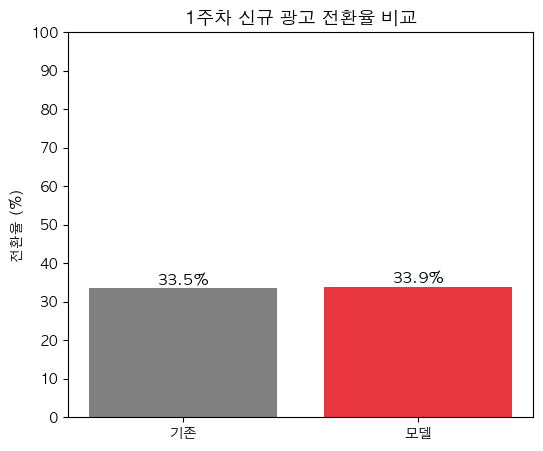

In [50]:
# Í∏∞Ï°¥ Ï†ÑÌôòÏú® ÎåÄÎπÑ, Î™®Îç∏ Ï†ÑÌôòÏú® ÎπÑÍµê

# ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
cvr_graph = model_df.copy()
cvr_graph = cvr_graph.drop(['ads_idx'], axis=1)

# 1Ï£ºÏ∞® Í¥ëÍ≥†Îßå ÌïÑÌÑ∞ÎßÅ
week1_df = cvr_graph[cvr_graph["week"] == 1].copy()

cat_cols = ['domain','ads_rejoin_type','ads_os_type','mda_idx','ads_3step', 'domain_ads3step', 'domain_mda', 'ads3step_mda', 'domain_os', 'ads3step_os', 'mda_os']
for col in cat_cols:
    if col in week1_df.columns:
        week1_df[col] = week1_df[col].astype("category")

# Î™®Îç∏ ÏòàÏ∏° Ï†ÑÌôòÏú®
feature_names = lgbm_model.feature_name_  
X_features = week1_df[feature_names]
week1_df['cvr_pred'] = lgbm_model.predict(X_features)

# Ï†ÑÏ≤¥ ÌèâÍ∑†
mean_actual = week1_df['week_cvr'].mean()
mean_model = week1_df['cvr_pred'].mean()

# Í∞úÏÑ†Ïú® Í≥ÑÏÇ∞
improvement = (mean_model - mean_actual) / mean_actual * 100

# Í∞í (% Î≥ÄÌôò)
mean_actual_pct = mean_actual * 100
mean_model_pct = mean_model * 100
improvement = (mean_model - mean_actual) / mean_actual * 100

# Í∑∏ÎûòÌîÑ
fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(["Í∏∞Ï°¥", "Î™®Îç∏"], 
              [mean_actual_pct, mean_model_pct], 
              color=["gray", "#E9353E"])

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar, value in zip(bars, [mean_actual_pct, mean_model_pct]):
    ax.text(bar.get_x() + bar.get_width()/2, value, 
            f"{value:.1f}%", ha="center", va="bottom", 
            fontsize=11, fontweight="bold")

# Ï†úÎ™©Ïóê Í∞úÏÑ†Ïú® ÌëúÏãú
ax.set_title(f"1Ï£ºÏ∞® Ïã†Í∑ú Í¥ëÍ≥† Ï†ÑÌôòÏú® ÎπÑÍµê",
             fontsize=13, fontweight="bold")
ax.set_ylabel("Ï†ÑÌôòÏú® (%)")

# yÏ∂ï Î≤îÏúÑ (0~100%)
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

plt.show()


üìä Í∞úÏÑ†Îêú Í¥ëÍ≥† ÎπÑÏú®: 61.54%
üìâ ÏïÖÌôîÎêú Í¥ëÍ≥† ÎπÑÏú®: 38.46%
‚ûñ Î≥ÄÌôî ÏóÜÏùå: 0.00%


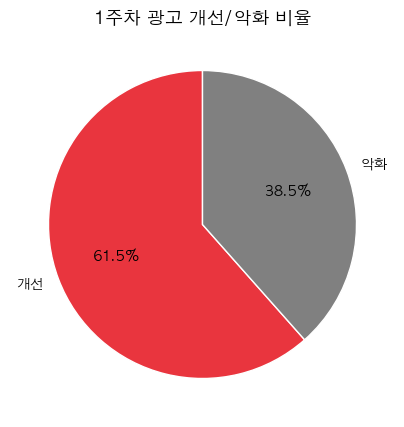

In [51]:
# Í∞úÏÑ† vs ÏïÖÌôî ÎπÑÏú®

# Ìñâ Îã®ÏúÑ Í∞úÏÑ† Ìö®Í≥º Í≥ÑÏÇ∞
week1_df["improvement"] = week1_df["cvr_pred"] - week1_df["week_cvr"]

# Í∞úÏÑ†/ÏïÖÌôî ÎπÑÏú®
improved_ratio = (week1_df["improvement"] > 0).mean()
worsened_ratio = (week1_df["improvement"] < 0).mean()
same_ratio = (week1_df["improvement"] == 0).mean()

print(f"üìä Í∞úÏÑ†Îêú Í¥ëÍ≥† ÎπÑÏú®: {improved_ratio:.2%}")
print(f"üìâ ÏïÖÌôîÎêú Í¥ëÍ≥† ÎπÑÏú®: {worsened_ratio:.2%}")
print(f"‚ûñ Î≥ÄÌôî ÏóÜÏùå: {same_ratio:.2%}")

# ÌååÏù¥Ï∞®Ìä∏ (ÎπÑÏú® ÏãúÍ∞ÅÌôî)
labels = ["Í∞úÏÑ†", "ÏïÖÌôî"]
sizes = [improved_ratio, worsened_ratio]
colors = ["#E9353E", "gray"]

plt.figure(figsize=(5,5))
plt.pie(
    sizes, labels=labels, autopct="%.1f%%", startangle=90, 
    colors=colors, wedgeprops={"edgecolor": "white"}
)
plt.title("1Ï£ºÏ∞® Í¥ëÍ≥† Í∞úÏÑ†/ÏïÖÌôî ÎπÑÏú®", fontsize=13, fontweight="bold")
plt.show()

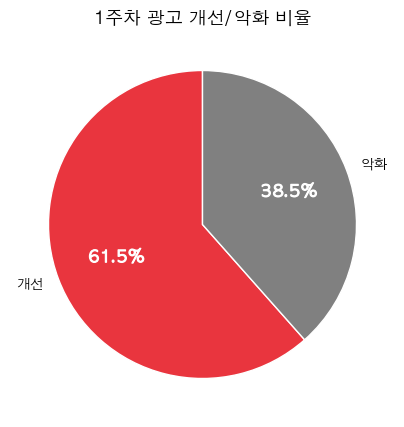

In [71]:
import matplotlib.patheffects as path_effects

labels = ["Í∞úÏÑ†", "ÏïÖÌôî"]
sizes = [improved_ratio, worsened_ratio]
colors = ["#E9353E", "gray"]

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%.1f%%", startangle=90,
    colors=colors, wedgeprops={"edgecolor": "white"}
)

# ÌçºÏÑºÌä∏ Ïà´Ïûê Ïä§ÌÉÄÏùº (ÎëêÍªçÍ≤å + Ïú§Í≥ΩÏÑ†)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("black")      # Í∞ÄÏû• ÎëêÍªçÍ≤å
    autotext.set_fontsize(12)             # ÌÅ¨Í∏∞Îäî Í∑∏ÎåÄÎ°ú
    # Ïú§Í≥ΩÏÑ† Ìö®Í≥º Ï∂îÍ∞Ä (Í≤ÄÏ†ï ÌÖåÎëêÎ¶¨)
    autotext.set_path_effects([
        path_effects.Stroke(linewidth=0.8, foreground="white"),
        path_effects.Normal()
    ])

plt.title("1Ï£ºÏ∞® Í¥ëÍ≥† Í∞úÏÑ†/ÏïÖÌôî ÎπÑÏú®", fontsize=13, fontweight="bold")
plt.show()

### Î™®Îç∏ ÌèâÍ∞Ä ÏßÄÌëú_Îû≠ÌÇπ ÏÑ±Îä• ÏßÄÌëú

In [51]:
from sklearn.metrics import ndcg_score
from scipy.stats import spearmanr

def evaluate_ranking(
    df,
    group_col='domain_ads3step_os',
    y_true_col='true_cvr',
    pred_col='pred_score',
    ks=(1,3,5,10),
    compute_spearman=True
):
    # ÏïàÏ†ÑÏû•Ïπò: ÌïÑÏàò Ïª¨Îüº ÌôïÏù∏
    for c in [group_col, y_true_col, pred_col]:
        assert c in df.columns, f"Missing column: {c}"
    
    rows = []
    weights = []
    
    for gid, g in df.groupby(group_col, observed=False):
        if len(g) < 2:
            # Îû≠ÌÇπÏù¥ ÏÑ±Î¶Ω Ïïà ÎêòÎäî ÎÑàÎ¨¥ ÏûëÏùÄ Í∑∏Î£πÏùÄ Ïä§ÌÇµ(ÎòêÎäî Í≥ÑÏÜç Ìè¨Ìï® ÏõêÌïòÎ©¥ Ï≤òÎ¶¨ Î≥ÄÍ≤Ω)
            continue
        
        # numpy ÌòïÌÉú
        y_true = g[y_true_col].to_numpy()
        y_pred = g[pred_col].to_numpy()
        
        # Ï†ïÎ†¨ÏùÄ ÌïÑÏöîÏóÜÍ≥† ndcg_scoreÏóêÎäî row shape ÌïÑÏöî
        y_true_row = y_true.reshape(1, -1)
        y_pred_row = y_pred.reshape(1, -1)
        
        # Spearman (ÏÑ†ÌÉù)
        sp = np.nan
        if compute_spearman:
            # ÏàúÏúÑÎ°ú Î≥ÄÌôòÌï¥ Ïä§ÌîºÏñ¥Îßå
            tr = pd.Series(y_true).rank(ascending=False, method='first')
            pr = pd.Series(y_pred).rank(ascending=False, method='first')
            sp, _ = spearmanr(tr, pr)
        
        # Hit@K: ‚ÄúÏã§Ï†ú 1Îì±‚ÄùÏù¥ ÏòàÏ∏° Top-K ÏïàÏóê ÏûàÎäîÏßÄ
        true_top_idx = g[y_true_col].idxmax()
        # ÏòàÏ∏° Ï†êÏàò ÎÇ¥Î¶ºÏ∞®Ïàú KÍ∞ú
        g_sorted_pred = g.sort_values(pred_col, ascending=False)
        
        row = {'group_id': gid, 'spearman': sp}
        for k in ks:
            topk_idx = set(g_sorted_pred.head(k).index)
            row[f'hit@{k}'] = 1 if true_top_idx in topk_idx else 0
            row[f'ndcg@{k}'] = ndcg_score(y_true_row, y_pred_row, k=k)
        
        rows.append(row)
        weights.append(len(g))
    
    out = pd.DataFrame(rows)
    if out.empty:
        raise ValueError("No valid groups for evaluation.")
    
    # Macro (Í∑∏Î£π Í∑†Îì± ÌèâÍ∑†)
    macro = out.drop(columns=['group_id']).mean(numeric_only=True).to_dict()
    
    # Weighted (Í∑∏Î£π ÌÅ¨Í∏∞ Í∞ÄÏ§ë ÌèâÍ∑†)
    w = np.array(weights)
    w = w / w.sum()
    weighted = {}
    for c in out.columns:
        if c in ('group_id',):
            continue
        weighted[c] = np.average(out[c].to_numpy(), weights=w)
    
    return {'macro': macro, 'weighted': weighted, 'by_group': out}

In [ ]:
# ÎèôÏùºÌïú ÌÖåÏä§Ìä∏ ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
test_eval_df = test_df[[ 'domain_ads3step_os' ]].copy()
test_eval_df['true_cvr'] = y_test.values
test_eval_df['pred_score'] = ranker_best.predict(X_test)  # Îû≠Ïª§ raw Ï†êÏàò

res = evaluate_ranking(
    test_eval_df,
    group_col='domain_ads3step_os',
    y_true_col='true_cvr',
    pred_col='pred_score',
    ks=(1,3,5,10)
)

print("== Macro (headline) ==")
macro_metrics = {k: round(v,4) for k,v in res['macro'].items()}
print(macro_metrics)

== Macro (headline) ==
{'spearman': 0.063, 'hit@1': 0.3077, 'ndcg@1': 0.5558, 'hit@3': 0.3846, 'ndcg@3': 0.5443, 'hit@5': 0.6154, 'ndcg@5': 0.5941, 'hit@10': 0.6154, 'ndcg@10': 0.6148}
== Weighted (reference) ==
{'spearman': 0.1791, 'hit@1': 0.0776, 'ndcg@1': 0.8692, 'hit@3': 0.0841, 'ndcg@3': 0.8568, 'hit@5': 0.1548, 'ndcg@5': 0.8358, 'hit@10': 0.1548, 'ndcg@10': 0.8184}


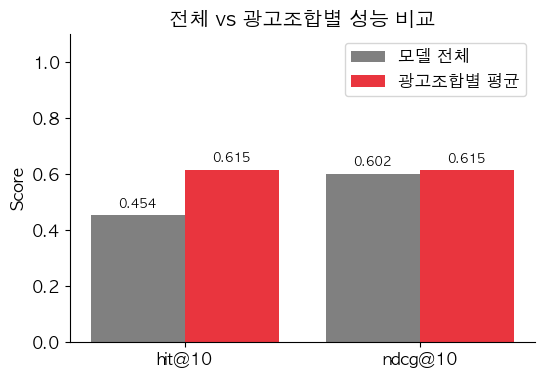

In [107]:
# micro(Ï†ÑÏ≤¥) vs macro(Í¥ëÍ≥†Îã®ÏúÑ)

import matplotlib.pyplot as plt

# ÏÑ±Îä• Í≤∞Í≥º
overall = {'hit@10': 0.4538, 'ndcg@10': 0.6020}
macro   = {'hit@10': 0.6154, 'ndcg@10': 0.6148}

metrics = list(overall.keys())
x = range(len(metrics))

fig, ax = plt.subplots(figsize=(6,4))

# ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
bars1 = ax.bar([i - 0.2 for i in x], [overall[m] for m in metrics], 
               width=0.4, label="Î™®Îç∏ Ï†ÑÏ≤¥", color="gray")
bars2 = ax.bar([i + 0.2 for i in x], [macro[m] for m in metrics], 
               width=0.4, label="Í¥ëÍ≥†Ï°∞Ìï©Î≥Ñ ÌèâÍ∑†", color="#E9353E")

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, 
                f"{height:.3f}", ha="center", va="bottom", fontsize=9)

# Íæ∏ÎØ∏Í∏∞
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0,1.1)
ax.set_ylabel("Score")
ax.set_title("Ï†ÑÏ≤¥ vs Í¥ëÍ≥†Ï°∞Ìï©Î≥Ñ ÏÑ±Îä• ÎπÑÍµê")
ax.legend()

plt.show()

